## Predicting heart disease using machine learning
This notebook looks into various Pyhton-based machine learning and data science libraries
in attempt to build a machine learning model capable of predicting whether or not someone has a heart disease 
based on their medical attributes

We're going to follow approach:
1. Problem
2. Data
3. Evaluating
4. Features
5. Model
6. Experimentation


## 1.Problem Definition

In a statement,
> Given clinical parameters about patient, can we predict wheter or not they have heart disease?

## 2.Data

The original data came from the Cleveland data from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

There is a version of it available on Kaggle
https://www.kaggle.com/ronitf/heart-disease-uci

## 3.Evaluation
>If we can reach 95% accuracy at predicting wheter or not a patient has a heart disease during the proof of concept,we'll pursue the project

## 4.Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**
1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.


### Preparing the tool
We are gonna use pandas,matplotlib,numpy for data analysis and manipluation

In [225]:
#Import all tools we need

#Regular EDA(explanatory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
#We want our plot appear inside the notebook

#Models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Evaluating model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve



### Load Data

In [226]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data exploration (Exploratoy data analysis or EDA)

The goal here is to find out more of the data and become a subject matter of our data we're working with

1. What question(a) are you trying to solve?
2. What kind of data do you have and how do we treat different types
3. What missing of the data and how to deal with it?
4. What are the outlier and why should we care about
5. How can you add,change, and remove features to get more of our data

In [227]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [228]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [229]:
# Let's find out how many each class there are
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

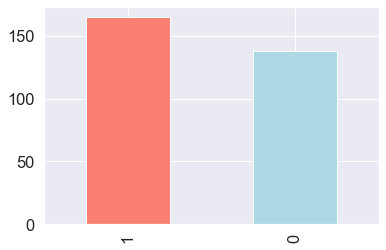

In [230]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [232]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [233]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease frequence according to Sex

In [234]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [235]:
#Compare target columns with Sex column
pd.crosstab(df['target'], df['sex'])


sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

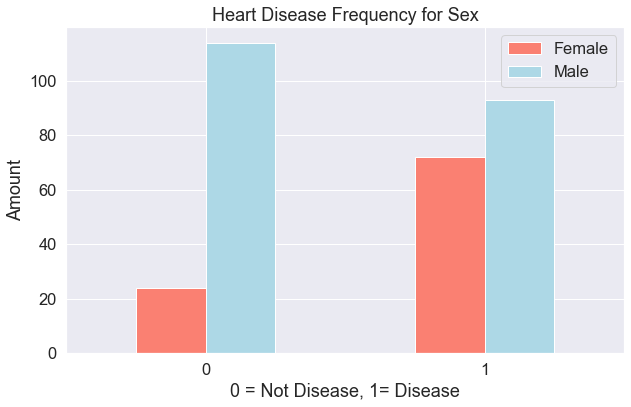

In [236]:
#Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(10,6),
                                   color=['salmon', 'lightblue'])

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = Not Disease, 1= Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0)

### Age vs Max Heart Rate for Heart Disease

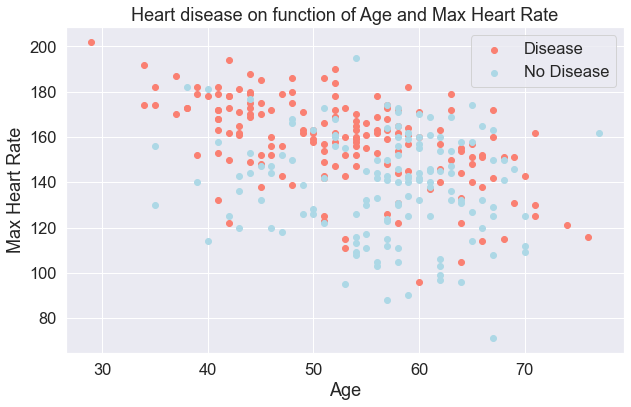

In [237]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with posivite examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target ==1],
           c='salmon')

#Scatter with negative examples
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c='lightblue')

#Add some helpfull info
plt.title('Heart disease on function of Age and Max Heart Rate')
plt.xlabel('Age'),
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease']);

<AxesSubplot:ylabel='Frequency'>

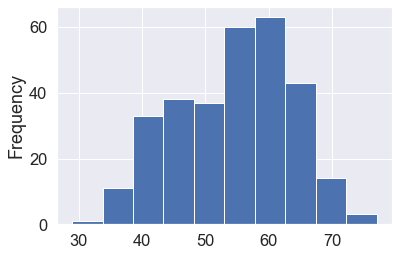

In [238]:
#Check the distribution of the age columns with a histogram
df.age.plot.hist()

### Heart disease frequency per Chest pain type
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease


In [239]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


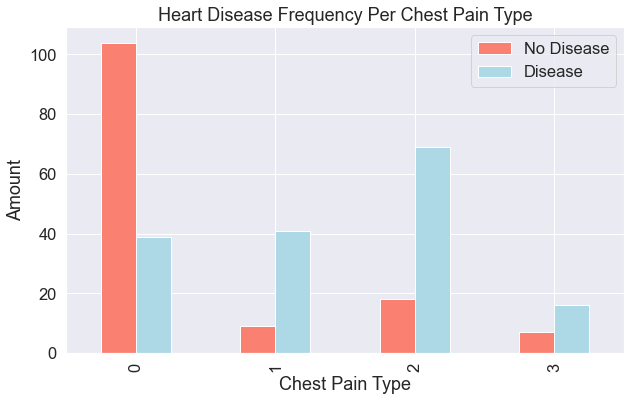

In [240]:
#Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['salmon','lightblue']);

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);

In [241]:
#Make correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [242]:
import seaborn as sns

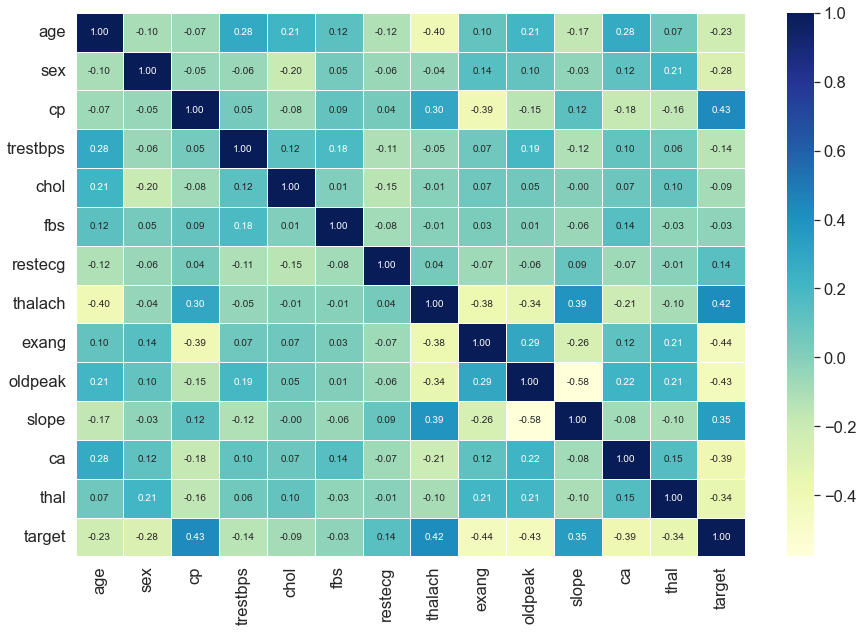

In [243]:
#Lets make our correlation matrix prettier
corr_matrix = df.corr()

fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')
plt.yticks(rotation=None);

# 5.Modeling

In [244]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 1.Get the data ready
1. Splitting


In [245]:
from sklearn.preprocessing import StandardScaler

# scaler= StandardScaler()
# scaler.fit(X)
# scaler.transform(X)

#Split data into Features and label
X = df.drop('target', axis=1)
y= df['target']

np.random.seed(42)
#Split into train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)



Now we've got our data into training and test set, it's time to build our model

We'll train it (find the pattern/function) on the training set

and We'll test it (use the patterns/function) on the test set

### 2.Pick Up model

There are 3 model we wanna try:
1. Logistic Regression
2. KneighborsClassifier
3. RandomForestClassifier

In [246]:
#Put the model on dict so we dont repeat ourself
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=100),
    'K-NN' : KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier()
}

#Create a function to fit and score our model

def fit_and_score(model_dict, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate given machine learning model
    models: a dict of different Scikit-learn machine learning models
    X_train : training data(no labels)
    X_test : testing data(no labels)
    y_train : training label
    y_test : testing label
    '''
    
    #Set the random seed
    np.random.seed(42)
    
    #Make a dictionary to keep model scores
    model_scores = {}
        
    #Loop through model
    for name, model in model_dict.items():
        
        #Fit each model to data
        model.fit(X_train, y_train)
        
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
            
    return model_scores

In [247]:
models_score = fit_and_score(models,
                            X_train,
                            X_test,
                            y_train,
                            y_test)

models_score

C:\Users\ROG\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-NN': 0.6885245901639344,
 'RandomForest': 0.8360655737704918}

### Model Comparison

<AxesSubplot:>

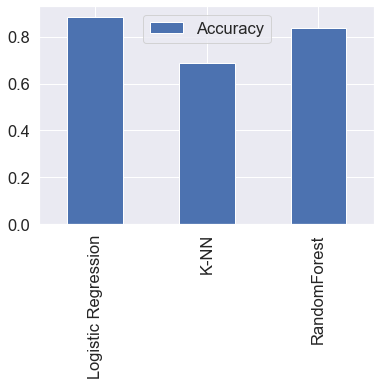

In [248]:
model_compare = pd.DataFrame(models_score, index=['Accuracy'])
model_compare.T.plot.bar()

Now we've got a baseline model...
and we know a model first predictions aren't always what we should based on our next steps off.
What should we do?

Let's look this following step:
1. HyperParamater Tuning
2. Features importance
3. Confusion Matrix
4. Cross validation
5. Precison 
6. Recall
7. F1
8. Classification report
9. ROC Curve
10. Area under curve (AUC)

# 3.Improving model
## Hyperparameter Tuning(By hand)

In [249]:
# Let's create KNN
train_score = []
test_score = []

#Create a list of different values for n_neighbors
neighbors = range(1,21)

#Setup KNN instance
knn =KNeighborsClassifier()

#Looping through difference 
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    #Update the training score list
    train_score.append(knn.score(X_train, y_train))
    
    #Update the test score list
    test_score.append(knn.score(X_test, y_test))
    

In [250]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [251]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


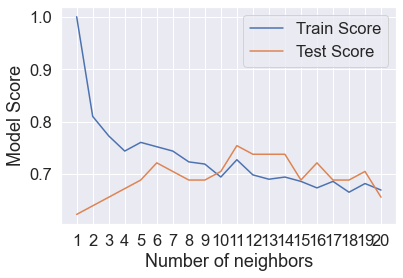

In [252]:
plt.plot(neighbors, train_score, label='Train Score')
plt.plot(neighbors, test_score, label='Test Score')

plt.xticks(np.arange(1, 21,1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_score) *100:.2f}%')

## Hyperparameter Tuning (RandomizedSearchCV)

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

... using RandomizedSearchCV

In [253]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [254]:
#Create a hyperparameter grid for Logistic Regresiion
log_reg_grid ={
    'C' : np.logspace(-4, 4,20 ),
    'solver' : ['liblinear']
}

#Create a hyperparameter grid for RandomForestClassifer
rf_grid = {
    'n_estimators': np.arange(10,1000, 50),
    'max_depth' : [3, 5, 10, None],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf' : np.arange(1, 20, 2)
}

Now we've got hyperparameter grid setup for each models, lets tune them using 

RandomizedSearchCV

In [255]:
#Tune logistic regression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                n_iter= 20,
                                cv=5,
                                verbose=True)

#Fit the rs_cv model to data
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [256]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [257]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

Now we've tuned our LogisticRegression model, let's do the same for RandomForestClassifier

In [258]:
#Lets Set up random seed
np.random.seed(42)

#Create rs_cv RandomForest model
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                        n_iter=20,
                         cv=5,
                         verbose=2)

#Fit the rs_cv version of Random forest to train data
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=3, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.8s
[CV] END max_depth=10, min

[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   1.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=14, n_estimators=510; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total time=   0.4s
[CV] END max_depth=3, min_samples_leaf=19, min_samples_split=8, n_estimators=260; total tim

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [259]:
#See the best params for rs_rf
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [260]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression gave the best score so far,

let's try and improve them with GridSearchCV

In [261]:
from sklearn.model_selection import GridSearchCV

In [262]:
#Create Different hyperparameters for LogisticRegression model:
log_reg_grid ={
    'C' : np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

#Create gs_cv version of log_reg
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid= log_reg_grid,
                         verbose=True)

#Fit the gs_cv LogisticRegression to data
gs_log_reg.fit(X_train, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [263]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [264]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

# 4.Evaluating our model

#Evaluating our tune machine learning classifier, beyond accuracy
* Roc curve and AUC score
* ConfusionMatrix
* ClassificationReport
* Precision
* Recall
* F1-score

and it would be great if cross-validation was used where possible

To comparison and evaluate our model first we need to make prediction

In [265]:
# Make prediction with gs_log model
y_preds = gs_log_reg.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [266]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

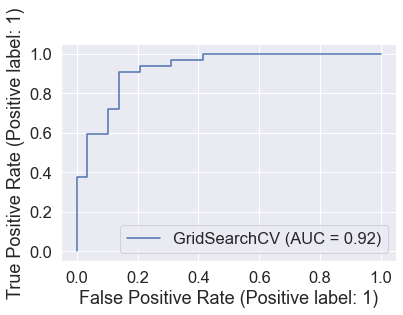

In [267]:
#Plot Roc curve and calculate AUC score
plot_roc_curve(gs_log_reg, X_test, y_test)

In [268]:
sns.set(font_scale= 1.5)

In [269]:

def plot_confusion_matrix_1(y_true, y_pred ):
    '''
    Plotting confusion matrix with seaborn heatmap
    Esimator
    
    '''
    fig, ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_true, y_pred),
                    annot=True,
                    cbar=False)
    
    
    plt.xlabel('True label')
    plt.ylabel('Predict label')

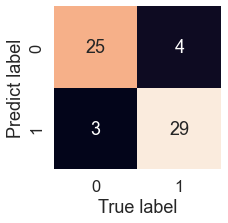

In [270]:
plot_confusion_matrix_1(y_test, y_preds)

Now we've got our ROC curve,AUC metric, and Confusion_metrix, 

let's get a ClassificationReport as well as cross_validated precision,recall, and f1-score

In [271]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation with cross validation
We're going to calculate our accuracy precision,recall, f1-score

using cross validation and to do so we'll using `cross_val_score()`

In [272]:
#Check best params
gs_log_reg.best_params_


{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [273]:
#Create a new classifier with best parameter
clf =LogisticRegression(C=0.20433597178569418, solver= 'liblinear')


In [274]:
#Cross Validated Accuracy
cv_acc = cross_val_score(clf, X, y,
                     scoring='accuracy')

cv_acc = np.mean(cv_acc)

cv_acc

0.8479781420765027

In [275]:
#Cross Validated Precision
cv_prec = cross_val_score(clf, X, y,
                         scoring='precision')
           
cv_prec = np.mean(cv_prec)
           
cv_prec

0.8215873015873015

In [276]:
#Cross Validated Recall
cv_rec = cross_val_score(clf, X, y,
                        scoring='recall')

cv_rec = np.mean(cv_rec)

cv_rec

0.9272727272727274

In [277]:
#Cross Validated F1-Score
cv_f1 = cross_val_score(clf, X, y,
                       scoring='f1')

cv_f1= np.mean(cv_f1)

cv_f1

0.8705403543192143

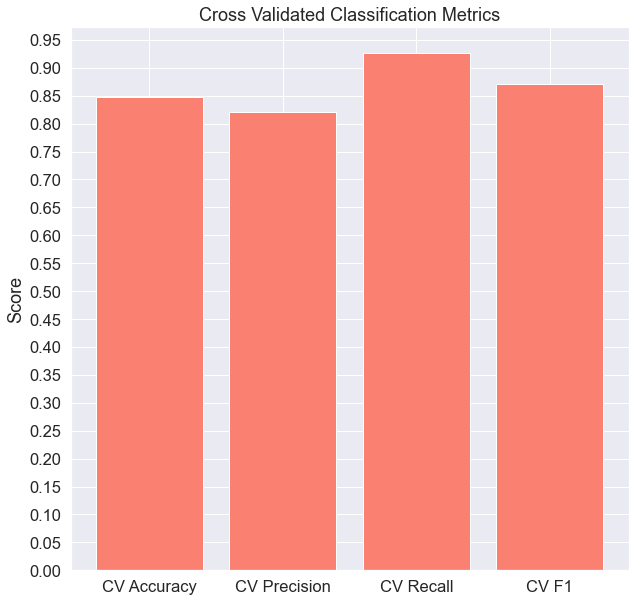

In [278]:
#Put all cv score on 1 variable

cv_score = {
   'CV Accuracy': cv_acc, 
   'CV Precision': cv_prec, 
   'CV Recall' : cv_rec, 
   'CV F1' : cv_f1}

fig, ax =plt.subplots(figsize=(10,10))

ax.bar(cv_score.keys(), 
       cv_score.values(),
       color='salmon')

ax.set(title='Cross Validated Classification Metrics',
       ylabel='Score')

plt.yticks(np.arange(0, 1.0, 0.05));

### Features Important
Feature important is another way as asking 'which features contribute the most to the model output',

and how did it contribute?

Finding features importance is different for each machine learning model

One way to find features importance is to search '{Model name} features importance'

Let's find features importance for our LogisticRegression model

In [279]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [280]:
#Fit an instantiace of LogisticRegression

clf = LogisticRegression(C= 0.20433597178569418,
                        solver= 'liblinear')

clf.fit(X_train,y_train);


In [281]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [282]:
#Coefisien simply tell us how each independent variable  contribute to target label
#Check coef_ 

clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [283]:
clf.coef_[0]

array([ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
        0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
        0.45085391, -0.63733326, -0.6755509 ])

In [284]:
#Visualize Features importance
feature_df = pd.DataFrame(features_dict, index=[0])

feature_df.T.plot.bar(title='Features Importance',
                    legend=False);

NameError: name 'features_dict' is not defined

In [ ]:
### Model driven exploratory data analysis

In [285]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


In [286]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


 slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart

## 6.Experimentation
If you haven't hit your evaluation metric yet,
* Could you collect more data?
* Could you try different model like CatBoost or XGboost
* Could you improve the current models? (beyond what we've done so far)
* If you model good enough(you hitted the evaluation metric),
  how would you export and share it with others?
  
 What will you do next:
 1. Answer the question above
 2. Try new project with  classification dataset (use the workflow and this notebook for help)

## Try CatBoost

In [287]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

boost_model = {
    'XG Boost': XGBClassifier(),
    'Cat Boost': CatBoostClassifier(iterations=5, learning_rate=0.1)
}



In [288]:
boost_score = fit_and_score(boost_model, X_train, X_test, y_train, y_test);
boost_score

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 0.6630001	total: 1.91ms	remaining: 7.66ms
1:	learn: 0.6377730	total: 3.49ms	remaining: 5.24ms
2:	learn: 0.6151952	total: 5.09ms	remaining: 3.39ms
3:	learn: 0.5961991	total: 6.71ms	remaining: 1.68ms
4:	learn: 0.5768023	total: 9.33ms	remaining: 0us


{'XG Boost': 0.819672131147541, 'Cat Boost': 0.8524590163934426}

### Tune Catboost Hyper parameter (GridSearchCV)

In [289]:
np.random.seed(42)
cat_boost = CatBoostClassifier()


cb_grid = {
   'max_depth': [4,5],
   'n_estimators':[50,100]
}
   

gs_cb = GridSearchCV(cat_boost,
                     param_grid = cb_grid,
                     cv=5,
                     verbose=0
                    )

#Fit the gs version of catboost to data
gs_cb.fit(X_train,y_train)



Learning rate set to 0.0796
0:	learn: 0.6685664	total: 857us	remaining: 42ms
1:	learn: 0.6455889	total: 1.76ms	remaining: 42.3ms
2:	learn: 0.6271372	total: 2.72ms	remaining: 42.6ms
3:	learn: 0.6065581	total: 3.73ms	remaining: 42.9ms
4:	learn: 0.5869821	total: 4.72ms	remaining: 42.5ms
5:	learn: 0.5700264	total: 5.72ms	remaining: 42ms
6:	learn: 0.5540754	total: 6.66ms	remaining: 40.9ms
7:	learn: 0.5405250	total: 7.55ms	remaining: 39.6ms
8:	learn: 0.5287693	total: 8.48ms	remaining: 38.6ms
9:	learn: 0.5158980	total: 9.43ms	remaining: 37.7ms
10:	learn: 0.5031139	total: 10.4ms	remaining: 36.8ms
11:	learn: 0.4918672	total: 11.4ms	remaining: 36ms
12:	learn: 0.4802149	total: 12.3ms	remaining: 35ms
13:	learn: 0.4704981	total: 13.2ms	remaining: 34ms
14:	learn: 0.4620745	total: 14.1ms	remaining: 32.8ms
15:	learn: 0.4524689	total: 14.9ms	remaining: 31.7ms
16:	learn: 0.4435952	total: 15.9ms	remaining: 30.8ms
17:	learn: 0.4369064	total: 16.8ms	remaining: 29.9ms
18:	learn: 0.4274905	total: 17.7ms	rema

Learning rate set to 0.079776
0:	learn: 0.6725877	total: 1.07ms	remaining: 52.3ms
1:	learn: 0.6495966	total: 2.02ms	remaining: 48.4ms
2:	learn: 0.6280212	total: 3.09ms	remaining: 48.4ms
3:	learn: 0.6094842	total: 4.08ms	remaining: 47ms
4:	learn: 0.5967498	total: 5.17ms	remaining: 46.5ms
5:	learn: 0.5793809	total: 6.24ms	remaining: 45.7ms
6:	learn: 0.5654749	total: 7.34ms	remaining: 45.1ms
7:	learn: 0.5524798	total: 8.31ms	remaining: 43.7ms
8:	learn: 0.5434640	total: 9.37ms	remaining: 42.7ms
9:	learn: 0.5322905	total: 10.4ms	remaining: 41.6ms
10:	learn: 0.5212022	total: 11.2ms	remaining: 39.8ms
11:	learn: 0.5130862	total: 12.3ms	remaining: 38.8ms
12:	learn: 0.5042453	total: 13.1ms	remaining: 37.4ms
13:	learn: 0.4928728	total: 14ms	remaining: 36ms
14:	learn: 0.4841023	total: 14.9ms	remaining: 34.7ms
15:	learn: 0.4766323	total: 15.7ms	remaining: 33.4ms
16:	learn: 0.4698980	total: 16.6ms	remaining: 32.2ms
17:	learn: 0.4637539	total: 17.4ms	remaining: 31ms
18:	learn: 0.4571001	total: 18.3ms

59:	learn: 0.3796693	total: 53.5ms	remaining: 35.7ms
60:	learn: 0.3778015	total: 54.5ms	remaining: 34.9ms
61:	learn: 0.3762985	total: 55.4ms	remaining: 33.9ms
62:	learn: 0.3742764	total: 56.2ms	remaining: 33ms
63:	learn: 0.3732987	total: 57.1ms	remaining: 32.1ms
64:	learn: 0.3716309	total: 58ms	remaining: 31.2ms
65:	learn: 0.3702647	total: 58.8ms	remaining: 30.3ms
66:	learn: 0.3687322	total: 59.7ms	remaining: 29.4ms
67:	learn: 0.3659646	total: 60.5ms	remaining: 28.5ms
68:	learn: 0.3642471	total: 61.4ms	remaining: 27.6ms
69:	learn: 0.3624353	total: 62.2ms	remaining: 26.7ms
70:	learn: 0.3610557	total: 63.1ms	remaining: 25.8ms
71:	learn: 0.3584672	total: 63.9ms	remaining: 24.9ms
72:	learn: 0.3569002	total: 64.8ms	remaining: 24ms
73:	learn: 0.3550644	total: 65.6ms	remaining: 23.1ms
74:	learn: 0.3542752	total: 66.5ms	remaining: 22.2ms
75:	learn: 0.3530041	total: 67.3ms	remaining: 21.3ms
76:	learn: 0.3519586	total: 68.1ms	remaining: 20.4ms
77:	learn: 0.3506700	total: 69ms	remaining: 19.5ms
7

Learning rate set to 0.04225
0:	learn: 0.6821254	total: 797us	remaining: 79ms
1:	learn: 0.6694060	total: 1.68ms	remaining: 82.5ms
2:	learn: 0.6570257	total: 2.58ms	remaining: 83.4ms
3:	learn: 0.6459783	total: 3.45ms	remaining: 82.8ms
4:	learn: 0.6380122	total: 4.33ms	remaining: 82.3ms
5:	learn: 0.6270233	total: 5.21ms	remaining: 81.7ms
6:	learn: 0.6178028	total: 6.08ms	remaining: 80.7ms
7:	learn: 0.6090534	total: 6.95ms	remaining: 80ms
8:	learn: 0.6029318	total: 7.83ms	remaining: 79.2ms
9:	learn: 0.5948233	total: 8.68ms	remaining: 78.1ms
10:	learn: 0.5871712	total: 9.58ms	remaining: 77.5ms
11:	learn: 0.5811713	total: 10.4ms	remaining: 76.3ms
12:	learn: 0.5743343	total: 11.4ms	remaining: 76ms
13:	learn: 0.5657479	total: 12.2ms	remaining: 75.1ms
14:	learn: 0.5575398	total: 13.1ms	remaining: 74.1ms
15:	learn: 0.5515483	total: 13.9ms	remaining: 73.2ms
16:	learn: 0.5459907	total: 14.8ms	remaining: 72.3ms
17:	learn: 0.5408190	total: 15.7ms	remaining: 71.5ms
18:	learn: 0.5351397	total: 16.5ms

25:	learn: 0.4111380	total: 30.8ms	remaining: 28.4ms
26:	learn: 0.4066684	total: 32.1ms	remaining: 27.3ms
27:	learn: 0.4013261	total: 33.3ms	remaining: 26.2ms
28:	learn: 0.3978196	total: 34.5ms	remaining: 25ms
29:	learn: 0.3934869	total: 35.6ms	remaining: 23.7ms
30:	learn: 0.3883186	total: 36.7ms	remaining: 22.5ms
31:	learn: 0.3844795	total: 37.8ms	remaining: 21.3ms
32:	learn: 0.3814496	total: 38.4ms	remaining: 19.8ms
33:	learn: 0.3772885	total: 39.5ms	remaining: 18.6ms
34:	learn: 0.3735809	total: 40.6ms	remaining: 17.4ms
35:	learn: 0.3688846	total: 41.8ms	remaining: 16.2ms
36:	learn: 0.3653375	total: 42.9ms	remaining: 15.1ms
37:	learn: 0.3616375	total: 44.1ms	remaining: 13.9ms
38:	learn: 0.3582675	total: 45.1ms	remaining: 12.7ms
39:	learn: 0.3546161	total: 46.2ms	remaining: 11.5ms
40:	learn: 0.3518016	total: 47.2ms	remaining: 10.4ms
41:	learn: 0.3492828	total: 48.4ms	remaining: 9.21ms
42:	learn: 0.3464546	total: 49.4ms	remaining: 8.04ms
43:	learn: 0.3426620	total: 50.5ms	remaining: 6.

Learning rate set to 0.042157
0:	learn: 0.6812913	total: 1.07ms	remaining: 106ms
1:	learn: 0.6710227	total: 2.13ms	remaining: 104ms
2:	learn: 0.6595464	total: 3.17ms	remaining: 102ms
3:	learn: 0.6484695	total: 4.28ms	remaining: 103ms
4:	learn: 0.6393642	total: 5.34ms	remaining: 102ms
5:	learn: 0.6297339	total: 6.41ms	remaining: 100ms
6:	learn: 0.6219270	total: 7.44ms	remaining: 98.8ms
7:	learn: 0.6132594	total: 8.58ms	remaining: 98.7ms
8:	learn: 0.6043449	total: 10.3ms	remaining: 104ms
9:	learn: 0.5953547	total: 12ms	remaining: 108ms
10:	learn: 0.5876315	total: 14.7ms	remaining: 119ms
11:	learn: 0.5800668	total: 15.8ms	remaining: 116ms
12:	learn: 0.5715912	total: 16.9ms	remaining: 113ms
13:	learn: 0.5643676	total: 18ms	remaining: 111ms
14:	learn: 0.5591246	total: 19.1ms	remaining: 108ms
15:	learn: 0.5522092	total: 20.2ms	remaining: 106ms
16:	learn: 0.5452046	total: 21.3ms	remaining: 104ms
17:	learn: 0.5396777	total: 22.5ms	remaining: 102ms
18:	learn: 0.5340290	total: 23.5ms	remaining: 

Learning rate set to 0.04225
0:	learn: 0.6817951	total: 990us	remaining: 98.1ms
1:	learn: 0.6701744	total: 2.12ms	remaining: 104ms
2:	learn: 0.6636708	total: 3.2ms	remaining: 103ms
3:	learn: 0.6535391	total: 4.3ms	remaining: 103ms
4:	learn: 0.6437887	total: 5.61ms	remaining: 107ms
5:	learn: 0.6344328	total: 6.74ms	remaining: 106ms
6:	learn: 0.6273300	total: 7.78ms	remaining: 103ms
7:	learn: 0.6201660	total: 8.83ms	remaining: 102ms
8:	learn: 0.6107382	total: 9.91ms	remaining: 100ms
9:	learn: 0.6032898	total: 11ms	remaining: 99.1ms
10:	learn: 0.5953900	total: 12.1ms	remaining: 97.9ms
11:	learn: 0.5880012	total: 13.2ms	remaining: 97ms
12:	learn: 0.5812478	total: 14.3ms	remaining: 95.7ms
13:	learn: 0.5741397	total: 15.4ms	remaining: 94.8ms
14:	learn: 0.5686523	total: 16.6ms	remaining: 93.8ms
15:	learn: 0.5615492	total: 17.7ms	remaining: 92.8ms
16:	learn: 0.5549966	total: 18.7ms	remaining: 91.5ms
17:	learn: 0.5497104	total: 20.2ms	remaining: 91.9ms
18:	learn: 0.5443659	total: 21.3ms	remaini

Learning rate set to 0.087673
0:	learn: 0.6687686	total: 973us	remaining: 47.7ms
1:	learn: 0.6428211	total: 2.04ms	remaining: 49ms
2:	learn: 0.6224512	total: 3.03ms	remaining: 47.5ms
3:	learn: 0.6007797	total: 4.06ms	remaining: 46.7ms
4:	learn: 0.5848982	total: 5.09ms	remaining: 45.8ms
5:	learn: 0.5658811	total: 6.05ms	remaining: 44.4ms
6:	learn: 0.5504693	total: 6.97ms	remaining: 42.8ms
7:	learn: 0.5352786	total: 7.97ms	remaining: 41.8ms
8:	learn: 0.5240684	total: 9.08ms	remaining: 41.4ms
9:	learn: 0.5122080	total: 10.1ms	remaining: 40.4ms
10:	learn: 0.5015211	total: 11.2ms	remaining: 39.6ms
11:	learn: 0.4913432	total: 12.3ms	remaining: 38.9ms
12:	learn: 0.4814434	total: 13.2ms	remaining: 37.6ms
13:	learn: 0.4724958	total: 14.3ms	remaining: 36.9ms
14:	learn: 0.4628190	total: 15.4ms	remaining: 36ms
15:	learn: 0.4554089	total: 16.5ms	remaining: 35.1ms
16:	learn: 0.4487339	total: 17.6ms	remaining: 34.1ms
17:	learn: 0.4425773	total: 18.8ms	remaining: 33.4ms
18:	learn: 0.4340628	total: 19.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F90612A190>,
             param_grid={'max_depth': [4, 5], 'n_estimators': [50, 100]})

In [290]:

print(f'The best parameters is {gs_cb.best_params_}')
      
print(f'The highest score is {gs_cb.score(X_test, y_test)}')

The best parameters is {'max_depth': 4, 'n_estimators': 50}
The highest score is 0.8852459016393442


 Now we've hit the highest score on our model from CatBoostClassifier :0.8884297520661157

## Tune XGBClassifier hyperparameter (GridSearchCV)

In [291]:
xgb = XGBClassifier()

xgb_grid = {
    'n_estimators':[100,1000,20],
    'gamma' :[0.1,0.2],
    'max_depth': [3,8,10],
    
}

gs_xgb = GridSearchCV(xgb,
                     param_grid= xgb_grid,
                     cv=5,
                     verbose=0)

gs_xgb.fit(X_train, y_train)

print(f'The best paramaters is {gs_xgb.best_params_}')
print(f'The highest score is {gs_xgb.score(X_test,y_test)}')

[18:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:31:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:32:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

[18:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\Course\Progamming_Course\ML_and_DS\Project\heart-disease-project\env\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning

In [292]:
print(f'The best paramaters is {gs_xgb.best_params_}')
print(f'The highest score is {gs_xgb.score(X_test,y_test)}')

The best paramaters is {'gamma': 0.2, 'max_depth': 3, 'n_estimators': 100}
The highest score is 0.819672131147541


Based on the experiment Tuning hyperparam on XGBClassifier didn't give any change ,

So we pass XGBClassifier and continue Improving our CatBoostClassifier

In [293]:
cs_best_params = {
    'max_depth': 4,
    'n_estimators': 50,
    'iterations': [300],
   'l2_leaf_reg': [91]}

## Evaluate the improved CatBoostClassiffier

1. Confusion matrix
2. Area under curve
3. Roc score
4. Classification Report
5. Precision
6. Recall
7. F1-Score
8. Accuracy

In [294]:
np.random.seed(42)
cat_boost = gs_cb


y_preds = cat_boost.predict(X_test)

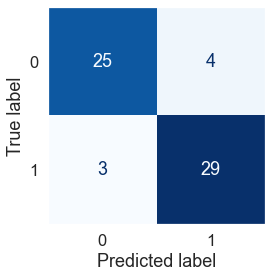

In [295]:
plot_confusion_matrix(cat_boost, X_test,y_test,
                      colorbar=False,
                      cmap='Blues')
#Remove plot grid
plt.grid(None)

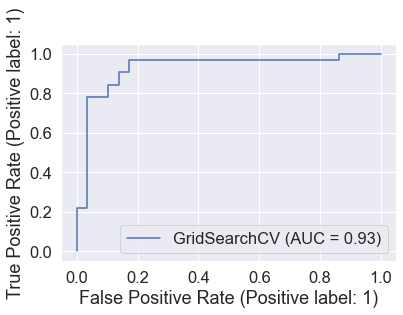

In [296]:
plot_roc_curve(cat_boost, X_test,y_test)

In [297]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Precision,recall,f1-score, with scoring parameter method

In [298]:
np.random.seed(42)

cv_acc = cross_val_score(cat_boost,
                         X,
                         y,
                        scoring='accuracy')
cv_acc = np.mean(cv_acc)


#Precision
cv_prec= cross_val_score(cat_boost,
                         X,
                         y,
                        scoring='precision')

cv_prec= np.mean(cv_prec)

#Recall
cv_rec= cross_val_score(cat_boost,
                         X,
                         y,
                        scoring='recall')

cv_rec = np.mean(cv_rec)

#F1 Score
cv_f1= cross_val_score(cat_boost,
                         X,
                         y,
                        scoring='f1')

cv_f1 = np.mean(cv_f1)

Learning rate set to 0.0796
0:	learn: 0.6739300	total: 925us	remaining: 45.3ms
1:	learn: 0.6541502	total: 1.86ms	remaining: 44.6ms
2:	learn: 0.6366034	total: 2.86ms	remaining: 44.8ms
3:	learn: 0.6193827	total: 3.82ms	remaining: 44ms
4:	learn: 0.6054883	total: 4.71ms	remaining: 42.4ms
5:	learn: 0.5882212	total: 5.65ms	remaining: 41.4ms
6:	learn: 0.5745691	total: 6.52ms	remaining: 40ms
7:	learn: 0.5589234	total: 7.42ms	remaining: 38.9ms
8:	learn: 0.5496833	total: 8.38ms	remaining: 38.2ms
9:	learn: 0.5373867	total: 9.3ms	remaining: 37.2ms
10:	learn: 0.5256069	total: 10.3ms	remaining: 36.4ms
11:	learn: 0.5175125	total: 11.2ms	remaining: 35.5ms
12:	learn: 0.5084894	total: 12.2ms	remaining: 34.9ms
13:	learn: 0.5002221	total: 13.2ms	remaining: 33.9ms
14:	learn: 0.4913578	total: 14.1ms	remaining: 33ms
15:	learn: 0.4855951	total: 15ms	remaining: 31.9ms
16:	learn: 0.4793072	total: 16ms	remaining: 31ms
17:	learn: 0.4739129	total: 17ms	remaining: 30.2ms
18:	learn: 0.4657038	total: 17.9ms	remaining

45:	learn: 0.3337031	total: 40.5ms	remaining: 3.52ms
46:	learn: 0.3322068	total: 41.5ms	remaining: 2.65ms
47:	learn: 0.3290926	total: 42.5ms	remaining: 1.77ms
48:	learn: 0.3258631	total: 43.4ms	remaining: 886us
49:	learn: 0.3239437	total: 44.3ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6705175	total: 835us	remaining: 41ms
1:	learn: 0.6503805	total: 1.74ms	remaining: 41.8ms
2:	learn: 0.6320847	total: 2.62ms	remaining: 41.1ms
3:	learn: 0.6118670	total: 3.5ms	remaining: 40.2ms
4:	learn: 0.5964199	total: 4.32ms	remaining: 38.9ms
5:	learn: 0.5792786	total: 5.18ms	remaining: 38ms
6:	learn: 0.5637575	total: 6.17ms	remaining: 37.9ms
7:	learn: 0.5493243	total: 7.04ms	remaining: 37ms
8:	learn: 0.5386003	total: 7.91ms	remaining: 36.1ms
9:	learn: 0.5247052	total: 8.83ms	remaining: 35.3ms
10:	learn: 0.5124647	total: 9.68ms	remaining: 34.3ms
11:	learn: 0.5024187	total: 10.6ms	remaining: 33.4ms
12:	learn: 0.4919415	total: 11.4ms	remaining: 32.5ms
13:	learn: 0.4808661	total: 12.3ms	rem

0:	learn: 0.6801590	total: 868us	remaining: 85.9ms
1:	learn: 0.6697961	total: 2.06ms	remaining: 101ms
2:	learn: 0.6596475	total: 3.04ms	remaining: 98.4ms
3:	learn: 0.6475568	total: 4.06ms	remaining: 97.5ms
4:	learn: 0.6378880	total: 4.99ms	remaining: 94.9ms
5:	learn: 0.6264274	total: 5.96ms	remaining: 93.3ms
6:	learn: 0.6147268	total: 6.95ms	remaining: 92.3ms
7:	learn: 0.6038347	total: 7.88ms	remaining: 90.7ms
8:	learn: 0.5949058	total: 8.79ms	remaining: 88.9ms
9:	learn: 0.5854281	total: 9.77ms	remaining: 88ms
10:	learn: 0.5771390	total: 10.8ms	remaining: 87.1ms
11:	learn: 0.5685311	total: 11.7ms	remaining: 85.6ms
12:	learn: 0.5600126	total: 12.6ms	remaining: 84.5ms
13:	learn: 0.5518455	total: 13.6ms	remaining: 83.8ms
14:	learn: 0.5445491	total: 14.5ms	remaining: 82.3ms
15:	learn: 0.5393315	total: 15.4ms	remaining: 81ms
16:	learn: 0.5334710	total: 16.3ms	remaining: 79.7ms
17:	learn: 0.5270759	total: 17.3ms	remaining: 78.6ms
18:	learn: 0.5204855	total: 18.8ms	remaining: 80.2ms
19:	learn

Learning rate set to 0.04225
0:	learn: 0.6810077	total: 1ms	remaining: 99ms
1:	learn: 0.6685083	total: 2ms	remaining: 98.1ms
2:	learn: 0.6579095	total: 2.97ms	remaining: 96.1ms
3:	learn: 0.6464598	total: 3.96ms	remaining: 95.1ms
4:	learn: 0.6370255	total: 4.99ms	remaining: 94.7ms
5:	learn: 0.6262655	total: 5.89ms	remaining: 92.3ms
6:	learn: 0.6164246	total: 6.82ms	remaining: 90.7ms
7:	learn: 0.6068796	total: 7.91ms	remaining: 91ms
8:	learn: 0.5997211	total: 8.95ms	remaining: 90.5ms
9:	learn: 0.5902110	total: 9.89ms	remaining: 89ms
10:	learn: 0.5812723	total: 10.9ms	remaining: 88.3ms
11:	learn: 0.5738040	total: 11.8ms	remaining: 86.7ms
12:	learn: 0.5658586	total: 12.8ms	remaining: 85.8ms
13:	learn: 0.5587955	total: 13.8ms	remaining: 84.8ms
14:	learn: 0.5519083	total: 15.1ms	remaining: 85.5ms
15:	learn: 0.5458300	total: 16.1ms	remaining: 84.5ms
16:	learn: 0.5398388	total: 17.1ms	remaining: 83.4ms
17:	learn: 0.5336431	total: 18ms	remaining: 82ms
18:	learn: 0.5272468	total: 18.9ms	remainin

7:	learn: 0.5611100	total: 9.37ms	remaining: 49.2ms
8:	learn: 0.5484892	total: 10.7ms	remaining: 48.7ms
9:	learn: 0.5384104	total: 11.9ms	remaining: 47.4ms
10:	learn: 0.5283517	total: 13.1ms	remaining: 46.3ms
11:	learn: 0.5200136	total: 14.2ms	remaining: 45ms
12:	learn: 0.5115022	total: 15.4ms	remaining: 43.7ms
13:	learn: 0.5022126	total: 16.5ms	remaining: 42.3ms
14:	learn: 0.4961295	total: 17.7ms	remaining: 41.3ms
15:	learn: 0.4872355	total: 19.1ms	remaining: 40.5ms
16:	learn: 0.4792046	total: 20.2ms	remaining: 39.3ms
17:	learn: 0.4717302	total: 21.3ms	remaining: 37.9ms
18:	learn: 0.4644072	total: 22.5ms	remaining: 36.7ms
19:	learn: 0.4579144	total: 23.5ms	remaining: 35.2ms
20:	learn: 0.4520403	total: 24.6ms	remaining: 34ms
21:	learn: 0.4452619	total: 25.8ms	remaining: 32.8ms
22:	learn: 0.4382444	total: 27ms	remaining: 31.7ms
23:	learn: 0.4332406	total: 28.1ms	remaining: 30.5ms
24:	learn: 0.4268917	total: 29.3ms	remaining: 29.3ms
25:	learn: 0.4224842	total: 30.5ms	remaining: 28.1ms
26

47:	learn: 0.3113679	total: 62.4ms	remaining: 2.6ms
48:	learn: 0.3080276	total: 63.8ms	remaining: 1.3ms
49:	learn: 0.3048280	total: 65ms	remaining: 0us
Learning rate set to 0.042157
0:	learn: 0.6823569	total: 1.08ms	remaining: 107ms
1:	learn: 0.6713894	total: 2.21ms	remaining: 108ms
2:	learn: 0.6617508	total: 3.35ms	remaining: 108ms
3:	learn: 0.6509319	total: 4.49ms	remaining: 108ms
4:	learn: 0.6415342	total: 5.57ms	remaining: 106ms
5:	learn: 0.6328943	total: 6.7ms	remaining: 105ms
6:	learn: 0.6238558	total: 7.87ms	remaining: 105ms
7:	learn: 0.6166286	total: 9.02ms	remaining: 104ms
8:	learn: 0.6080623	total: 10.2ms	remaining: 103ms
9:	learn: 0.6011625	total: 11.4ms	remaining: 103ms
10:	learn: 0.5940945	total: 12.6ms	remaining: 102ms
11:	learn: 0.5861020	total: 13.7ms	remaining: 101ms
12:	learn: 0.5802791	total: 15ms	remaining: 100ms
13:	learn: 0.5737198	total: 16.2ms	remaining: 99.4ms
14:	learn: 0.5668108	total: 17.3ms	remaining: 98.2ms
15:	learn: 0.5605855	total: 18.5ms	remaining: 97m

Learning rate set to 0.04225
0:	learn: 0.6802091	total: 1.06ms	remaining: 105ms
1:	learn: 0.6665074	total: 2.26ms	remaining: 111ms
2:	learn: 0.6549271	total: 3.41ms	remaining: 110ms
3:	learn: 0.6433164	total: 4.53ms	remaining: 109ms
4:	learn: 0.6329370	total: 5.65ms	remaining: 107ms
5:	learn: 0.6245614	total: 6.78ms	remaining: 106ms
6:	learn: 0.6136221	total: 7.92ms	remaining: 105ms
7:	learn: 0.6048850	total: 9.03ms	remaining: 104ms
8:	learn: 0.5946365	total: 10.1ms	remaining: 102ms
9:	learn: 0.5867200	total: 11.3ms	remaining: 101ms
10:	learn: 0.5785093	total: 12.4ms	remaining: 100ms
11:	learn: 0.5701643	total: 13.5ms	remaining: 99.2ms
12:	learn: 0.5642570	total: 14.7ms	remaining: 98.1ms
13:	learn: 0.5571959	total: 15.8ms	remaining: 96.9ms
14:	learn: 0.5504560	total: 16.8ms	remaining: 95.4ms
15:	learn: 0.5434269	total: 17.9ms	remaining: 94.1ms
16:	learn: 0.5362804	total: 19ms	remaining: 92.9ms
17:	learn: 0.5303237	total: 20.1ms	remaining: 91.7ms
18:	learn: 0.5237324	total: 21.2ms	remai

Learning rate set to 0.04225
0:	learn: 0.6806129	total: 1.06ms	remaining: 105ms
1:	learn: 0.6674840	total: 2.35ms	remaining: 115ms
2:	learn: 0.6578590	total: 3.39ms	remaining: 110ms
3:	learn: 0.6468308	total: 4.55ms	remaining: 109ms
4:	learn: 0.6378285	total: 5.7ms	remaining: 108ms
5:	learn: 0.6284389	total: 6.76ms	remaining: 106ms
6:	learn: 0.6179132	total: 7.82ms	remaining: 104ms
7:	learn: 0.6090683	total: 8.94ms	remaining: 103ms
8:	learn: 0.5991731	total: 9.98ms	remaining: 101ms
9:	learn: 0.5911450	total: 11.1ms	remaining: 99.6ms
10:	learn: 0.5830945	total: 12.1ms	remaining: 98.1ms
11:	learn: 0.5754626	total: 13.1ms	remaining: 96.4ms
12:	learn: 0.5684297	total: 14.2ms	remaining: 95ms
13:	learn: 0.5610508	total: 15.3ms	remaining: 93.8ms
14:	learn: 0.5547298	total: 16.3ms	remaining: 92.5ms
15:	learn: 0.5491110	total: 17.4ms	remaining: 91.3ms
16:	learn: 0.5414086	total: 18.5ms	remaining: 90.3ms
17:	learn: 0.5348756	total: 19.7ms	remaining: 89.7ms
18:	learn: 0.5278696	total: 20.7ms	rema

Learning rate set to 0.0796
0:	learn: 0.6738698	total: 851us	remaining: 41.7ms
1:	learn: 0.6536420	total: 1.8ms	remaining: 43.2ms
2:	learn: 0.6357555	total: 2.72ms	remaining: 42.6ms
3:	learn: 0.6191124	total: 3.67ms	remaining: 42.2ms
4:	learn: 0.6061972	total: 4.6ms	remaining: 41.4ms
5:	learn: 0.5902727	total: 5.57ms	remaining: 40.9ms
6:	learn: 0.5789594	total: 6.51ms	remaining: 40ms
7:	learn: 0.5635978	total: 7.46ms	remaining: 39.2ms
8:	learn: 0.5552237	total: 8.46ms	remaining: 38.5ms
9:	learn: 0.5434235	total: 9.39ms	remaining: 37.5ms
10:	learn: 0.5338332	total: 10.3ms	remaining: 36.6ms
11:	learn: 0.5238448	total: 11.3ms	remaining: 35.7ms
12:	learn: 0.5135592	total: 12.3ms	remaining: 35ms
13:	learn: 0.5047352	total: 13.3ms	remaining: 34.1ms
14:	learn: 0.4957390	total: 14.2ms	remaining: 33.2ms
15:	learn: 0.4921052	total: 15.2ms	remaining: 32.2ms
16:	learn: 0.4851524	total: 16.1ms	remaining: 31.3ms
17:	learn: 0.4796804	total: 17.2ms	remaining: 30.7ms
18:	learn: 0.4718782	total: 18.2ms	

Learning rate set to 0.042157
0:	learn: 0.6828174	total: 814us	remaining: 80.6ms
1:	learn: 0.6716795	total: 1.74ms	remaining: 85.3ms
2:	learn: 0.6614248	total: 2.77ms	remaining: 89.7ms
3:	learn: 0.6515750	total: 3.65ms	remaining: 87.6ms
4:	learn: 0.6438702	total: 4.66ms	remaining: 88.5ms
5:	learn: 0.6333237	total: 5.57ms	remaining: 87.3ms
6:	learn: 0.6264870	total: 6.57ms	remaining: 87.3ms
7:	learn: 0.6165652	total: 7.5ms	remaining: 86.2ms
8:	learn: 0.6101957	total: 8.41ms	remaining: 85ms
9:	learn: 0.6018127	total: 9.32ms	remaining: 83.9ms
10:	learn: 0.5931442	total: 10.2ms	remaining: 82.6ms
11:	learn: 0.5854167	total: 11.1ms	remaining: 81.6ms
12:	learn: 0.5779381	total: 12ms	remaining: 80.4ms
13:	learn: 0.5713540	total: 12.9ms	remaining: 79.1ms
14:	learn: 0.5647626	total: 13.8ms	remaining: 78.2ms
15:	learn: 0.5595601	total: 14.7ms	remaining: 77.2ms
16:	learn: 0.5546571	total: 15.6ms	remaining: 76.2ms
17:	learn: 0.5495420	total: 16.5ms	remaining: 75.3ms
18:	learn: 0.5435856	total: 17.6

Learning rate set to 0.04225
0:	learn: 0.6813401	total: 830us	remaining: 82.3ms
1:	learn: 0.6713277	total: 1.69ms	remaining: 82.7ms
2:	learn: 0.6613255	total: 2.61ms	remaining: 84.5ms
3:	learn: 0.6492131	total: 3.58ms	remaining: 85.9ms
4:	learn: 0.6405030	total: 4.44ms	remaining: 84.4ms
5:	learn: 0.6290911	total: 5.33ms	remaining: 83.5ms
6:	learn: 0.6189214	total: 6.19ms	remaining: 82.2ms
7:	learn: 0.6085511	total: 7.03ms	remaining: 80.8ms
8:	learn: 0.6007024	total: 7.9ms	remaining: 79.9ms
9:	learn: 0.5925658	total: 8.79ms	remaining: 79.1ms
10:	learn: 0.5854725	total: 9.72ms	remaining: 78.7ms
11:	learn: 0.5766551	total: 10.6ms	remaining: 77.7ms
12:	learn: 0.5684810	total: 11.4ms	remaining: 76.5ms
13:	learn: 0.5616111	total: 12.4ms	remaining: 76.1ms
14:	learn: 0.5544943	total: 13.3ms	remaining: 75.2ms
15:	learn: 0.5489214	total: 14.2ms	remaining: 74.4ms
16:	learn: 0.5440039	total: 15.1ms	remaining: 73.7ms
17:	learn: 0.5382351	total: 16ms	remaining: 72.9ms
18:	learn: 0.5303206	total: 16.

0:	learn: 0.6823502	total: 918us	remaining: 90.9ms
1:	learn: 0.6722454	total: 1.94ms	remaining: 95.1ms
2:	learn: 0.6617285	total: 2.95ms	remaining: 95.4ms
3:	learn: 0.6499294	total: 3.87ms	remaining: 93ms
4:	learn: 0.6415264	total: 4.75ms	remaining: 90.2ms
5:	learn: 0.6310042	total: 5.71ms	remaining: 89.5ms
6:	learn: 0.6195938	total: 6.67ms	remaining: 88.7ms
7:	learn: 0.6077304	total: 7.59ms	remaining: 87.2ms
8:	learn: 0.6012322	total: 8.48ms	remaining: 85.8ms
9:	learn: 0.5933500	total: 9.41ms	remaining: 84.7ms
10:	learn: 0.5865933	total: 10.3ms	remaining: 83.2ms
11:	learn: 0.5788670	total: 11.2ms	remaining: 81.8ms
12:	learn: 0.5704332	total: 12.1ms	remaining: 80.7ms
13:	learn: 0.5625747	total: 12.9ms	remaining: 79.2ms
14:	learn: 0.5550815	total: 13.8ms	remaining: 78ms
15:	learn: 0.5486849	total: 14.7ms	remaining: 76.9ms
16:	learn: 0.5431063	total: 15.5ms	remaining: 75.9ms
17:	learn: 0.5383087	total: 16.4ms	remaining: 74.7ms
18:	learn: 0.5316200	total: 17.3ms	remaining: 73.6ms
19:	lear

42:	learn: 0.3591202	total: 45.1ms	remaining: 7.33ms
43:	learn: 0.3564929	total: 46.3ms	remaining: 6.32ms
44:	learn: 0.3528244	total: 47.6ms	remaining: 5.29ms
45:	learn: 0.3498891	total: 48.7ms	remaining: 4.24ms
46:	learn: 0.3467364	total: 49.8ms	remaining: 3.18ms
47:	learn: 0.3438498	total: 51ms	remaining: 2.12ms
48:	learn: 0.3416312	total: 52.1ms	remaining: 1.06ms
49:	learn: 0.3390917	total: 53.7ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6687402	total: 1.07ms	remaining: 52.5ms
1:	learn: 0.6491843	total: 2.19ms	remaining: 52.5ms
2:	learn: 0.6310213	total: 3.29ms	remaining: 51.6ms
3:	learn: 0.6122253	total: 4.36ms	remaining: 50.2ms
4:	learn: 0.5957915	total: 5.51ms	remaining: 49.6ms
5:	learn: 0.5850354	total: 6.7ms	remaining: 49.1ms
6:	learn: 0.5693180	total: 8.04ms	remaining: 49.4ms
7:	learn: 0.5576623	total: 9.38ms	remaining: 49.2ms
8:	learn: 0.5460400	total: 10.4ms	remaining: 47.6ms
9:	learn: 0.5339909	total: 11.6ms	remaining: 46.2ms
10:	learn: 0.5238871	total: 12.7

91:	learn: 0.3339315	total: 96.6ms	remaining: 8.4ms
92:	learn: 0.3321681	total: 97.9ms	remaining: 7.37ms
93:	learn: 0.3309095	total: 99ms	remaining: 6.32ms
94:	learn: 0.3293616	total: 100ms	remaining: 5.27ms
95:	learn: 0.3280646	total: 101ms	remaining: 4.22ms
96:	learn: 0.3265915	total: 102ms	remaining: 3.16ms
97:	learn: 0.3250142	total: 103ms	remaining: 2.11ms
98:	learn: 0.3234816	total: 104ms	remaining: 1.05ms
99:	learn: 0.3219694	total: 105ms	remaining: 0us
Learning rate set to 0.042157
0:	learn: 0.6823275	total: 974us	remaining: 96.4ms
1:	learn: 0.6729762	total: 2.06ms	remaining: 101ms
2:	learn: 0.6646126	total: 3.12ms	remaining: 101ms
3:	learn: 0.6542772	total: 4.2ms	remaining: 101ms
4:	learn: 0.6446193	total: 5.26ms	remaining: 99.9ms
5:	learn: 0.6355852	total: 6.29ms	remaining: 98.5ms
6:	learn: 0.6269000	total: 7.36ms	remaining: 97.8ms
7:	learn: 0.6185041	total: 8.43ms	remaining: 97ms
8:	learn: 0.6108357	total: 9.54ms	remaining: 96.5ms
9:	learn: 0.6027370	total: 10.6ms	remaining:

83:	learn: 0.3350198	total: 87.9ms	remaining: 16.7ms
84:	learn: 0.3335672	total: 89ms	remaining: 15.7ms
85:	learn: 0.3318657	total: 90.2ms	remaining: 14.7ms
86:	learn: 0.3303923	total: 91.3ms	remaining: 13.6ms
87:	learn: 0.3287130	total: 92.4ms	remaining: 12.6ms
88:	learn: 0.3275153	total: 93.5ms	remaining: 11.6ms
89:	learn: 0.3262344	total: 94.5ms	remaining: 10.5ms
90:	learn: 0.3248291	total: 95.5ms	remaining: 9.45ms
91:	learn: 0.3233837	total: 96.6ms	remaining: 8.4ms
92:	learn: 0.3221047	total: 97.7ms	remaining: 7.35ms
93:	learn: 0.3209243	total: 98.7ms	remaining: 6.3ms
94:	learn: 0.3200619	total: 99.8ms	remaining: 5.25ms
95:	learn: 0.3188200	total: 101ms	remaining: 4.2ms
96:	learn: 0.3175924	total: 102ms	remaining: 3.15ms
97:	learn: 0.3163709	total: 103ms	remaining: 2.1ms
98:	learn: 0.3148541	total: 104ms	remaining: 1.05ms
99:	learn: 0.3137650	total: 105ms	remaining: 0us
Learning rate set to 0.04225
0:	learn: 0.6815769	total: 1.06ms	remaining: 105ms
1:	learn: 0.6722926	total: 2.14ms

43:	learn: 0.4192166	total: 50.3ms	remaining: 64ms
44:	learn: 0.4165770	total: 51.4ms	remaining: 62.9ms
45:	learn: 0.4130724	total: 52.6ms	remaining: 61.8ms
46:	learn: 0.4105620	total: 53.7ms	remaining: 60.5ms
47:	learn: 0.4080709	total: 54.7ms	remaining: 59.2ms
48:	learn: 0.4050093	total: 55.7ms	remaining: 58ms
49:	learn: 0.4018311	total: 56.8ms	remaining: 56.8ms
50:	learn: 0.3979273	total: 57.8ms	remaining: 55.5ms
51:	learn: 0.3948753	total: 58.8ms	remaining: 54.3ms
52:	learn: 0.3922533	total: 59.9ms	remaining: 53.1ms
53:	learn: 0.3900262	total: 60.9ms	remaining: 51.9ms
54:	learn: 0.3878210	total: 62ms	remaining: 50.7ms
55:	learn: 0.3847646	total: 63ms	remaining: 49.5ms
56:	learn: 0.3822556	total: 64ms	remaining: 48.3ms
57:	learn: 0.3791228	total: 65.1ms	remaining: 47.1ms
58:	learn: 0.3772591	total: 66.1ms	remaining: 45.9ms
59:	learn: 0.3744945	total: 67.2ms	remaining: 44.8ms
60:	learn: 0.3717418	total: 68.3ms	remaining: 43.6ms
61:	learn: 0.3691787	total: 69.3ms	remaining: 42.5ms
62:

37:	learn: 0.3535546	total: 35.2ms	remaining: 11.1ms
38:	learn: 0.3500674	total: 36.2ms	remaining: 10.2ms
39:	learn: 0.3477261	total: 37.2ms	remaining: 9.31ms
40:	learn: 0.3437573	total: 38.2ms	remaining: 8.38ms
41:	learn: 0.3407756	total: 39.1ms	remaining: 7.45ms
42:	learn: 0.3381865	total: 40.1ms	remaining: 6.53ms
43:	learn: 0.3358295	total: 41ms	remaining: 5.59ms
44:	learn: 0.3336686	total: 41.9ms	remaining: 4.65ms
45:	learn: 0.3314664	total: 42.8ms	remaining: 3.72ms
46:	learn: 0.3305139	total: 43.7ms	remaining: 2.79ms
47:	learn: 0.3268743	total: 44.6ms	remaining: 1.86ms
48:	learn: 0.3243832	total: 45.5ms	remaining: 929us
49:	learn: 0.3214274	total: 46.4ms	remaining: 0us
Learning rate set to 0.0796
0:	learn: 0.6719231	total: 912us	remaining: 44.7ms
1:	learn: 0.6537566	total: 1.85ms	remaining: 44.5ms
2:	learn: 0.6361602	total: 2.8ms	remaining: 43.9ms
3:	learn: 0.6194779	total: 3.71ms	remaining: 42.6ms
4:	learn: 0.6051107	total: 4.66ms	remaining: 41.9ms
5:	learn: 0.5884548	total: 5.6m

Learning rate set to 0.079776
0:	learn: 0.6688444	total: 840us	remaining: 41.2ms
1:	learn: 0.6462775	total: 1.81ms	remaining: 43.5ms
2:	learn: 0.6250132	total: 2.74ms	remaining: 42.9ms
3:	learn: 0.6040450	total: 3.67ms	remaining: 42.2ms
4:	learn: 0.5885983	total: 4.6ms	remaining: 41.4ms
5:	learn: 0.5706785	total: 5.53ms	remaining: 40.6ms
6:	learn: 0.5532509	total: 6.42ms	remaining: 39.4ms
7:	learn: 0.5391671	total: 7.36ms	remaining: 38.6ms
8:	learn: 0.5261786	total: 8.28ms	remaining: 37.7ms
9:	learn: 0.5111518	total: 9.24ms	remaining: 37ms
10:	learn: 0.5025610	total: 10.2ms	remaining: 36ms
11:	learn: 0.4920858	total: 11.1ms	remaining: 35.1ms
12:	learn: 0.4810735	total: 12ms	remaining: 34.1ms
13:	learn: 0.4705902	total: 12.9ms	remaining: 33.3ms
14:	learn: 0.4628189	total: 13.9ms	remaining: 32.3ms
15:	learn: 0.4577520	total: 14.7ms	remaining: 31.3ms
16:	learn: 0.4502983	total: 15.7ms	remaining: 30.4ms
17:	learn: 0.4430103	total: 16.6ms	remaining: 29.5ms
18:	learn: 0.4325961	total: 17.5ms

52:	learn: 0.3978190	total: 48.8ms	remaining: 43.3ms
53:	learn: 0.3950752	total: 49.9ms	remaining: 42.5ms
54:	learn: 0.3933006	total: 50.9ms	remaining: 41.6ms
55:	learn: 0.3908337	total: 51.8ms	remaining: 40.7ms
56:	learn: 0.3881503	total: 52.8ms	remaining: 39.8ms
57:	learn: 0.3859712	total: 53.6ms	remaining: 38.8ms
58:	learn: 0.3841681	total: 54.6ms	remaining: 37.9ms
59:	learn: 0.3826747	total: 55.5ms	remaining: 37ms
60:	learn: 0.3808844	total: 56.4ms	remaining: 36.1ms
61:	learn: 0.3789192	total: 57.3ms	remaining: 35.1ms
62:	learn: 0.3771499	total: 58.2ms	remaining: 34.2ms
63:	learn: 0.3752852	total: 59.1ms	remaining: 33.2ms
64:	learn: 0.3736329	total: 60ms	remaining: 32.3ms
65:	learn: 0.3711281	total: 61ms	remaining: 31.4ms
66:	learn: 0.3688776	total: 61.8ms	remaining: 30.5ms
67:	learn: 0.3667575	total: 62.7ms	remaining: 29.5ms
68:	learn: 0.3651201	total: 63.7ms	remaining: 28.6ms
69:	learn: 0.3628131	total: 64.7ms	remaining: 27.7ms
70:	learn: 0.3613642	total: 65.6ms	remaining: 26.8ms

Learning rate set to 0.04225
0:	learn: 0.6801104	total: 886us	remaining: 87.8ms
1:	learn: 0.6679082	total: 1.87ms	remaining: 91.5ms
2:	learn: 0.6555875	total: 2.88ms	remaining: 93ms
3:	learn: 0.6430876	total: 3.84ms	remaining: 92.2ms
4:	learn: 0.6344802	total: 4.77ms	remaining: 90.6ms
5:	learn: 0.6231120	total: 5.72ms	remaining: 89.6ms
6:	learn: 0.6114458	total: 6.65ms	remaining: 88.4ms
7:	learn: 0.6020129	total: 7.58ms	remaining: 87.1ms
8:	learn: 0.5926882	total: 8.63ms	remaining: 87.3ms
9:	learn: 0.5824526	total: 9.46ms	remaining: 85.1ms
10:	learn: 0.5735552	total: 10.4ms	remaining: 84.5ms
11:	learn: 0.5641026	total: 11.4ms	remaining: 83.4ms
12:	learn: 0.5560432	total: 12.3ms	remaining: 82.5ms
13:	learn: 0.5491396	total: 13.3ms	remaining: 81.8ms
14:	learn: 0.5403429	total: 14.3ms	remaining: 81ms
15:	learn: 0.5328781	total: 15.3ms	remaining: 80.4ms
16:	learn: 0.5272803	total: 16.2ms	remaining: 79ms
17:	learn: 0.5203952	total: 17.1ms	remaining: 78.1ms
18:	learn: 0.5135209	total: 18.1ms

10:	learn: 0.5295781	total: 13.5ms	remaining: 48ms
11:	learn: 0.5168820	total: 14.9ms	remaining: 47.1ms
12:	learn: 0.5047456	total: 16.3ms	remaining: 46.3ms
13:	learn: 0.4955777	total: 17.4ms	remaining: 44.9ms
14:	learn: 0.4864633	total: 18.7ms	remaining: 43.6ms
15:	learn: 0.4775227	total: 19.9ms	remaining: 42.3ms
16:	learn: 0.4688746	total: 21.1ms	remaining: 41ms
17:	learn: 0.4623732	total: 22.4ms	remaining: 39.9ms
18:	learn: 0.4545518	total: 23.6ms	remaining: 38.4ms
19:	learn: 0.4468667	total: 24.7ms	remaining: 37ms
20:	learn: 0.4406681	total: 25.9ms	remaining: 35.7ms
21:	learn: 0.4348920	total: 27ms	remaining: 34.4ms
22:	learn: 0.4277099	total: 28.1ms	remaining: 33ms
23:	learn: 0.4189895	total: 29.2ms	remaining: 31.7ms
24:	learn: 0.4135810	total: 30.5ms	remaining: 30.5ms
25:	learn: 0.4079880	total: 31.6ms	remaining: 29.1ms
26:	learn: 0.4021515	total: 32.6ms	remaining: 27.8ms
27:	learn: 0.3971815	total: 33.6ms	remaining: 26.4ms
28:	learn: 0.3918364	total: 34.6ms	remaining: 25.1ms
29:

Learning rate set to 0.042157
0:	learn: 0.6805864	total: 995us	remaining: 98.6ms
1:	learn: 0.6674635	total: 2.04ms	remaining: 99.9ms
2:	learn: 0.6576596	total: 3.16ms	remaining: 102ms
3:	learn: 0.6475541	total: 4.29ms	remaining: 103ms
4:	learn: 0.6374657	total: 5.38ms	remaining: 102ms
5:	learn: 0.6275231	total: 6.49ms	remaining: 102ms
6:	learn: 0.6167883	total: 7.59ms	remaining: 101ms
7:	learn: 0.6077170	total: 8.69ms	remaining: 99.9ms
8:	learn: 0.6000386	total: 9.81ms	remaining: 99.2ms
9:	learn: 0.5921037	total: 10.9ms	remaining: 98.2ms
10:	learn: 0.5835729	total: 12ms	remaining: 97.1ms
11:	learn: 0.5754250	total: 13.1ms	remaining: 95.9ms
12:	learn: 0.5665834	total: 14.2ms	remaining: 94.9ms
13:	learn: 0.5600153	total: 15.3ms	remaining: 93.9ms
14:	learn: 0.5527515	total: 16.4ms	remaining: 92.9ms
15:	learn: 0.5455458	total: 17.5ms	remaining: 91.9ms
16:	learn: 0.5383812	total: 18.6ms	remaining: 90.9ms
17:	learn: 0.5322837	total: 19.7ms	remaining: 89.9ms
18:	learn: 0.5266524	total: 20.9ms

Learning rate set to 0.04225
0:	learn: 0.6801647	total: 985us	remaining: 97.6ms
1:	learn: 0.6667872	total: 2.02ms	remaining: 99.1ms
2:	learn: 0.6554966	total: 3.1ms	remaining: 100ms
3:	learn: 0.6456423	total: 4.3ms	remaining: 103ms
4:	learn: 0.6360755	total: 5.4ms	remaining: 103ms
5:	learn: 0.6253196	total: 6.45ms	remaining: 101ms
6:	learn: 0.6152517	total: 7.47ms	remaining: 99.2ms
7:	learn: 0.6071169	total: 8.54ms	remaining: 98.2ms
8:	learn: 0.5992583	total: 9.6ms	remaining: 97.1ms
9:	learn: 0.5910594	total: 10.7ms	remaining: 96.3ms
10:	learn: 0.5830480	total: 11.8ms	remaining: 95.2ms
11:	learn: 0.5748212	total: 12.8ms	remaining: 94ms
12:	learn: 0.5655281	total: 13.9ms	remaining: 92.8ms
13:	learn: 0.5597981	total: 15ms	remaining: 92.3ms
14:	learn: 0.5543328	total: 16.1ms	remaining: 91.2ms
15:	learn: 0.5474464	total: 17.2ms	remaining: 90.5ms
16:	learn: 0.5405443	total: 18.4ms	remaining: 89.6ms
17:	learn: 0.5348265	total: 19.5ms	remaining: 88.8ms
18:	learn: 0.5289899	total: 20.6ms	remai

Learning rate set to 0.04225
0:	learn: 0.6791599	total: 1.05ms	remaining: 104ms
1:	learn: 0.6667270	total: 2.16ms	remaining: 106ms
2:	learn: 0.6543354	total: 3.2ms	remaining: 104ms
3:	learn: 0.6428703	total: 4.07ms	remaining: 97.7ms
4:	learn: 0.6328996	total: 5.11ms	remaining: 97.2ms
5:	learn: 0.6234551	total: 6.65ms	remaining: 104ms
6:	learn: 0.6155400	total: 7.69ms	remaining: 102ms
7:	learn: 0.6072648	total: 8.72ms	remaining: 100ms
8:	learn: 0.5982271	total: 9.79ms	remaining: 99ms
9:	learn: 0.5888468	total: 10.8ms	remaining: 97.2ms
10:	learn: 0.5787053	total: 11.8ms	remaining: 95.8ms
11:	learn: 0.5701118	total: 12.9ms	remaining: 94.8ms
12:	learn: 0.5617972	total: 14ms	remaining: 93.8ms
13:	learn: 0.5515056	total: 15.1ms	remaining: 92.7ms
14:	learn: 0.5447847	total: 16.3ms	remaining: 92.2ms
15:	learn: 0.5365580	total: 17.5ms	remaining: 91.8ms
16:	learn: 0.5275590	total: 18.7ms	remaining: 91.2ms
17:	learn: 0.5212194	total: 20.2ms	remaining: 92.1ms
18:	learn: 0.5150447	total: 21.4ms	rem

6:	learn: 0.5597097	total: 6.84ms	remaining: 42.1ms
7:	learn: 0.5444381	total: 7.86ms	remaining: 41.2ms
8:	learn: 0.5327431	total: 8.97ms	remaining: 40.9ms
9:	learn: 0.5189385	total: 9.92ms	remaining: 39.7ms
10:	learn: 0.5098029	total: 10.9ms	remaining: 38.5ms
11:	learn: 0.5003669	total: 11.8ms	remaining: 37.4ms
12:	learn: 0.4918927	total: 12.7ms	remaining: 36.2ms
13:	learn: 0.4834812	total: 13.6ms	remaining: 35ms
14:	learn: 0.4736825	total: 14.5ms	remaining: 33.8ms
15:	learn: 0.4669464	total: 15.4ms	remaining: 32.6ms
16:	learn: 0.4597453	total: 16.2ms	remaining: 31.5ms
17:	learn: 0.4528691	total: 17.4ms	remaining: 30.9ms
18:	learn: 0.4459693	total: 18.3ms	remaining: 29.9ms
19:	learn: 0.4386686	total: 19.2ms	remaining: 28.8ms
20:	learn: 0.4311427	total: 20.2ms	remaining: 27.9ms
21:	learn: 0.4263116	total: 21ms	remaining: 26.7ms
22:	learn: 0.4199935	total: 21.9ms	remaining: 25.7ms
23:	learn: 0.4154427	total: 22.7ms	remaining: 24.6ms
24:	learn: 0.4092703	total: 23.7ms	remaining: 23.7ms
2

8:	learn: 0.5279756	total: 8.45ms	remaining: 38.5ms
9:	learn: 0.5123662	total: 9.48ms	remaining: 37.9ms
10:	learn: 0.4981962	total: 10.4ms	remaining: 37ms
11:	learn: 0.4873593	total: 11.4ms	remaining: 36.2ms
12:	learn: 0.4793226	total: 12.4ms	remaining: 35.3ms
13:	learn: 0.4705668	total: 13.3ms	remaining: 34.3ms
14:	learn: 0.4615717	total: 14.4ms	remaining: 33.5ms
15:	learn: 0.4526181	total: 15.3ms	remaining: 32.5ms
16:	learn: 0.4443476	total: 16.2ms	remaining: 31.5ms
17:	learn: 0.4348788	total: 17.2ms	remaining: 30.5ms
18:	learn: 0.4302180	total: 18.1ms	remaining: 29.5ms
19:	learn: 0.4225942	total: 19ms	remaining: 28.6ms
20:	learn: 0.4160664	total: 20ms	remaining: 27.6ms
21:	learn: 0.4108081	total: 20.9ms	remaining: 26.6ms
22:	learn: 0.4063126	total: 21.8ms	remaining: 25.6ms
23:	learn: 0.4012022	total: 22.8ms	remaining: 24.7ms
24:	learn: 0.3959303	total: 23.7ms	remaining: 23.7ms
25:	learn: 0.3917567	total: 24.5ms	remaining: 22.6ms
26:	learn: 0.3856000	total: 25.5ms	remaining: 21.7ms
2

0:	learn: 0.6810979	total: 908us	remaining: 90ms
1:	learn: 0.6700152	total: 1.99ms	remaining: 97.3ms
2:	learn: 0.6603506	total: 2.93ms	remaining: 94.9ms
3:	learn: 0.6491704	total: 3.83ms	remaining: 91.9ms
4:	learn: 0.6416773	total: 4.77ms	remaining: 90.6ms
5:	learn: 0.6317356	total: 5.59ms	remaining: 87.6ms
6:	learn: 0.6217246	total: 6.45ms	remaining: 85.7ms
7:	learn: 0.6113104	total: 7.3ms	remaining: 84ms
8:	learn: 0.6036658	total: 8.15ms	remaining: 82.4ms
9:	learn: 0.5959109	total: 9.06ms	remaining: 81.5ms
10:	learn: 0.5876631	total: 9.97ms	remaining: 80.6ms
11:	learn: 0.5801219	total: 10.8ms	remaining: 79.5ms
12:	learn: 0.5717515	total: 11.7ms	remaining: 78.6ms
13:	learn: 0.5639535	total: 12.7ms	remaining: 78.2ms
14:	learn: 0.5575511	total: 13.6ms	remaining: 76.9ms
15:	learn: 0.5534573	total: 14.5ms	remaining: 76.1ms
16:	learn: 0.5480980	total: 15.4ms	remaining: 75.2ms
17:	learn: 0.5420456	total: 16.3ms	remaining: 74.3ms
18:	learn: 0.5355409	total: 17.3ms	remaining: 73.6ms
19:	learn

0:	learn: 0.6782631	total: 888us	remaining: 87.9ms
1:	learn: 0.6668643	total: 2ms	remaining: 97.9ms
2:	learn: 0.6566470	total: 2.92ms	remaining: 94.6ms
3:	learn: 0.6468766	total: 3.87ms	remaining: 92.9ms
4:	learn: 0.6344504	total: 4.76ms	remaining: 90.5ms
5:	learn: 0.6249753	total: 5.69ms	remaining: 89.1ms
6:	learn: 0.6134603	total: 6.6ms	remaining: 87.7ms
7:	learn: 0.6014079	total: 7.53ms	remaining: 86.6ms
8:	learn: 0.5926581	total: 8.44ms	remaining: 85.4ms
9:	learn: 0.5813805	total: 9.35ms	remaining: 84.1ms
10:	learn: 0.5721578	total: 10.2ms	remaining: 82.9ms
11:	learn: 0.5638896	total: 11.2ms	remaining: 82ms
12:	learn: 0.5574238	total: 12.1ms	remaining: 81ms
13:	learn: 0.5496045	total: 13ms	remaining: 80ms
14:	learn: 0.5422573	total: 14ms	remaining: 79.1ms
15:	learn: 0.5347813	total: 14.9ms	remaining: 78.4ms
16:	learn: 0.5277835	total: 15.8ms	remaining: 77.3ms
17:	learn: 0.5192163	total: 16.7ms	remaining: 76.2ms
18:	learn: 0.5135469	total: 17.7ms	remaining: 75.3ms
19:	learn: 0.50678

20:	learn: 0.4441920	total: 23.6ms	remaining: 32.6ms
21:	learn: 0.4359531	total: 25ms	remaining: 31.8ms
22:	learn: 0.4284691	total: 26.3ms	remaining: 30.9ms
23:	learn: 0.4230765	total: 27.5ms	remaining: 29.8ms
24:	learn: 0.4183378	total: 28.7ms	remaining: 28.7ms
25:	learn: 0.4137025	total: 29.9ms	remaining: 27.6ms
26:	learn: 0.4089091	total: 30.8ms	remaining: 26.3ms
27:	learn: 0.4031741	total: 32.1ms	remaining: 25.2ms
28:	learn: 0.3980128	total: 33.2ms	remaining: 24.1ms
29:	learn: 0.3939486	total: 34.4ms	remaining: 22.9ms
30:	learn: 0.3901056	total: 35.5ms	remaining: 21.8ms
31:	learn: 0.3858821	total: 36.5ms	remaining: 20.5ms
32:	learn: 0.3825758	total: 37.6ms	remaining: 19.4ms
33:	learn: 0.3785705	total: 39.2ms	remaining: 18.5ms
34:	learn: 0.3739572	total: 40.3ms	remaining: 17.3ms
35:	learn: 0.3704413	total: 41.4ms	remaining: 16.1ms
36:	learn: 0.3656010	total: 42.6ms	remaining: 15ms
37:	learn: 0.3629522	total: 43.8ms	remaining: 13.8ms
38:	learn: 0.3599400	total: 44.9ms	remaining: 12.7

Learning rate set to 0.04225
0:	learn: 0.6815597	total: 1.25ms	remaining: 124ms
1:	learn: 0.6719074	total: 2.42ms	remaining: 119ms
2:	learn: 0.6618091	total: 3.49ms	remaining: 113ms
3:	learn: 0.6496998	total: 4.57ms	remaining: 110ms
4:	learn: 0.6400558	total: 5.65ms	remaining: 107ms
5:	learn: 0.6299140	total: 6.69ms	remaining: 105ms
6:	learn: 0.6193997	total: 7.79ms	remaining: 103ms
7:	learn: 0.6111848	total: 8.81ms	remaining: 101ms
8:	learn: 0.6027502	total: 9.9ms	remaining: 100ms
9:	learn: 0.5936458	total: 11.1ms	remaining: 100ms
10:	learn: 0.5871212	total: 12.2ms	remaining: 99ms
11:	learn: 0.5793663	total: 13.3ms	remaining: 97.9ms
12:	learn: 0.5729429	total: 14.4ms	remaining: 96.3ms
13:	learn: 0.5657209	total: 15.6ms	remaining: 95.7ms
14:	learn: 0.5602406	total: 16.6ms	remaining: 94.2ms
15:	learn: 0.5533491	total: 17.7ms	remaining: 92.8ms
16:	learn: 0.5459830	total: 18.7ms	remaining: 91.3ms
17:	learn: 0.5390560	total: 19.8ms	remaining: 90.3ms
18:	learn: 0.5327165	total: 20.9ms	remai

Learning rate set to 0.042343
0:	learn: 0.6806618	total: 1.2ms	remaining: 119ms
1:	learn: 0.6683403	total: 2.38ms	remaining: 117ms
2:	learn: 0.6580979	total: 3.48ms	remaining: 113ms
3:	learn: 0.6474746	total: 4.7ms	remaining: 113ms
4:	learn: 0.6375434	total: 5.82ms	remaining: 111ms
5:	learn: 0.6261211	total: 6.92ms	remaining: 108ms
6:	learn: 0.6141675	total: 8.07ms	remaining: 107ms
7:	learn: 0.6060848	total: 9.17ms	remaining: 105ms
8:	learn: 0.5982369	total: 10.3ms	remaining: 104ms
9:	learn: 0.5895219	total: 11.5ms	remaining: 104ms
10:	learn: 0.5813879	total: 12.7ms	remaining: 103ms
11:	learn: 0.5713595	total: 13.9ms	remaining: 102ms
12:	learn: 0.5624797	total: 15ms	remaining: 100ms
13:	learn: 0.5559307	total: 16.1ms	remaining: 98.9ms
14:	learn: 0.5490738	total: 17.2ms	remaining: 97.2ms
15:	learn: 0.5420798	total: 18.3ms	remaining: 96ms
16:	learn: 0.5350114	total: 19.6ms	remaining: 95.7ms
17:	learn: 0.5283842	total: 20.6ms	remaining: 94ms
18:	learn: 0.5219329	total: 21.6ms	remaining: 9

0:	learn: 0.6787200	total: 1.01ms	remaining: 100ms
1:	learn: 0.6652630	total: 2.04ms	remaining: 99.7ms
2:	learn: 0.6535144	total: 2.99ms	remaining: 96.6ms
3:	learn: 0.6395048	total: 3.99ms	remaining: 95.8ms
4:	learn: 0.6270740	total: 4.93ms	remaining: 93.7ms
5:	learn: 0.6155844	total: 5.85ms	remaining: 91.6ms
6:	learn: 0.6038390	total: 6.76ms	remaining: 89.8ms
7:	learn: 0.5935927	total: 7.75ms	remaining: 89.1ms
8:	learn: 0.5847967	total: 8.67ms	remaining: 87.7ms
9:	learn: 0.5745730	total: 9.65ms	remaining: 86.8ms
10:	learn: 0.5667022	total: 10.6ms	remaining: 86ms
11:	learn: 0.5572681	total: 11.6ms	remaining: 85.1ms
12:	learn: 0.5489485	total: 12.6ms	remaining: 84.2ms
13:	learn: 0.5414187	total: 13.6ms	remaining: 83.5ms
14:	learn: 0.5316730	total: 14.5ms	remaining: 82.2ms
15:	learn: 0.5239064	total: 15.5ms	remaining: 81.2ms
16:	learn: 0.5183226	total: 16.4ms	remaining: 80.1ms
17:	learn: 0.5122094	total: 17.4ms	remaining: 79.1ms
18:	learn: 0.5042092	total: 18.3ms	remaining: 77.9ms
19:	le

Learning rate set to 0.079776
0:	learn: 0.6709734	total: 858us	remaining: 42.1ms
1:	learn: 0.6517718	total: 1.83ms	remaining: 43.9ms
2:	learn: 0.6319986	total: 2.64ms	remaining: 41.4ms
3:	learn: 0.6129496	total: 3.5ms	remaining: 40.2ms
4:	learn: 0.5944045	total: 4.32ms	remaining: 38.8ms
5:	learn: 0.5764639	total: 5.15ms	remaining: 37.8ms
6:	learn: 0.5644063	total: 5.99ms	remaining: 36.8ms
7:	learn: 0.5480813	total: 6.83ms	remaining: 35.8ms
8:	learn: 0.5394739	total: 7.67ms	remaining: 34.9ms
9:	learn: 0.5271568	total: 8.52ms	remaining: 34.1ms
10:	learn: 0.5145446	total: 9.37ms	remaining: 33.2ms
11:	learn: 0.5038078	total: 10.3ms	remaining: 32.5ms
12:	learn: 0.4944549	total: 11.1ms	remaining: 31.5ms
13:	learn: 0.4845897	total: 12ms	remaining: 30.7ms
14:	learn: 0.4746829	total: 12.8ms	remaining: 29.8ms
15:	learn: 0.4665107	total: 13.6ms	remaining: 28.9ms
16:	learn: 0.4598412	total: 14.5ms	remaining: 28.1ms
17:	learn: 0.4512105	total: 15.3ms	remaining: 27.3ms
18:	learn: 0.4437976	total: 16

14:	learn: 0.5536597	total: 13.6ms	remaining: 77.3ms
15:	learn: 0.5459581	total: 14.7ms	remaining: 77ms
16:	learn: 0.5395769	total: 15.6ms	remaining: 76.4ms
17:	learn: 0.5332893	total: 16.6ms	remaining: 75.7ms
18:	learn: 0.5264104	total: 17.6ms	remaining: 74.9ms
19:	learn: 0.5190223	total: 18.5ms	remaining: 74ms
20:	learn: 0.5117192	total: 19.4ms	remaining: 73ms
21:	learn: 0.5079959	total: 20.3ms	remaining: 72ms
22:	learn: 0.5008290	total: 21.3ms	remaining: 71.2ms
23:	learn: 0.4952474	total: 22.2ms	remaining: 70.3ms
24:	learn: 0.4897979	total: 23.2ms	remaining: 69.5ms
25:	learn: 0.4849937	total: 24.1ms	remaining: 68.6ms
26:	learn: 0.4789320	total: 25.1ms	remaining: 67.9ms
27:	learn: 0.4746939	total: 26.1ms	remaining: 67ms
28:	learn: 0.4708971	total: 27ms	remaining: 66.1ms
29:	learn: 0.4659803	total: 27.9ms	remaining: 65.2ms
30:	learn: 0.4606537	total: 28.9ms	remaining: 64.3ms
31:	learn: 0.4556625	total: 29.8ms	remaining: 63.4ms
32:	learn: 0.4505882	total: 30.7ms	remaining: 62.4ms
33:	l

43:	learn: 0.4012615	total: 39.7ms	remaining: 50.5ms
44:	learn: 0.3981539	total: 40.7ms	remaining: 49.7ms
45:	learn: 0.3954448	total: 41.7ms	remaining: 48.9ms
46:	learn: 0.3922645	total: 42.7ms	remaining: 48.1ms
47:	learn: 0.3892806	total: 43.7ms	remaining: 47.3ms
48:	learn: 0.3868396	total: 44.7ms	remaining: 46.5ms
49:	learn: 0.3838498	total: 45.7ms	remaining: 45.7ms
50:	learn: 0.3818186	total: 46.5ms	remaining: 44.7ms
51:	learn: 0.3801827	total: 47.4ms	remaining: 43.8ms
52:	learn: 0.3770833	total: 48.5ms	remaining: 43.1ms
53:	learn: 0.3751149	total: 49.5ms	remaining: 42.2ms
54:	learn: 0.3728654	total: 50.4ms	remaining: 41.2ms
55:	learn: 0.3703815	total: 51.3ms	remaining: 40.3ms
56:	learn: 0.3681115	total: 52.2ms	remaining: 39.4ms
57:	learn: 0.3663330	total: 53.1ms	remaining: 38.4ms
58:	learn: 0.3645007	total: 54ms	remaining: 37.5ms
59:	learn: 0.3619553	total: 54.9ms	remaining: 36.6ms
60:	learn: 0.3595206	total: 55.8ms	remaining: 35.7ms
61:	learn: 0.3570596	total: 56.7ms	remaining: 34

39:	learn: 0.3288633	total: 45.7ms	remaining: 11.4ms
40:	learn: 0.3253795	total: 46.9ms	remaining: 10.3ms
41:	learn: 0.3225164	total: 48.2ms	remaining: 9.18ms
42:	learn: 0.3183337	total: 49.4ms	remaining: 8.03ms
43:	learn: 0.3148048	total: 50.5ms	remaining: 6.88ms
44:	learn: 0.3125171	total: 51.6ms	remaining: 5.73ms
45:	learn: 0.3098482	total: 52.7ms	remaining: 4.58ms
46:	learn: 0.3059466	total: 53.8ms	remaining: 3.43ms
47:	learn: 0.3022517	total: 54.9ms	remaining: 2.29ms
48:	learn: 0.2993456	total: 56ms	remaining: 1.14ms
49:	learn: 0.2961624	total: 57ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6690927	total: 1.02ms	remaining: 49.9ms
1:	learn: 0.6505415	total: 2.1ms	remaining: 50.4ms
2:	learn: 0.6343115	total: 3.21ms	remaining: 50.2ms
3:	learn: 0.6129014	total: 4.27ms	remaining: 49.1ms
4:	learn: 0.5968715	total: 5.44ms	remaining: 49ms
5:	learn: 0.5830725	total: 6.53ms	remaining: 47.9ms
6:	learn: 0.5667318	total: 7.58ms	remaining: 46.6ms
7:	learn: 0.5550102	total: 8.74ms

Learning rate set to 0.04225
0:	learn: 0.6800209	total: 1.19ms	remaining: 118ms
1:	learn: 0.6671384	total: 2.39ms	remaining: 117ms
2:	learn: 0.6566300	total: 3.55ms	remaining: 115ms
3:	learn: 0.6439130	total: 4.63ms	remaining: 111ms
4:	learn: 0.6347091	total: 5.68ms	remaining: 108ms
5:	learn: 0.6238676	total: 6.83ms	remaining: 107ms
6:	learn: 0.6124200	total: 7.95ms	remaining: 106ms
7:	learn: 0.6025530	total: 9.09ms	remaining: 105ms
8:	learn: 0.5937131	total: 10.3ms	remaining: 105ms
9:	learn: 0.5851112	total: 11.6ms	remaining: 104ms
10:	learn: 0.5766176	total: 12.7ms	remaining: 103ms
11:	learn: 0.5668294	total: 13.8ms	remaining: 101ms
12:	learn: 0.5595288	total: 14.9ms	remaining: 99.7ms
13:	learn: 0.5519612	total: 16ms	remaining: 98.4ms
14:	learn: 0.5453377	total: 17.2ms	remaining: 97.2ms
15:	learn: 0.5383293	total: 18.2ms	remaining: 95.8ms
16:	learn: 0.5313639	total: 19.3ms	remaining: 94.4ms
17:	learn: 0.5254526	total: 20.8ms	remaining: 94.8ms
18:	learn: 0.5193642	total: 22.1ms	remain

Learning rate set to 0.04225
0:	learn: 0.6817499	total: 1.01ms	remaining: 100ms
1:	learn: 0.6689868	total: 2.08ms	remaining: 102ms
2:	learn: 0.6580745	total: 3.15ms	remaining: 102ms
3:	learn: 0.6483191	total: 4.24ms	remaining: 102ms
4:	learn: 0.6366655	total: 5.34ms	remaining: 101ms
5:	learn: 0.6272459	total: 6.43ms	remaining: 101ms
6:	learn: 0.6189730	total: 7.51ms	remaining: 99.7ms
7:	learn: 0.6107291	total: 8.54ms	remaining: 98.2ms
8:	learn: 0.6014628	total: 9.61ms	remaining: 97.1ms
9:	learn: 0.5929678	total: 10.7ms	remaining: 96.2ms
10:	learn: 0.5844813	total: 11.8ms	remaining: 95.4ms
11:	learn: 0.5768640	total: 12.9ms	remaining: 94.3ms
12:	learn: 0.5703821	total: 14ms	remaining: 93.5ms
13:	learn: 0.5629110	total: 15.1ms	remaining: 92.6ms
14:	learn: 0.5568733	total: 16.2ms	remaining: 92ms
15:	learn: 0.5496765	total: 17.4ms	remaining: 91.3ms
16:	learn: 0.5422700	total: 18.5ms	remaining: 90.2ms
17:	learn: 0.5361607	total: 19.6ms	remaining: 89.3ms
18:	learn: 0.5296346	total: 20.7ms	re

Learning rate set to 0.042343
0:	learn: 0.6804449	total: 1.03ms	remaining: 102ms
1:	learn: 0.6671889	total: 2.11ms	remaining: 103ms
2:	learn: 0.6541841	total: 3.17ms	remaining: 103ms
3:	learn: 0.6408820	total: 4.23ms	remaining: 102ms
4:	learn: 0.6258968	total: 5.13ms	remaining: 97.4ms
5:	learn: 0.6151546	total: 6.24ms	remaining: 97.8ms
6:	learn: 0.6055460	total: 7.05ms	remaining: 93.7ms
7:	learn: 0.5952244	total: 8.21ms	remaining: 94.4ms
8:	learn: 0.5860138	total: 9.29ms	remaining: 94ms
9:	learn: 0.5776914	total: 10.4ms	remaining: 93.2ms
10:	learn: 0.5708985	total: 11.4ms	remaining: 92.5ms
11:	learn: 0.5620161	total: 12.5ms	remaining: 91.4ms
12:	learn: 0.5539034	total: 13.6ms	remaining: 90.7ms
13:	learn: 0.5465887	total: 14.6ms	remaining: 89.8ms
14:	learn: 0.5391268	total: 15.7ms	remaining: 88.8ms
15:	learn: 0.5332086	total: 16.8ms	remaining: 88.2ms
16:	learn: 0.5234178	total: 17.7ms	remaining: 86.2ms
17:	learn: 0.5169838	total: 18.7ms	remaining: 85.2ms
18:	learn: 0.5099243	total: 19.8

Learning rate set to 0.0796
0:	learn: 0.6739300	total: 831us	remaining: 40.8ms
1:	learn: 0.6541502	total: 1.76ms	remaining: 42.2ms
2:	learn: 0.6366034	total: 2.76ms	remaining: 43.3ms
3:	learn: 0.6193827	total: 3.7ms	remaining: 42.6ms
4:	learn: 0.6054883	total: 4.63ms	remaining: 41.7ms
5:	learn: 0.5882212	total: 5.51ms	remaining: 40.4ms
6:	learn: 0.5745691	total: 6.41ms	remaining: 39.4ms
7:	learn: 0.5589234	total: 7.36ms	remaining: 38.6ms
8:	learn: 0.5496833	total: 8.31ms	remaining: 37.9ms
9:	learn: 0.5373867	total: 9.32ms	remaining: 37.3ms
10:	learn: 0.5256069	total: 10.2ms	remaining: 36.3ms
11:	learn: 0.5175125	total: 11.3ms	remaining: 35.7ms
12:	learn: 0.5084894	total: 12.7ms	remaining: 36.1ms
13:	learn: 0.5002221	total: 13.7ms	remaining: 35.4ms
14:	learn: 0.4913578	total: 14.7ms	remaining: 34.2ms
15:	learn: 0.4855951	total: 15.6ms	remaining: 33.2ms
16:	learn: 0.4793072	total: 16.6ms	remaining: 32.2ms
17:	learn: 0.4739129	total: 17.6ms	remaining: 31.3ms
18:	learn: 0.4657038	total: 18

Learning rate set to 0.079776
0:	learn: 0.6705175	total: 851us	remaining: 41.7ms
1:	learn: 0.6503805	total: 1.79ms	remaining: 43ms
2:	learn: 0.6320847	total: 2.73ms	remaining: 42.8ms
3:	learn: 0.6118670	total: 3.62ms	remaining: 41.6ms
4:	learn: 0.5964199	total: 4.51ms	remaining: 40.6ms
5:	learn: 0.5792786	total: 5.52ms	remaining: 40.5ms
6:	learn: 0.5637575	total: 6.48ms	remaining: 39.8ms
7:	learn: 0.5493243	total: 7.39ms	remaining: 38.8ms
8:	learn: 0.5386003	total: 8.45ms	remaining: 38.5ms
9:	learn: 0.5247052	total: 9.36ms	remaining: 37.4ms
10:	learn: 0.5124647	total: 10.3ms	remaining: 36.4ms
11:	learn: 0.5024187	total: 11.2ms	remaining: 35.5ms
12:	learn: 0.4919415	total: 12.1ms	remaining: 34.5ms
13:	learn: 0.4808661	total: 13.1ms	remaining: 33.6ms
14:	learn: 0.4715386	total: 13.9ms	remaining: 32.5ms
15:	learn: 0.4677784	total: 14.8ms	remaining: 31.5ms
16:	learn: 0.4619238	total: 15.8ms	remaining: 30.6ms
17:	learn: 0.4547622	total: 16.6ms	remaining: 29.6ms
18:	learn: 0.4482143	total: 1

40:	learn: 0.4445553	total: 38.1ms	remaining: 54.8ms
41:	learn: 0.4412186	total: 39.1ms	remaining: 53.9ms
42:	learn: 0.4381296	total: 40ms	remaining: 53ms
43:	learn: 0.4346247	total: 40.9ms	remaining: 52.1ms
44:	learn: 0.4319794	total: 41.8ms	remaining: 51.1ms
45:	learn: 0.4294783	total: 42.7ms	remaining: 50.2ms
46:	learn: 0.4272209	total: 43.7ms	remaining: 49.3ms
47:	learn: 0.4241525	total: 44.6ms	remaining: 48.3ms
48:	learn: 0.4214886	total: 45.6ms	remaining: 47.4ms
49:	learn: 0.4186034	total: 46.4ms	remaining: 46.4ms
50:	learn: 0.4161578	total: 47.3ms	remaining: 45.4ms
51:	learn: 0.4136241	total: 48.2ms	remaining: 44.5ms
52:	learn: 0.4110102	total: 49.1ms	remaining: 43.5ms
53:	learn: 0.4081313	total: 49.9ms	remaining: 42.5ms
54:	learn: 0.4061758	total: 50.9ms	remaining: 41.6ms
55:	learn: 0.4041959	total: 51.8ms	remaining: 40.7ms
56:	learn: 0.4019326	total: 52.7ms	remaining: 39.7ms
57:	learn: 0.3996233	total: 53.5ms	remaining: 38.8ms
58:	learn: 0.3978861	total: 54.4ms	remaining: 37.8

56:	learn: 0.3893064	total: 51.8ms	remaining: 39.1ms
57:	learn: 0.3871686	total: 53.6ms	remaining: 38.8ms
58:	learn: 0.3850431	total: 54.9ms	remaining: 38.1ms
59:	learn: 0.3831290	total: 56.2ms	remaining: 37.5ms
60:	learn: 0.3815107	total: 57.4ms	remaining: 36.7ms
61:	learn: 0.3797957	total: 58.3ms	remaining: 35.7ms
62:	learn: 0.3780785	total: 59.2ms	remaining: 34.8ms
63:	learn: 0.3769583	total: 60.1ms	remaining: 33.8ms
64:	learn: 0.3751704	total: 61ms	remaining: 32.9ms
65:	learn: 0.3729771	total: 62ms	remaining: 31.9ms
66:	learn: 0.3715566	total: 62.8ms	remaining: 30.9ms
67:	learn: 0.3690423	total: 63.7ms	remaining: 30ms
68:	learn: 0.3673238	total: 64.6ms	remaining: 29ms
69:	learn: 0.3650887	total: 65.5ms	remaining: 28.1ms
70:	learn: 0.3634330	total: 66.6ms	remaining: 27.2ms
71:	learn: 0.3615783	total: 67.4ms	remaining: 26.2ms
72:	learn: 0.3599539	total: 68.3ms	remaining: 25.3ms
73:	learn: 0.3577144	total: 69.2ms	remaining: 24.3ms
74:	learn: 0.3565946	total: 70.1ms	remaining: 23.4ms
7

45:	learn: 0.3431802	total: 50.7ms	remaining: 4.41ms
46:	learn: 0.3410232	total: 51.9ms	remaining: 3.31ms
47:	learn: 0.3387596	total: 53.2ms	remaining: 2.21ms
48:	learn: 0.3355777	total: 54.2ms	remaining: 1.11ms
49:	learn: 0.3328997	total: 55.3ms	remaining: 0us
Learning rate set to 0.0796
0:	learn: 0.6719355	total: 1.1ms	remaining: 54ms
1:	learn: 0.6513475	total: 2.23ms	remaining: 53.4ms
2:	learn: 0.6365855	total: 3.32ms	remaining: 52ms
3:	learn: 0.6198969	total: 4.48ms	remaining: 51.5ms
4:	learn: 0.6047620	total: 5.67ms	remaining: 51ms
5:	learn: 0.5887177	total: 6.79ms	remaining: 49.8ms
6:	learn: 0.5727113	total: 7.85ms	remaining: 48.3ms
7:	learn: 0.5611100	total: 8.9ms	remaining: 46.7ms
8:	learn: 0.5484892	total: 10ms	remaining: 45.6ms
9:	learn: 0.5384104	total: 11.1ms	remaining: 44.5ms
10:	learn: 0.5283517	total: 12.2ms	remaining: 43.3ms
11:	learn: 0.5200136	total: 13.3ms	remaining: 42.2ms
12:	learn: 0.5115022	total: 14.4ms	remaining: 40.9ms
13:	learn: 0.5022126	total: 15.4ms	remain

Learning rate set to 0.079776
0:	learn: 0.6697313	total: 15.2ms	remaining: 745ms
1:	learn: 0.6460491	total: 16.4ms	remaining: 393ms
2:	learn: 0.6292898	total: 17.4ms	remaining: 273ms
3:	learn: 0.6108364	total: 18.4ms	remaining: 212ms
4:	learn: 0.5958976	total: 19.5ms	remaining: 175ms
5:	learn: 0.5820240	total: 20.6ms	remaining: 151ms
6:	learn: 0.5655152	total: 21.6ms	remaining: 133ms
7:	learn: 0.5521855	total: 22.7ms	remaining: 119ms
8:	learn: 0.5379251	total: 23.8ms	remaining: 108ms
9:	learn: 0.5262742	total: 24.9ms	remaining: 99.5ms
10:	learn: 0.5179108	total: 25.9ms	remaining: 92ms
11:	learn: 0.5077816	total: 27ms	remaining: 85.6ms
12:	learn: 0.4990038	total: 28.2ms	remaining: 80.3ms
13:	learn: 0.4893026	total: 29.3ms	remaining: 75.3ms
14:	learn: 0.4808324	total: 30.4ms	remaining: 70.9ms
15:	learn: 0.4717983	total: 31.5ms	remaining: 66.9ms
16:	learn: 0.4617405	total: 32.6ms	remaining: 63.3ms
17:	learn: 0.4549845	total: 33.7ms	remaining: 59.9ms
18:	learn: 0.4469500	total: 34.8ms	rema

0:	learn: 0.6802091	total: 1.13ms	remaining: 112ms
1:	learn: 0.6665074	total: 2.51ms	remaining: 123ms
2:	learn: 0.6549271	total: 3.74ms	remaining: 121ms
3:	learn: 0.6433164	total: 4.86ms	remaining: 117ms
4:	learn: 0.6329370	total: 5.9ms	remaining: 112ms
5:	learn: 0.6245614	total: 6.99ms	remaining: 110ms
6:	learn: 0.6136221	total: 8.04ms	remaining: 107ms
7:	learn: 0.6048850	total: 9.08ms	remaining: 104ms
8:	learn: 0.5946365	total: 10ms	remaining: 101ms
9:	learn: 0.5867200	total: 11.1ms	remaining: 100ms
10:	learn: 0.5785093	total: 12.2ms	remaining: 98.3ms
11:	learn: 0.5701643	total: 13.3ms	remaining: 97.3ms
12:	learn: 0.5642570	total: 14.4ms	remaining: 96.6ms
13:	learn: 0.5571959	total: 15.5ms	remaining: 95.3ms
14:	learn: 0.5504560	total: 16.6ms	remaining: 94.1ms
15:	learn: 0.5434269	total: 17.6ms	remaining: 92.5ms
16:	learn: 0.5362804	total: 18.7ms	remaining: 91.1ms
17:	learn: 0.5303237	total: 19.8ms	remaining: 90.2ms
18:	learn: 0.5237324	total: 20.8ms	remaining: 88.9ms
19:	learn: 0.519

Learning rate set to 0.04225
0:	learn: 0.6806129	total: 1.41ms	remaining: 140ms
1:	learn: 0.6674840	total: 2.69ms	remaining: 132ms
2:	learn: 0.6578590	total: 3.99ms	remaining: 129ms
3:	learn: 0.6468308	total: 5.42ms	remaining: 130ms
4:	learn: 0.6378285	total: 6.55ms	remaining: 125ms
5:	learn: 0.6284389	total: 7.76ms	remaining: 122ms
6:	learn: 0.6179132	total: 9.02ms	remaining: 120ms
7:	learn: 0.6090683	total: 10.7ms	remaining: 123ms
8:	learn: 0.5991731	total: 12.3ms	remaining: 124ms
9:	learn: 0.5911450	total: 13.7ms	remaining: 124ms
10:	learn: 0.5830945	total: 15.2ms	remaining: 123ms
11:	learn: 0.5754626	total: 16.7ms	remaining: 122ms
12:	learn: 0.5684297	total: 17.9ms	remaining: 120ms
13:	learn: 0.5610508	total: 19.4ms	remaining: 119ms
14:	learn: 0.5547298	total: 20.9ms	remaining: 118ms
15:	learn: 0.5491110	total: 22.3ms	remaining: 117ms
16:	learn: 0.5414086	total: 23.8ms	remaining: 116ms
17:	learn: 0.5348756	total: 24.9ms	remaining: 114ms
18:	learn: 0.5278696	total: 26.1ms	remaining:

Learning rate set to 0.0796
0:	learn: 0.6738698	total: 13.2ms	remaining: 647ms
1:	learn: 0.6536420	total: 14.2ms	remaining: 340ms
2:	learn: 0.6357555	total: 15ms	remaining: 236ms
3:	learn: 0.6191124	total: 16.1ms	remaining: 185ms
4:	learn: 0.6061972	total: 17.1ms	remaining: 154ms
5:	learn: 0.5902727	total: 18ms	remaining: 132ms
6:	learn: 0.5789594	total: 18.8ms	remaining: 116ms
7:	learn: 0.5635978	total: 19.7ms	remaining: 103ms
8:	learn: 0.5552237	total: 20.5ms	remaining: 93.5ms
9:	learn: 0.5434235	total: 21.4ms	remaining: 85.6ms
10:	learn: 0.5338332	total: 22.3ms	remaining: 79.1ms
11:	learn: 0.5238448	total: 23.3ms	remaining: 73.6ms
12:	learn: 0.5135592	total: 24.2ms	remaining: 68.7ms
13:	learn: 0.5047352	total: 25ms	remaining: 64.3ms
14:	learn: 0.4957390	total: 25.9ms	remaining: 60.4ms
15:	learn: 0.4921052	total: 26.8ms	remaining: 57ms
16:	learn: 0.4851524	total: 27.7ms	remaining: 53.8ms
17:	learn: 0.4796804	total: 28.6ms	remaining: 50.8ms
18:	learn: 0.4718782	total: 29.5ms	remaining

Learning rate set to 0.079776
0:	learn: 0.6730119	total: 1.04ms	remaining: 51.1ms
1:	learn: 0.6548478	total: 2.02ms	remaining: 48.5ms
2:	learn: 0.6366666	total: 3.21ms	remaining: 50.3ms
3:	learn: 0.6164187	total: 4.25ms	remaining: 48.9ms
4:	learn: 0.6011941	total: 5.59ms	remaining: 50.3ms
5:	learn: 0.5846459	total: 6.7ms	remaining: 49.1ms
6:	learn: 0.5671285	total: 7.65ms	remaining: 47ms
7:	learn: 0.5494348	total: 8.66ms	remaining: 45.4ms
8:	learn: 0.5401244	total: 10.3ms	remaining: 47ms
9:	learn: 0.5285448	total: 11.4ms	remaining: 45.5ms
10:	learn: 0.5204769	total: 12.2ms	remaining: 43.1ms
11:	learn: 0.5108188	total: 13.5ms	remaining: 42.7ms
12:	learn: 0.4995361	total: 14.5ms	remaining: 41.2ms
13:	learn: 0.4894393	total: 15.5ms	remaining: 39.8ms
14:	learn: 0.4802043	total: 17.2ms	remaining: 40.1ms
15:	learn: 0.4722667	total: 18.5ms	remaining: 39.2ms
16:	learn: 0.4650416	total: 20.9ms	remaining: 40.5ms
17:	learn: 0.4594906	total: 22.1ms	remaining: 39.3ms
18:	learn: 0.4505699	total: 23.

13:	learn: 0.5763052	total: 14ms	remaining: 85.9ms
14:	learn: 0.5690593	total: 15ms	remaining: 85ms
15:	learn: 0.5634882	total: 15.9ms	remaining: 83.6ms
16:	learn: 0.5584699	total: 16.9ms	remaining: 82.4ms
17:	learn: 0.5542046	total: 17.7ms	remaining: 80.7ms
18:	learn: 0.5479365	total: 18.6ms	remaining: 79.3ms
19:	learn: 0.5423070	total: 19.5ms	remaining: 78.2ms
20:	learn: 0.5361100	total: 20.6ms	remaining: 77.4ms
21:	learn: 0.5309576	total: 21.5ms	remaining: 76.2ms
22:	learn: 0.5244476	total: 22.4ms	remaining: 75ms
23:	learn: 0.5192066	total: 23.8ms	remaining: 75.5ms
24:	learn: 0.5137902	total: 24.8ms	remaining: 74.4ms
25:	learn: 0.5102062	total: 25.9ms	remaining: 73.7ms
26:	learn: 0.5049506	total: 26.9ms	remaining: 72.8ms
27:	learn: 0.5022255	total: 27.9ms	remaining: 71.8ms
28:	learn: 0.4992089	total: 28.8ms	remaining: 70.4ms
29:	learn: 0.4950398	total: 29.6ms	remaining: 69.1ms
30:	learn: 0.4904388	total: 30.5ms	remaining: 67.9ms
31:	learn: 0.4871183	total: 31.4ms	remaining: 66.7ms
3

4:	learn: 0.6448827	total: 5.9ms	remaining: 112ms
5:	learn: 0.6345996	total: 7.1ms	remaining: 111ms
6:	learn: 0.6247327	total: 8.49ms	remaining: 113ms
7:	learn: 0.6160887	total: 9.45ms	remaining: 109ms
8:	learn: 0.6086310	total: 10.4ms	remaining: 106ms
9:	learn: 0.5999778	total: 11.5ms	remaining: 103ms
10:	learn: 0.5935390	total: 12.8ms	remaining: 103ms
11:	learn: 0.5863719	total: 13.9ms	remaining: 102ms
12:	learn: 0.5790766	total: 15ms	remaining: 100ms
13:	learn: 0.5710599	total: 15.9ms	remaining: 97.4ms
14:	learn: 0.5639395	total: 16.8ms	remaining: 95ms
15:	learn: 0.5571405	total: 17.8ms	remaining: 93.6ms
16:	learn: 0.5516465	total: 18.9ms	remaining: 92.1ms
17:	learn: 0.5471659	total: 19.9ms	remaining: 90.5ms
18:	learn: 0.5409468	total: 20.9ms	remaining: 89.2ms
19:	learn: 0.5346292	total: 22ms	remaining: 88.2ms
20:	learn: 0.5286979	total: 23ms	remaining: 86.4ms
21:	learn: 0.5231888	total: 24ms	remaining: 85.2ms
22:	learn: 0.5189487	total: 25ms	remaining: 83.5ms
23:	learn: 0.5147786	t

Learning rate set to 0.0796
0:	learn: 0.6731982	total: 1.36ms	remaining: 66.5ms
1:	learn: 0.6537879	total: 2.48ms	remaining: 59.4ms
2:	learn: 0.6370732	total: 3.82ms	remaining: 59.9ms
3:	learn: 0.6221694	total: 5.21ms	remaining: 60ms
4:	learn: 0.6072336	total: 6.47ms	remaining: 58.3ms
5:	learn: 0.5907854	total: 7.86ms	remaining: 57.7ms
6:	learn: 0.5784184	total: 9.03ms	remaining: 55.5ms
7:	learn: 0.5669329	total: 10.1ms	remaining: 53.2ms
8:	learn: 0.5556933	total: 11.3ms	remaining: 51.4ms
9:	learn: 0.5433625	total: 12.4ms	remaining: 49.7ms
10:	learn: 0.5330929	total: 13.5ms	remaining: 47.8ms
11:	learn: 0.5221812	total: 14.7ms	remaining: 46.4ms
12:	learn: 0.5125376	total: 16ms	remaining: 45.5ms
13:	learn: 0.5025760	total: 17.3ms	remaining: 44.4ms
14:	learn: 0.4952547	total: 18.5ms	remaining: 43.1ms
15:	learn: 0.4865753	total: 19.8ms	remaining: 42ms
16:	learn: 0.4789419	total: 21ms	remaining: 40.8ms
17:	learn: 0.4714625	total: 22.4ms	remaining: 39.8ms
18:	learn: 0.4643501	total: 23.4ms	r

Learning rate set to 0.079776
0:	learn: 0.6708449	total: 991us	remaining: 48.6ms
1:	learn: 0.6516327	total: 2.32ms	remaining: 55.6ms
2:	learn: 0.6374743	total: 3.55ms	remaining: 55.7ms
3:	learn: 0.6209733	total: 4.46ms	remaining: 51.3ms
4:	learn: 0.6041520	total: 5.59ms	remaining: 50.3ms
5:	learn: 0.5913635	total: 6.69ms	remaining: 49ms
6:	learn: 0.5792980	total: 7.76ms	remaining: 47.7ms
7:	learn: 0.5657103	total: 8.97ms	remaining: 47.1ms
8:	learn: 0.5511528	total: 10.1ms	remaining: 45.9ms
9:	learn: 0.5388119	total: 11.2ms	remaining: 44.7ms
10:	learn: 0.5271296	total: 11.9ms	remaining: 42.2ms
11:	learn: 0.5173383	total: 13.1ms	remaining: 41.6ms
12:	learn: 0.5075444	total: 14.3ms	remaining: 40.7ms
13:	learn: 0.4986272	total: 15.4ms	remaining: 39.6ms
14:	learn: 0.4886525	total: 16.6ms	remaining: 38.8ms
15:	learn: 0.4797957	total: 17.8ms	remaining: 37.7ms
16:	learn: 0.4727144	total: 18.8ms	remaining: 36.6ms
17:	learn: 0.4646954	total: 20ms	remaining: 35.5ms
18:	learn: 0.4558152	total: 21.

0:	learn: 0.6800749	total: 1.08ms	remaining: 107ms
1:	learn: 0.6691815	total: 2.35ms	remaining: 115ms
2:	learn: 0.6588097	total: 3.36ms	remaining: 109ms
3:	learn: 0.6496245	total: 4.43ms	remaining: 106ms
4:	learn: 0.6395822	total: 5.49ms	remaining: 104ms
5:	learn: 0.6328480	total: 6.61ms	remaining: 104ms
6:	learn: 0.6224758	total: 7.6ms	remaining: 101ms
7:	learn: 0.6148382	total: 8.87ms	remaining: 102ms
8:	learn: 0.6068323	total: 10ms	remaining: 101ms
9:	learn: 0.5992124	total: 11.1ms	remaining: 100ms
10:	learn: 0.5905677	total: 12.2ms	remaining: 98.7ms
11:	learn: 0.5819810	total: 13.2ms	remaining: 97.1ms
12:	learn: 0.5736605	total: 14.3ms	remaining: 95.7ms
13:	learn: 0.5666311	total: 15.4ms	remaining: 94.5ms
14:	learn: 0.5603879	total: 16.4ms	remaining: 93.2ms
15:	learn: 0.5537230	total: 17.6ms	remaining: 92.2ms
16:	learn: 0.5464735	total: 18.6ms	remaining: 91ms
17:	learn: 0.5402708	total: 19.7ms	remaining: 89.8ms
18:	learn: 0.5335394	total: 20.8ms	remaining: 88.6ms
19:	learn: 0.52778

Learning rate set to 0.04225
0:	learn: 0.6812132	total: 1.05ms	remaining: 104ms
1:	learn: 0.6705495	total: 2.38ms	remaining: 117ms
2:	learn: 0.6616256	total: 4.01ms	remaining: 130ms
3:	learn: 0.6503602	total: 5.33ms	remaining: 128ms
4:	learn: 0.6409836	total: 6.79ms	remaining: 129ms
5:	learn: 0.6330949	total: 8.04ms	remaining: 126ms
6:	learn: 0.6226015	total: 9.28ms	remaining: 123ms
7:	learn: 0.6142286	total: 10.4ms	remaining: 120ms
8:	learn: 0.6050198	total: 11.7ms	remaining: 118ms
9:	learn: 0.5966249	total: 12.8ms	remaining: 115ms
10:	learn: 0.5898071	total: 13.8ms	remaining: 112ms
11:	learn: 0.5805633	total: 14.9ms	remaining: 110ms
12:	learn: 0.5739911	total: 16ms	remaining: 107ms
13:	learn: 0.5658765	total: 17.2ms	remaining: 106ms
14:	learn: 0.5582492	total: 18.6ms	remaining: 105ms
15:	learn: 0.5511310	total: 20.1ms	remaining: 106ms
16:	learn: 0.5448945	total: 21.3ms	remaining: 104ms
17:	learn: 0.5386054	total: 22.6ms	remaining: 103ms
18:	learn: 0.5316265	total: 24ms	remaining: 102

Learning rate set to 0.0796
0:	learn: 0.6698858	total: 902us	remaining: 44.2ms
1:	learn: 0.6503594	total: 1.84ms	remaining: 44.3ms
2:	learn: 0.6314242	total: 2.83ms	remaining: 44.4ms
3:	learn: 0.6135025	total: 3.79ms	remaining: 43.6ms
4:	learn: 0.5972327	total: 4.74ms	remaining: 42.6ms
5:	learn: 0.5786964	total: 5.65ms	remaining: 41.4ms
6:	learn: 0.5652491	total: 6.45ms	remaining: 39.6ms
7:	learn: 0.5523251	total: 7.28ms	remaining: 38.2ms
8:	learn: 0.5403829	total: 8.27ms	remaining: 37.7ms
9:	learn: 0.5266912	total: 9.21ms	remaining: 36.8ms
10:	learn: 0.5149909	total: 10.1ms	remaining: 35.9ms
11:	learn: 0.5050945	total: 11.3ms	remaining: 35.6ms
12:	learn: 0.4943857	total: 12.1ms	remaining: 34.5ms
13:	learn: 0.4831940	total: 13.3ms	remaining: 34.1ms
14:	learn: 0.4736218	total: 14.2ms	remaining: 33.2ms
15:	learn: 0.4670076	total: 15.2ms	remaining: 32.3ms
16:	learn: 0.4603492	total: 16.1ms	remaining: 31.3ms
17:	learn: 0.4530318	total: 17.1ms	remaining: 30.3ms
18:	learn: 0.4450201	total: 1

25:	learn: 0.3886267	total: 25.7ms	remaining: 23.7ms
26:	learn: 0.3828971	total: 27.3ms	remaining: 23.3ms
27:	learn: 0.3790580	total: 28.4ms	remaining: 22.3ms
28:	learn: 0.3747219	total: 29.4ms	remaining: 21.3ms
29:	learn: 0.3693337	total: 30.5ms	remaining: 20.3ms
30:	learn: 0.3654020	total: 31.5ms	remaining: 19.3ms
31:	learn: 0.3613589	total: 32.5ms	remaining: 18.3ms
32:	learn: 0.3561575	total: 33.5ms	remaining: 17.2ms
33:	learn: 0.3526706	total: 34.5ms	remaining: 16.2ms
34:	learn: 0.3479040	total: 35.5ms	remaining: 15.2ms
35:	learn: 0.3451855	total: 36.5ms	remaining: 14.2ms
36:	learn: 0.3417414	total: 37.5ms	remaining: 13.2ms
37:	learn: 0.3386743	total: 38.4ms	remaining: 12.1ms
38:	learn: 0.3361966	total: 39.5ms	remaining: 11.1ms
39:	learn: 0.3338948	total: 40.7ms	remaining: 10.2ms
40:	learn: 0.3314328	total: 41.6ms	remaining: 9.14ms
41:	learn: 0.3273165	total: 42.6ms	remaining: 8.11ms
42:	learn: 0.3247075	total: 43.8ms	remaining: 7.13ms
43:	learn: 0.3224247	total: 44.7ms	remaining: 

Learning rate set to 0.04225
0:	learn: 0.6809948	total: 793us	remaining: 78.6ms
1:	learn: 0.6699277	total: 1.72ms	remaining: 84.2ms
2:	learn: 0.6570844	total: 2.64ms	remaining: 85.3ms
3:	learn: 0.6453734	total: 3.5ms	remaining: 83.9ms
4:	learn: 0.6372870	total: 4.5ms	remaining: 85.4ms
5:	learn: 0.6270416	total: 5.6ms	remaining: 87.8ms
6:	learn: 0.6165318	total: 6.63ms	remaining: 88ms
7:	learn: 0.6060124	total: 7.62ms	remaining: 87.6ms
8:	learn: 0.5980428	total: 8.56ms	remaining: 86.6ms
9:	learn: 0.5898961	total: 9.47ms	remaining: 85.3ms
10:	learn: 0.5821625	total: 10.4ms	remaining: 84.3ms
11:	learn: 0.5735060	total: 11.3ms	remaining: 83.1ms
12:	learn: 0.5660852	total: 12.2ms	remaining: 81.9ms
13:	learn: 0.5582648	total: 13.1ms	remaining: 80.7ms
14:	learn: 0.5504004	total: 14ms	remaining: 79.5ms
15:	learn: 0.5444254	total: 15ms	remaining: 78.5ms
16:	learn: 0.5397276	total: 15.9ms	remaining: 77.4ms
17:	learn: 0.5338053	total: 16.8ms	remaining: 76.5ms
18:	learn: 0.5267803	total: 17.8ms	re

Learning rate set to 0.04225
0:	learn: 0.6801104	total: 882us	remaining: 87.3ms
1:	learn: 0.6679082	total: 1.85ms	remaining: 90.8ms
2:	learn: 0.6555875	total: 2.79ms	remaining: 90.3ms
3:	learn: 0.6430876	total: 3.81ms	remaining: 91.5ms
4:	learn: 0.6344802	total: 4.83ms	remaining: 91.8ms
5:	learn: 0.6231120	total: 5.72ms	remaining: 89.6ms
6:	learn: 0.6114458	total: 6.76ms	remaining: 89.9ms
7:	learn: 0.6020129	total: 7.74ms	remaining: 89ms
8:	learn: 0.5926882	total: 8.64ms	remaining: 87.4ms
9:	learn: 0.5824526	total: 9.51ms	remaining: 85.6ms
10:	learn: 0.5735552	total: 10.7ms	remaining: 86.5ms
11:	learn: 0.5641026	total: 11.7ms	remaining: 85.6ms
12:	learn: 0.5560432	total: 12.8ms	remaining: 85.3ms
13:	learn: 0.5491396	total: 13.6ms	remaining: 83.8ms
14:	learn: 0.5403429	total: 14.6ms	remaining: 82.6ms
15:	learn: 0.5328781	total: 15.6ms	remaining: 81.7ms
16:	learn: 0.5272803	total: 16.3ms	remaining: 79.6ms
17:	learn: 0.5203952	total: 17.2ms	remaining: 78.1ms
18:	learn: 0.5135209	total: 18

22:	learn: 0.4277099	total: 25ms	remaining: 29.4ms
23:	learn: 0.4189895	total: 26.2ms	remaining: 28.4ms
24:	learn: 0.4135810	total: 27.4ms	remaining: 27.4ms
25:	learn: 0.4079880	total: 28.5ms	remaining: 26.3ms
26:	learn: 0.4021515	total: 29.6ms	remaining: 25.2ms
27:	learn: 0.3971815	total: 30.7ms	remaining: 24.1ms
28:	learn: 0.3918364	total: 31.9ms	remaining: 23.1ms
29:	learn: 0.3881390	total: 33.2ms	remaining: 22.1ms
30:	learn: 0.3834292	total: 34.3ms	remaining: 21ms
31:	learn: 0.3796279	total: 35.3ms	remaining: 19.9ms
32:	learn: 0.3741544	total: 36.4ms	remaining: 18.7ms
33:	learn: 0.3696252	total: 37.2ms	remaining: 17.5ms
34:	learn: 0.3661727	total: 38.3ms	remaining: 16.4ms
35:	learn: 0.3631970	total: 39.4ms	remaining: 15.3ms
36:	learn: 0.3597876	total: 40.5ms	remaining: 14.2ms
37:	learn: 0.3559464	total: 41.5ms	remaining: 13.1ms
38:	learn: 0.3529228	total: 42.6ms	remaining: 12ms
39:	learn: 0.3504250	total: 43.6ms	remaining: 10.9ms
40:	learn: 0.3464291	total: 44.7ms	remaining: 9.81ms

42:	learn: 0.3183535	total: 45.7ms	remaining: 7.44ms
43:	learn: 0.3154498	total: 46.9ms	remaining: 6.39ms
44:	learn: 0.3120481	total: 47.9ms	remaining: 5.32ms
45:	learn: 0.3088801	total: 49.1ms	remaining: 4.27ms
46:	learn: 0.3060924	total: 50.2ms	remaining: 3.2ms
47:	learn: 0.3030615	total: 51.3ms	remaining: 2.14ms
48:	learn: 0.3002001	total: 52.3ms	remaining: 1.07ms
49:	learn: 0.2982446	total: 53.3ms	remaining: 0us
Learning rate set to 0.042157
0:	learn: 0.6805864	total: 1.13ms	remaining: 112ms
1:	learn: 0.6674635	total: 2.31ms	remaining: 113ms
2:	learn: 0.6576596	total: 3.44ms	remaining: 111ms
3:	learn: 0.6475541	total: 4.5ms	remaining: 108ms
4:	learn: 0.6374657	total: 5.59ms	remaining: 106ms
5:	learn: 0.6275231	total: 6.69ms	remaining: 105ms
6:	learn: 0.6167883	total: 7.78ms	remaining: 103ms
7:	learn: 0.6077170	total: 8.93ms	remaining: 103ms
8:	learn: 0.6000386	total: 10.2ms	remaining: 104ms
9:	learn: 0.5921037	total: 12ms	remaining: 108ms
10:	learn: 0.5835729	total: 13.3ms	remainin

Learning rate set to 0.04225
0:	learn: 0.6801647	total: 1.12ms	remaining: 111ms
1:	learn: 0.6667872	total: 2.24ms	remaining: 110ms
2:	learn: 0.6554966	total: 3.36ms	remaining: 109ms
3:	learn: 0.6456423	total: 4.47ms	remaining: 107ms
4:	learn: 0.6360755	total: 5.67ms	remaining: 108ms
5:	learn: 0.6253196	total: 7.09ms	remaining: 111ms
6:	learn: 0.6152517	total: 8.47ms	remaining: 113ms
7:	learn: 0.6071169	total: 9.91ms	remaining: 114ms
8:	learn: 0.5992583	total: 11ms	remaining: 111ms
9:	learn: 0.5910594	total: 12.3ms	remaining: 111ms
10:	learn: 0.5830480	total: 13.5ms	remaining: 109ms
11:	learn: 0.5748212	total: 14.7ms	remaining: 107ms
12:	learn: 0.5655281	total: 15.8ms	remaining: 106ms
13:	learn: 0.5597981	total: 17ms	remaining: 104ms
14:	learn: 0.5543328	total: 18.2ms	remaining: 103ms
15:	learn: 0.5474464	total: 19.3ms	remaining: 101ms
16:	learn: 0.5405443	total: 20.5ms	remaining: 100ms
17:	learn: 0.5348265	total: 21.9ms	remaining: 99.7ms
18:	learn: 0.5289899	total: 23.2ms	remaining: 98

Learning rate set to 0.04225
0:	learn: 0.6791599	total: 1.2ms	remaining: 119ms
1:	learn: 0.6667270	total: 2.54ms	remaining: 125ms
2:	learn: 0.6543354	total: 3.72ms	remaining: 120ms
3:	learn: 0.6428703	total: 4.62ms	remaining: 111ms
4:	learn: 0.6328996	total: 5.71ms	remaining: 108ms
5:	learn: 0.6234551	total: 6.88ms	remaining: 108ms
6:	learn: 0.6155400	total: 7.97ms	remaining: 106ms
7:	learn: 0.6072648	total: 9.16ms	remaining: 105ms
8:	learn: 0.5982271	total: 10.4ms	remaining: 105ms
9:	learn: 0.5888468	total: 11.5ms	remaining: 103ms
10:	learn: 0.5787053	total: 12.6ms	remaining: 102ms
11:	learn: 0.5701118	total: 13.9ms	remaining: 102ms
12:	learn: 0.5617972	total: 15.2ms	remaining: 102ms
13:	learn: 0.5515056	total: 16.5ms	remaining: 101ms
14:	learn: 0.5447847	total: 17.7ms	remaining: 100ms
15:	learn: 0.5365580	total: 18.8ms	remaining: 98.4ms
16:	learn: 0.5275590	total: 20ms	remaining: 97.4ms
17:	learn: 0.5212194	total: 21ms	remaining: 95.8ms
18:	learn: 0.5150447	total: 22.1ms	remaining: 9

32:	learn: 0.3876474	total: 31ms	remaining: 16ms
33:	learn: 0.3836741	total: 32.1ms	remaining: 15.1ms
34:	learn: 0.3794318	total: 33.1ms	remaining: 14.2ms
35:	learn: 0.3758157	total: 34.1ms	remaining: 13.3ms
36:	learn: 0.3718566	total: 35ms	remaining: 12.3ms
37:	learn: 0.3682216	total: 35.8ms	remaining: 11.3ms
38:	learn: 0.3658025	total: 36.7ms	remaining: 10.3ms
39:	learn: 0.3625587	total: 37.5ms	remaining: 9.38ms
40:	learn: 0.3595491	total: 38.5ms	remaining: 8.44ms
41:	learn: 0.3568290	total: 39.5ms	remaining: 7.52ms
42:	learn: 0.3531787	total: 40.3ms	remaining: 6.57ms
43:	learn: 0.3502664	total: 41.5ms	remaining: 5.65ms
44:	learn: 0.3482321	total: 42.4ms	remaining: 4.71ms
45:	learn: 0.3455285	total: 43.4ms	remaining: 3.77ms
46:	learn: 0.3441406	total: 44.3ms	remaining: 2.83ms
47:	learn: 0.3411781	total: 45.2ms	remaining: 1.88ms
48:	learn: 0.3382011	total: 46.2ms	remaining: 942us
49:	learn: 0.3351603	total: 47.1ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6707029	total:

Learning rate set to 0.04225
0:	learn: 0.6806999	total: 857us	remaining: 84.8ms
1:	learn: 0.6671728	total: 2.25ms	remaining: 110ms
2:	learn: 0.6560447	total: 3.35ms	remaining: 108ms
3:	learn: 0.6446072	total: 4.31ms	remaining: 103ms
4:	learn: 0.6346328	total: 5.25ms	remaining: 99.7ms
5:	learn: 0.6248190	total: 6.17ms	remaining: 96.7ms
6:	learn: 0.6137915	total: 7.07ms	remaining: 94ms
7:	learn: 0.6037341	total: 7.97ms	remaining: 91.7ms
8:	learn: 0.5955243	total: 8.92ms	remaining: 90.2ms
9:	learn: 0.5859095	total: 9.7ms	remaining: 87.3ms
10:	learn: 0.5766193	total: 10.7ms	remaining: 86.4ms
11:	learn: 0.5687055	total: 11.7ms	remaining: 85.5ms
12:	learn: 0.5621321	total: 12.7ms	remaining: 85ms
13:	learn: 0.5542349	total: 13.7ms	remaining: 83.9ms
14:	learn: 0.5470898	total: 14.7ms	remaining: 83.5ms
15:	learn: 0.5404681	total: 15.8ms	remaining: 82.8ms
16:	learn: 0.5344276	total: 16.8ms	remaining: 82.2ms
17:	learn: 0.5277195	total: 17.8ms	remaining: 81ms
18:	learn: 0.5208742	total: 18.8ms	rem

0:	learn: 0.6810979	total: 881us	remaining: 87.3ms
1:	learn: 0.6700152	total: 2.16ms	remaining: 106ms
2:	learn: 0.6603506	total: 3.29ms	remaining: 106ms
3:	learn: 0.6491704	total: 4.3ms	remaining: 103ms
4:	learn: 0.6416773	total: 5.22ms	remaining: 99.3ms
5:	learn: 0.6317356	total: 6.2ms	remaining: 97.1ms
6:	learn: 0.6217246	total: 7.13ms	remaining: 94.7ms
7:	learn: 0.6113104	total: 8.06ms	remaining: 92.7ms
8:	learn: 0.6036658	total: 8.98ms	remaining: 90.8ms
9:	learn: 0.5959109	total: 9.95ms	remaining: 89.5ms
10:	learn: 0.5876631	total: 10.9ms	remaining: 88.4ms
11:	learn: 0.5801219	total: 11.9ms	remaining: 87.3ms
12:	learn: 0.5717515	total: 12.8ms	remaining: 85.8ms
13:	learn: 0.5639535	total: 13.8ms	remaining: 84.5ms
14:	learn: 0.5575511	total: 14.7ms	remaining: 83.1ms
15:	learn: 0.5534573	total: 15.8ms	remaining: 82.7ms
16:	learn: 0.5480980	total: 16.6ms	remaining: 81.1ms
17:	learn: 0.5420456	total: 17.7ms	remaining: 80.4ms
18:	learn: 0.5355409	total: 18.6ms	remaining: 79.2ms
19:	learn

Learning rate set to 0.042343
0:	learn: 0.6782631	total: 1.03ms	remaining: 102ms
1:	learn: 0.6668643	total: 2.06ms	remaining: 101ms
2:	learn: 0.6566470	total: 2.98ms	remaining: 96.4ms
3:	learn: 0.6468766	total: 4.01ms	remaining: 96.2ms
4:	learn: 0.6344504	total: 5ms	remaining: 95.1ms
5:	learn: 0.6249753	total: 6.1ms	remaining: 95.6ms
6:	learn: 0.6134603	total: 7.13ms	remaining: 94.7ms
7:	learn: 0.6014079	total: 8.17ms	remaining: 93.9ms
8:	learn: 0.5926581	total: 9.11ms	remaining: 92.1ms
9:	learn: 0.5813805	total: 10.1ms	remaining: 91.2ms
10:	learn: 0.5721578	total: 11.2ms	remaining: 90.4ms
11:	learn: 0.5638896	total: 12.2ms	remaining: 89.5ms
12:	learn: 0.5574238	total: 13.2ms	remaining: 88.6ms
13:	learn: 0.5496045	total: 14.2ms	remaining: 87.3ms
14:	learn: 0.5422573	total: 15.2ms	remaining: 86.3ms
15:	learn: 0.5347813	total: 16.3ms	remaining: 85.4ms
16:	learn: 0.5277835	total: 17.3ms	remaining: 84.6ms
17:	learn: 0.5192163	total: 18.4ms	remaining: 83.9ms
18:	learn: 0.5135469	total: 19.4

38:	learn: 0.3599400	total: 42.9ms	remaining: 12.1ms
39:	learn: 0.3575748	total: 44.1ms	remaining: 11ms
40:	learn: 0.3551090	total: 45.7ms	remaining: 10ms
41:	learn: 0.3527950	total: 47ms	remaining: 8.95ms
42:	learn: 0.3494339	total: 48.1ms	remaining: 7.83ms
43:	learn: 0.3464883	total: 49.3ms	remaining: 6.72ms
44:	learn: 0.3444719	total: 50.4ms	remaining: 5.6ms
45:	learn: 0.3404522	total: 51.6ms	remaining: 4.48ms
46:	learn: 0.3375004	total: 52.8ms	remaining: 3.37ms
47:	learn: 0.3349112	total: 53.9ms	remaining: 2.25ms
48:	learn: 0.3319934	total: 55ms	remaining: 1.12ms
49:	learn: 0.3280912	total: 56.1ms	remaining: 0us
Learning rate set to 0.079951
0:	learn: 0.6698162	total: 8.63ms	remaining: 423ms
1:	learn: 0.6477156	total: 9.81ms	remaining: 235ms
2:	learn: 0.6297690	total: 11ms	remaining: 173ms
3:	learn: 0.6120675	total: 12.1ms	remaining: 139ms
4:	learn: 0.5958856	total: 13.2ms	remaining: 118ms
5:	learn: 0.5779948	total: 14.4ms	remaining: 106ms
6:	learn: 0.5596999	total: 15.6ms	remainin

86:	learn: 0.3276152	total: 209ms	remaining: 31.2ms
87:	learn: 0.3259813	total: 211ms	remaining: 28.8ms
88:	learn: 0.3249575	total: 213ms	remaining: 26.3ms
89:	learn: 0.3234466	total: 214ms	remaining: 23.8ms
90:	learn: 0.3218204	total: 217ms	remaining: 21.4ms
91:	learn: 0.3203295	total: 218ms	remaining: 19ms
92:	learn: 0.3191717	total: 219ms	remaining: 16.5ms
93:	learn: 0.3172099	total: 221ms	remaining: 14.1ms
94:	learn: 0.3157403	total: 222ms	remaining: 11.7ms
95:	learn: 0.3145875	total: 224ms	remaining: 9.32ms
96:	learn: 0.3128653	total: 226ms	remaining: 6.99ms
97:	learn: 0.3113387	total: 228ms	remaining: 4.65ms
98:	learn: 0.3099425	total: 230ms	remaining: 2.32ms
99:	learn: 0.3087004	total: 232ms	remaining: 0us
Learning rate set to 0.04225
0:	learn: 0.6815597	total: 998us	remaining: 98.9ms
1:	learn: 0.6719074	total: 2.11ms	remaining: 103ms
2:	learn: 0.6618091	total: 3.19ms	remaining: 103ms
3:	learn: 0.6496998	total: 4.22ms	remaining: 101ms
4:	learn: 0.6400558	total: 5.26ms	remaining:

Learning rate set to 0.042343
0:	learn: 0.6806618	total: 991us	remaining: 98.1ms
1:	learn: 0.6683403	total: 2.04ms	remaining: 100ms
2:	learn: 0.6580979	total: 3.11ms	remaining: 101ms
3:	learn: 0.6474746	total: 4.21ms	remaining: 101ms
4:	learn: 0.6375434	total: 5.29ms	remaining: 101ms
5:	learn: 0.6261211	total: 6.33ms	remaining: 99.2ms
6:	learn: 0.6141675	total: 7.36ms	remaining: 97.8ms
7:	learn: 0.6060848	total: 8.47ms	remaining: 97.4ms
8:	learn: 0.5982369	total: 9.52ms	remaining: 96.3ms
9:	learn: 0.5895219	total: 10.6ms	remaining: 95.2ms
10:	learn: 0.5813879	total: 11.7ms	remaining: 94.3ms
11:	learn: 0.5713595	total: 12.7ms	remaining: 93ms
12:	learn: 0.5624797	total: 13.7ms	remaining: 91.9ms
13:	learn: 0.5559307	total: 14.8ms	remaining: 91.2ms
14:	learn: 0.5490738	total: 15.9ms	remaining: 90.2ms
15:	learn: 0.5420798	total: 17ms	remaining: 89.2ms
16:	learn: 0.5350114	total: 18.1ms	remaining: 88.2ms
17:	learn: 0.5283842	total: 19.1ms	remaining: 87.2ms
18:	learn: 0.5219329	total: 20.2ms	

0:	learn: 0.6787200	total: 1.24ms	remaining: 123ms
1:	learn: 0.6652630	total: 2.5ms	remaining: 122ms
2:	learn: 0.6535144	total: 3.55ms	remaining: 115ms
3:	learn: 0.6395048	total: 4.59ms	remaining: 110ms
4:	learn: 0.6270740	total: 5.55ms	remaining: 105ms
5:	learn: 0.6155844	total: 6.51ms	remaining: 102ms
6:	learn: 0.6038390	total: 7.44ms	remaining: 98.8ms
7:	learn: 0.5935927	total: 8.32ms	remaining: 95.7ms
8:	learn: 0.5847967	total: 9.19ms	remaining: 92.9ms
9:	learn: 0.5745730	total: 10.1ms	remaining: 91.1ms
10:	learn: 0.5667022	total: 11.1ms	remaining: 90ms
11:	learn: 0.5572681	total: 12.5ms	remaining: 91.3ms
12:	learn: 0.5489485	total: 13.7ms	remaining: 91.5ms
13:	learn: 0.5414187	total: 14.7ms	remaining: 90.4ms
14:	learn: 0.5316730	total: 15.8ms	remaining: 89.3ms
15:	learn: 0.5239064	total: 16.7ms	remaining: 87.6ms
16:	learn: 0.5183226	total: 17.6ms	remaining: 86ms
17:	learn: 0.5122094	total: 18.6ms	remaining: 84.8ms
18:	learn: 0.5042092	total: 19.6ms	remaining: 83.4ms
19:	learn: 0.4

Learning rate set to 0.079776
0:	learn: 0.6709734	total: 949us	remaining: 46.5ms
1:	learn: 0.6517718	total: 1.89ms	remaining: 45.4ms
2:	learn: 0.6319986	total: 2.85ms	remaining: 44.7ms
3:	learn: 0.6129496	total: 3.79ms	remaining: 43.6ms
4:	learn: 0.5944045	total: 4.82ms	remaining: 43.4ms
5:	learn: 0.5764639	total: 5.74ms	remaining: 42.1ms
6:	learn: 0.5644063	total: 6.73ms	remaining: 41.3ms
7:	learn: 0.5480813	total: 7.75ms	remaining: 40.7ms
8:	learn: 0.5394739	total: 8.69ms	remaining: 39.6ms
9:	learn: 0.5271568	total: 9.68ms	remaining: 38.7ms
10:	learn: 0.5145446	total: 10.6ms	remaining: 37.7ms
11:	learn: 0.5038078	total: 11.5ms	remaining: 36.5ms
12:	learn: 0.4944549	total: 12.5ms	remaining: 35.5ms
13:	learn: 0.4845897	total: 13.4ms	remaining: 34.4ms
14:	learn: 0.4746829	total: 14.2ms	remaining: 33.1ms
15:	learn: 0.4665107	total: 15.1ms	remaining: 32ms
16:	learn: 0.4598412	total: 15.9ms	remaining: 30.8ms
17:	learn: 0.4512105	total: 16.8ms	remaining: 29.8ms
18:	learn: 0.4437976	total: 1

2:	learn: 0.6597253	total: 4.54ms	remaining: 147ms
3:	learn: 0.6473788	total: 6.6ms	remaining: 158ms
4:	learn: 0.6393527	total: 7.69ms	remaining: 146ms
5:	learn: 0.6286282	total: 8.68ms	remaining: 136ms
6:	learn: 0.6207311	total: 9.57ms	remaining: 127ms
7:	learn: 0.6081701	total: 10.5ms	remaining: 121ms
8:	learn: 0.6003842	total: 11.5ms	remaining: 116ms
9:	learn: 0.5926555	total: 12.5ms	remaining: 112ms
10:	learn: 0.5857462	total: 13.4ms	remaining: 108ms
11:	learn: 0.5778584	total: 14.3ms	remaining: 105ms
12:	learn: 0.5690460	total: 15.3ms	remaining: 103ms
13:	learn: 0.5616917	total: 17ms	remaining: 104ms
14:	learn: 0.5536597	total: 18.9ms	remaining: 107ms
15:	learn: 0.5459581	total: 20.2ms	remaining: 106ms
16:	learn: 0.5395769	total: 21.1ms	remaining: 103ms
17:	learn: 0.5332893	total: 22ms	remaining: 100ms
18:	learn: 0.5264104	total: 23ms	remaining: 97.9ms
19:	learn: 0.5190223	total: 23.9ms	remaining: 95.6ms
20:	learn: 0.5117192	total: 24.8ms	remaining: 93.4ms
21:	learn: 0.5079959	tot

0:	learn: 0.6794509	total: 877us	remaining: 86.9ms
1:	learn: 0.6673025	total: 2.13ms	remaining: 104ms
2:	learn: 0.6575630	total: 3.18ms	remaining: 103ms
3:	learn: 0.6449961	total: 4.17ms	remaining: 100ms
4:	learn: 0.6343127	total: 5.09ms	remaining: 96.7ms
5:	learn: 0.6231348	total: 5.96ms	remaining: 93.3ms
6:	learn: 0.6113994	total: 6.82ms	remaining: 90.6ms
7:	learn: 0.6017976	total: 7.7ms	remaining: 88.5ms
8:	learn: 0.5929750	total: 8.55ms	remaining: 86.5ms
9:	learn: 0.5826355	total: 9.41ms	remaining: 84.7ms
10:	learn: 0.5756982	total: 10.3ms	remaining: 83.2ms
11:	learn: 0.5673761	total: 11.1ms	remaining: 81.4ms
12:	learn: 0.5591486	total: 12ms	remaining: 80.6ms
13:	learn: 0.5514673	total: 12.9ms	remaining: 79.2ms
14:	learn: 0.5437168	total: 13.7ms	remaining: 77.9ms
15:	learn: 0.5372030	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.5307663	total: 15.5ms	remaining: 75.6ms
17:	learn: 0.5239512	total: 16.4ms	remaining: 74.8ms
18:	learn: 0.5167189	total: 17.3ms	remaining: 73.7ms
19:	learn:

0:	learn: 0.6686273	total: 1.19ms	remaining: 58.5ms
1:	learn: 0.6454602	total: 2.44ms	remaining: 58.7ms
2:	learn: 0.6270919	total: 3.51ms	remaining: 55ms
3:	learn: 0.6056263	total: 4.52ms	remaining: 52ms
4:	learn: 0.5904789	total: 5.61ms	remaining: 50.5ms
5:	learn: 0.5732094	total: 6.61ms	remaining: 48.5ms
6:	learn: 0.5556729	total: 7.81ms	remaining: 48ms
7:	learn: 0.5406982	total: 8.95ms	remaining: 47ms
8:	learn: 0.5264739	total: 10.1ms	remaining: 45.9ms
9:	learn: 0.5144034	total: 11.2ms	remaining: 44.9ms
10:	learn: 0.5027652	total: 12.3ms	remaining: 43.5ms
11:	learn: 0.4892008	total: 13.4ms	remaining: 42.4ms
12:	learn: 0.4799618	total: 14.5ms	remaining: 41.4ms
13:	learn: 0.4713583	total: 15.5ms	remaining: 39.9ms
14:	learn: 0.4632271	total: 16.6ms	remaining: 38.8ms
15:	learn: 0.4545820	total: 17.7ms	remaining: 37.6ms
16:	learn: 0.4460834	total: 18.8ms	remaining: 36.5ms
17:	learn: 0.4387349	total: 19.9ms	remaining: 35.3ms
18:	learn: 0.4314186	total: 20.9ms	remaining: 34.1ms
19:	learn: 

24:	learn: 0.3834587	total: 30ms	remaining: 30ms
25:	learn: 0.3769873	total: 31.3ms	remaining: 28.9ms
26:	learn: 0.3732583	total: 32.6ms	remaining: 27.8ms
27:	learn: 0.3691584	total: 33.7ms	remaining: 26.5ms
28:	learn: 0.3649266	total: 35ms	remaining: 25.3ms
29:	learn: 0.3604803	total: 36.1ms	remaining: 24.1ms
30:	learn: 0.3557096	total: 37.4ms	remaining: 22.9ms
31:	learn: 0.3509419	total: 38.7ms	remaining: 21.8ms
32:	learn: 0.3464722	total: 39.9ms	remaining: 20.6ms
33:	learn: 0.3431125	total: 41.1ms	remaining: 19.4ms
34:	learn: 0.3387110	total: 42.4ms	remaining: 18.1ms
35:	learn: 0.3347680	total: 43.4ms	remaining: 16.9ms
36:	learn: 0.3315200	total: 44.6ms	remaining: 15.7ms
37:	learn: 0.3279540	total: 45.8ms	remaining: 14.5ms
38:	learn: 0.3251118	total: 46.9ms	remaining: 13.2ms
39:	learn: 0.3217492	total: 48.1ms	remaining: 12ms
40:	learn: 0.3184701	total: 49.2ms	remaining: 10.8ms
41:	learn: 0.3150491	total: 50.4ms	remaining: 9.6ms
42:	learn: 0.3129571	total: 51.7ms	remaining: 8.42ms
43

31:	learn: 0.4563581	total: 37.2ms	remaining: 79.1ms
32:	learn: 0.4513046	total: 38.8ms	remaining: 78.7ms
33:	learn: 0.4453477	total: 39.7ms	remaining: 77.1ms
34:	learn: 0.4413792	total: 40.8ms	remaining: 75.8ms
35:	learn: 0.4377408	total: 41.9ms	remaining: 74.5ms
36:	learn: 0.4331747	total: 43ms	remaining: 73.2ms
37:	learn: 0.4299858	total: 44.1ms	remaining: 72ms
38:	learn: 0.4262769	total: 45.3ms	remaining: 70.8ms
39:	learn: 0.4230878	total: 46.4ms	remaining: 69.6ms
40:	learn: 0.4199955	total: 47.5ms	remaining: 68.4ms
41:	learn: 0.4162645	total: 48.6ms	remaining: 67.1ms
42:	learn: 0.4122406	total: 49.6ms	remaining: 65.8ms
43:	learn: 0.4083262	total: 51.1ms	remaining: 65ms
44:	learn: 0.4056116	total: 52.5ms	remaining: 64.1ms
45:	learn: 0.4019219	total: 53.6ms	remaining: 62.9ms
46:	learn: 0.3992809	total: 54.7ms	remaining: 61.6ms
47:	learn: 0.3970618	total: 55.8ms	remaining: 60.4ms
48:	learn: 0.3941859	total: 56.8ms	remaining: 59.1ms
49:	learn: 0.3910290	total: 57.9ms	remaining: 57.9ms

Learning rate set to 0.042343
0:	learn: 0.6796514	total: 1.24ms	remaining: 123ms
1:	learn: 0.6669799	total: 2.58ms	remaining: 126ms
2:	learn: 0.6546239	total: 4.04ms	remaining: 131ms
3:	learn: 0.6427943	total: 5.26ms	remaining: 126ms
4:	learn: 0.6327554	total: 6.49ms	remaining: 123ms
5:	learn: 0.6230745	total: 7.64ms	remaining: 120ms
6:	learn: 0.6125373	total: 8.81ms	remaining: 117ms
7:	learn: 0.6036692	total: 10ms	remaining: 115ms
8:	learn: 0.5967971	total: 11.1ms	remaining: 113ms
9:	learn: 0.5883690	total: 12.3ms	remaining: 111ms
10:	learn: 0.5788717	total: 13.5ms	remaining: 109ms
11:	learn: 0.5688453	total: 14.5ms	remaining: 107ms
12:	learn: 0.5603966	total: 15.8ms	remaining: 106ms
13:	learn: 0.5535374	total: 17ms	remaining: 104ms
14:	learn: 0.5467587	total: 18.2ms	remaining: 103ms
15:	learn: 0.5387907	total: 19.3ms	remaining: 101ms
16:	learn: 0.5302460	total: 20.4ms	remaining: 99.8ms
17:	learn: 0.5235996	total: 21.6ms	remaining: 98.5ms
18:	learn: 0.5174445	total: 22.8ms	remaining: 

Learning rate set to 0.046514
0:	learn: 0.6775607	total: 1.29ms	remaining: 128ms
1:	learn: 0.6643150	total: 2.57ms	remaining: 126ms
2:	learn: 0.6519044	total: 3.8ms	remaining: 123ms
3:	learn: 0.6381015	total: 5.46ms	remaining: 131ms
4:	learn: 0.6273059	total: 7.2ms	remaining: 137ms
5:	learn: 0.6174534	total: 8.78ms	remaining: 138ms
6:	learn: 0.6059300	total: 9.98ms	remaining: 133ms
7:	learn: 0.5963567	total: 11.2ms	remaining: 129ms
8:	learn: 0.5866964	total: 12.6ms	remaining: 127ms
9:	learn: 0.5776741	total: 14.1ms	remaining: 127ms
10:	learn: 0.5686969	total: 15.4ms	remaining: 125ms
11:	learn: 0.5568536	total: 16.9ms	remaining: 124ms
12:	learn: 0.5471433	total: 18.3ms	remaining: 123ms
13:	learn: 0.5387711	total: 19.9ms	remaining: 122ms
14:	learn: 0.5316714	total: 21.7ms	remaining: 123ms
15:	learn: 0.5243740	total: 23.2ms	remaining: 122ms
16:	learn: 0.5163828	total: 24.7ms	remaining: 120ms
17:	learn: 0.5092072	total: 26.2ms	remaining: 119ms
18:	learn: 0.5023224	total: 27.6ms	remaining: 

40:	learn: 0.3663188	total: 40.9ms	remaining: 8.98ms
41:	learn: 0.3633839	total: 42.1ms	remaining: 8.01ms
42:	learn: 0.3607117	total: 43ms	remaining: 7ms
43:	learn: 0.3568938	total: 44ms	remaining: 6ms
44:	learn: 0.3548044	total: 45ms	remaining: 5ms
45:	learn: 0.3519556	total: 46.2ms	remaining: 4.02ms
46:	learn: 0.3500127	total: 47.4ms	remaining: 3.02ms
47:	learn: 0.3470852	total: 48.4ms	remaining: 2.01ms
48:	learn: 0.3450298	total: 49.3ms	remaining: 1ms
49:	learn: 0.3421370	total: 50.2ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6689412	total: 827us	remaining: 40.5ms
1:	learn: 0.6501994	total: 1.64ms	remaining: 39.2ms
2:	learn: 0.6326954	total: 2.67ms	remaining: 41.8ms
3:	learn: 0.6119798	total: 3.49ms	remaining: 40.2ms
4:	learn: 0.5963250	total: 4.31ms	remaining: 38.8ms
5:	learn: 0.5779582	total: 5.1ms	remaining: 37.4ms
6:	learn: 0.5601754	total: 5.9ms	remaining: 36.3ms
7:	learn: 0.5438101	total: 6.76ms	remaining: 35.5ms
8:	learn: 0.5326202	total: 7.56ms	remaining: 34.

Learning rate set to 0.042157
0:	learn: 0.6822162	total: 879us	remaining: 87ms
1:	learn: 0.6711352	total: 1.88ms	remaining: 92.1ms
2:	learn: 0.6600528	total: 2.76ms	remaining: 89.2ms
3:	learn: 0.6492634	total: 3.7ms	remaining: 88.8ms
4:	learn: 0.6418125	total: 4.66ms	remaining: 88.6ms
5:	learn: 0.6312529	total: 5.63ms	remaining: 88.3ms
6:	learn: 0.6238395	total: 6.53ms	remaining: 86.8ms
7:	learn: 0.6140652	total: 7.42ms	remaining: 85.4ms
8:	learn: 0.6067292	total: 8.28ms	remaining: 83.7ms
9:	learn: 0.5986662	total: 9.2ms	remaining: 82.8ms
10:	learn: 0.5901318	total: 10.1ms	remaining: 81.8ms
11:	learn: 0.5818221	total: 11ms	remaining: 80.9ms
12:	learn: 0.5744565	total: 11.9ms	remaining: 79.8ms
13:	learn: 0.5676865	total: 12.9ms	remaining: 79ms
14:	learn: 0.5611125	total: 13.8ms	remaining: 78.2ms
15:	learn: 0.5565057	total: 14.8ms	remaining: 77.8ms
16:	learn: 0.5518647	total: 16ms	remaining: 78.2ms
17:	learn: 0.5473997	total: 16.9ms	remaining: 77.2ms
18:	learn: 0.5414718	total: 17.9ms	re

Learning rate set to 0.04225
0:	learn: 0.6803746	total: 1.12ms	remaining: 111ms
1:	learn: 0.6688760	total: 2.18ms	remaining: 107ms
2:	learn: 0.6589434	total: 3.16ms	remaining: 102ms
3:	learn: 0.6485744	total: 4.12ms	remaining: 98.8ms
4:	learn: 0.6402234	total: 5.06ms	remaining: 96.2ms
5:	learn: 0.6298104	total: 5.96ms	remaining: 93.3ms
6:	learn: 0.6190628	total: 6.9ms	remaining: 91.7ms
7:	learn: 0.6089982	total: 7.78ms	remaining: 89.5ms
8:	learn: 0.6010801	total: 8.74ms	remaining: 88.3ms
9:	learn: 0.5914980	total: 9.7ms	remaining: 87.3ms
10:	learn: 0.5821872	total: 10.6ms	remaining: 85.9ms
11:	learn: 0.5739899	total: 11.6ms	remaining: 84.9ms
12:	learn: 0.5674874	total: 12.6ms	remaining: 84.1ms
13:	learn: 0.5605522	total: 13.5ms	remaining: 82.7ms
14:	learn: 0.5536068	total: 14.5ms	remaining: 82.1ms
15:	learn: 0.5493094	total: 15.5ms	remaining: 81.5ms
16:	learn: 0.5443079	total: 16.5ms	remaining: 80.7ms
17:	learn: 0.5381360	total: 17.6ms	remaining: 80ms
18:	learn: 0.5326256	total: 18.5ms

Learning rate set to 0.0796
0:	learn: 0.6729855	total: 2.59ms	remaining: 127ms
1:	learn: 0.6532612	total: 4.54ms	remaining: 109ms
2:	learn: 0.6362107	total: 7.08ms	remaining: 111ms
3:	learn: 0.6178649	total: 9.02ms	remaining: 104ms
4:	learn: 0.6024432	total: 10.9ms	remaining: 97.8ms
5:	learn: 0.5888562	total: 12.2ms	remaining: 89.4ms
6:	learn: 0.5765162	total: 14.5ms	remaining: 88.9ms
7:	learn: 0.5642591	total: 16.2ms	remaining: 84.8ms
8:	learn: 0.5516730	total: 17.9ms	remaining: 81.4ms
9:	learn: 0.5417724	total: 19.5ms	remaining: 77.8ms
10:	learn: 0.5314865	total: 20.7ms	remaining: 73.4ms
11:	learn: 0.5207045	total: 22.4ms	remaining: 71ms
12:	learn: 0.5105298	total: 24ms	remaining: 68.2ms
13:	learn: 0.5010685	total: 25.6ms	remaining: 65.7ms
14:	learn: 0.4928183	total: 26.9ms	remaining: 62.8ms
15:	learn: 0.4834630	total: 28.4ms	remaining: 60.3ms
16:	learn: 0.4763045	total: 29.7ms	remaining: 57.7ms
17:	learn: 0.4672252	total: 31.4ms	remaining: 55.9ms
18:	learn: 0.4594460	total: 32.8ms	r

42:	learn: 0.3467166	total: 49.7ms	remaining: 8.09ms
43:	learn: 0.3439090	total: 50.8ms	remaining: 6.93ms
44:	learn: 0.3413347	total: 51.9ms	remaining: 5.77ms
45:	learn: 0.3382483	total: 53ms	remaining: 4.6ms
46:	learn: 0.3357181	total: 53.9ms	remaining: 3.44ms
47:	learn: 0.3317097	total: 55ms	remaining: 2.29ms
48:	learn: 0.3288839	total: 56.1ms	remaining: 1.15ms
49:	learn: 0.3262459	total: 57.1ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6697313	total: 1.19ms	remaining: 58.4ms
1:	learn: 0.6460491	total: 2.44ms	remaining: 58.7ms
2:	learn: 0.6292898	total: 3.54ms	remaining: 55.5ms
3:	learn: 0.6108364	total: 4.62ms	remaining: 53.1ms
4:	learn: 0.5958976	total: 5.71ms	remaining: 51.4ms
5:	learn: 0.5820240	total: 6.94ms	remaining: 50.9ms
6:	learn: 0.5655152	total: 8.14ms	remaining: 50ms
7:	learn: 0.5521855	total: 9.37ms	remaining: 49.2ms
8:	learn: 0.5379251	total: 10.5ms	remaining: 47.7ms
9:	learn: 0.5262742	total: 11.6ms	remaining: 46.2ms
10:	learn: 0.5179108	total: 12.7ms	r

Learning rate set to 0.042157
0:	learn: 0.6817920	total: 1.03ms	remaining: 102ms
1:	learn: 0.6703596	total: 2.11ms	remaining: 104ms
2:	learn: 0.6614639	total: 3.17ms	remaining: 102ms
3:	learn: 0.6516557	total: 4.29ms	remaining: 103ms
4:	learn: 0.6426331	total: 5.35ms	remaining: 102ms
5:	learn: 0.6326671	total: 6.38ms	remaining: 100ms
6:	learn: 0.6241621	total: 7.43ms	remaining: 98.7ms
7:	learn: 0.6163270	total: 8.48ms	remaining: 97.6ms
8:	learn: 0.6078412	total: 9.45ms	remaining: 95.5ms
9:	learn: 0.6002870	total: 10.6ms	remaining: 95.8ms
10:	learn: 0.5918716	total: 11.7ms	remaining: 94.4ms
11:	learn: 0.5850714	total: 13ms	remaining: 95.5ms
12:	learn: 0.5781418	total: 14.2ms	remaining: 95.1ms
13:	learn: 0.5715268	total: 15.3ms	remaining: 93.8ms
14:	learn: 0.5638976	total: 16.4ms	remaining: 92.7ms
15:	learn: 0.5576758	total: 17.5ms	remaining: 91.9ms
16:	learn: 0.5511961	total: 18.7ms	remaining: 91.2ms
17:	learn: 0.5455448	total: 19.9ms	remaining: 90.4ms
18:	learn: 0.5396741	total: 21ms	r

Learning rate set to 0.04225
0:	learn: 0.6811091	total: 1.22ms	remaining: 121ms
1:	learn: 0.6695198	total: 2.29ms	remaining: 112ms
2:	learn: 0.6605421	total: 3.37ms	remaining: 109ms
3:	learn: 0.6504714	total: 4.39ms	remaining: 105ms
4:	learn: 0.6421464	total: 5.44ms	remaining: 103ms
5:	learn: 0.6335900	total: 6.52ms	remaining: 102ms
6:	learn: 0.6239456	total: 7.53ms	remaining: 100ms
7:	learn: 0.6156312	total: 8.95ms	remaining: 103ms
8:	learn: 0.6076457	total: 10.1ms	remaining: 102ms
9:	learn: 0.5989454	total: 11.2ms	remaining: 101ms
10:	learn: 0.5908587	total: 12.3ms	remaining: 99.8ms
11:	learn: 0.5836861	total: 13.4ms	remaining: 98.2ms
12:	learn: 0.5754374	total: 14.4ms	remaining: 96.5ms
13:	learn: 0.5685642	total: 15.6ms	remaining: 96.1ms
14:	learn: 0.5613258	total: 16.9ms	remaining: 95.5ms
15:	learn: 0.5544481	total: 17.9ms	remaining: 93.8ms
16:	learn: 0.5466385	total: 19.1ms	remaining: 93.2ms
17:	learn: 0.5402594	total: 20.2ms	remaining: 92.2ms
18:	learn: 0.5340926	total: 21.4ms	re

Learning rate set to 0.046433
0:	learn: 0.6789197	total: 1.09ms	remaining: 108ms
1:	learn: 0.6651270	total: 2.11ms	remaining: 104ms
2:	learn: 0.6544075	total: 3.33ms	remaining: 108ms
3:	learn: 0.6422543	total: 4.49ms	remaining: 108ms
4:	learn: 0.6321825	total: 5.71ms	remaining: 108ms
5:	learn: 0.6197047	total: 6.91ms	remaining: 108ms
6:	learn: 0.6086647	total: 8.22ms	remaining: 109ms
7:	learn: 0.5991666	total: 9.32ms	remaining: 107ms
8:	learn: 0.5898334	total: 10.6ms	remaining: 107ms
9:	learn: 0.5802538	total: 11.7ms	remaining: 106ms
10:	learn: 0.5716117	total: 13ms	remaining: 105ms
11:	learn: 0.5617985	total: 14.1ms	remaining: 103ms
12:	learn: 0.5554858	total: 15.3ms	remaining: 103ms
13:	learn: 0.5475610	total: 16.5ms	remaining: 101ms
14:	learn: 0.5407822	total: 17.8ms	remaining: 101ms
15:	learn: 0.5337498	total: 19ms	remaining: 99.9ms
16:	learn: 0.5267428	total: 20.4ms	remaining: 99.5ms
17:	learn: 0.5201966	total: 21.5ms	remaining: 98.1ms
18:	learn: 0.5150306	total: 22.8ms	remaining:

44:	learn: 0.3433627	total: 41.5ms	remaining: 4.61ms
45:	learn: 0.3415643	total: 42.5ms	remaining: 3.69ms
46:	learn: 0.3402838	total: 43.5ms	remaining: 2.78ms
47:	learn: 0.3380126	total: 44.5ms	remaining: 1.85ms
48:	learn: 0.3359539	total: 45.4ms	remaining: 927us
49:	learn: 0.3330782	total: 46.4ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6718912	total: 969us	remaining: 47.5ms
1:	learn: 0.6547517	total: 1.96ms	remaining: 47ms
2:	learn: 0.6377645	total: 2.9ms	remaining: 45.4ms
3:	learn: 0.6222572	total: 3.89ms	remaining: 44.7ms
4:	learn: 0.6079797	total: 4.94ms	remaining: 44.5ms
5:	learn: 0.5914882	total: 5.93ms	remaining: 43.5ms
6:	learn: 0.5763438	total: 7.05ms	remaining: 43.3ms
7:	learn: 0.5631481	total: 7.97ms	remaining: 41.9ms
8:	learn: 0.5538953	total: 8.94ms	remaining: 40.7ms
9:	learn: 0.5416074	total: 9.89ms	remaining: 39.6ms
10:	learn: 0.5327787	total: 10.9ms	remaining: 38.6ms
11:	learn: 0.5226120	total: 11.9ms	remaining: 37.6ms
12:	learn: 0.5128481	total: 12.8ms

6:	learn: 0.6285572	total: 6.82ms	remaining: 90.6ms
7:	learn: 0.6188974	total: 7.96ms	remaining: 91.5ms
8:	learn: 0.6122097	total: 8.97ms	remaining: 90.7ms
9:	learn: 0.6047916	total: 10.2ms	remaining: 91.7ms
10:	learn: 0.5985149	total: 11.2ms	remaining: 91ms
11:	learn: 0.5918162	total: 12.6ms	remaining: 92.1ms
12:	learn: 0.5841571	total: 13.6ms	remaining: 90.8ms
13:	learn: 0.5763052	total: 14.5ms	remaining: 89.3ms
14:	learn: 0.5690593	total: 15.4ms	remaining: 87.4ms
15:	learn: 0.5634882	total: 16.4ms	remaining: 85.9ms
16:	learn: 0.5584699	total: 17.3ms	remaining: 84.2ms
17:	learn: 0.5542046	total: 18.1ms	remaining: 82.6ms
18:	learn: 0.5479365	total: 19ms	remaining: 81.1ms
19:	learn: 0.5423070	total: 20ms	remaining: 79.8ms
20:	learn: 0.5361100	total: 20.8ms	remaining: 78.2ms
21:	learn: 0.5309576	total: 21.7ms	remaining: 76.9ms
22:	learn: 0.5244476	total: 22.5ms	remaining: 75.4ms
23:	learn: 0.5192066	total: 23.4ms	remaining: 74.1ms
24:	learn: 0.5137902	total: 24.2ms	remaining: 72.7ms
25:

0:	learn: 0.6817431	total: 899us	remaining: 89ms
1:	learn: 0.6721379	total: 1.97ms	remaining: 96.6ms
2:	learn: 0.6624075	total: 2.88ms	remaining: 93ms
3:	learn: 0.6530080	total: 3.81ms	remaining: 91.5ms
4:	learn: 0.6448827	total: 4.74ms	remaining: 90.1ms
5:	learn: 0.6345996	total: 5.67ms	remaining: 88.8ms
6:	learn: 0.6247327	total: 6.66ms	remaining: 88.5ms
7:	learn: 0.6160887	total: 7.62ms	remaining: 87.6ms
8:	learn: 0.6086310	total: 8.62ms	remaining: 87.2ms
9:	learn: 0.5999778	total: 9.72ms	remaining: 87.5ms
10:	learn: 0.5935390	total: 10.7ms	remaining: 86.6ms
11:	learn: 0.5863719	total: 11.6ms	remaining: 85.4ms
12:	learn: 0.5790766	total: 12.5ms	remaining: 83.5ms
13:	learn: 0.5710599	total: 13.5ms	remaining: 82.9ms
14:	learn: 0.5639395	total: 14.3ms	remaining: 80.9ms
15:	learn: 0.5571405	total: 15.2ms	remaining: 79.6ms
16:	learn: 0.5516465	total: 16ms	remaining: 78.1ms
17:	learn: 0.5471659	total: 16.9ms	remaining: 77.1ms
18:	learn: 0.5409468	total: 17.9ms	remaining: 76.2ms
19:	learn:

Learning rate set to 0.0796
0:	learn: 0.6731982	total: 1.38ms	remaining: 67.4ms
1:	learn: 0.6537879	total: 2.64ms	remaining: 63.3ms
2:	learn: 0.6370732	total: 3.98ms	remaining: 62.4ms
3:	learn: 0.6221694	total: 5.22ms	remaining: 60ms
4:	learn: 0.6072336	total: 6.43ms	remaining: 57.9ms
5:	learn: 0.5907854	total: 7.57ms	remaining: 55.5ms
6:	learn: 0.5784184	total: 8.71ms	remaining: 53.5ms
7:	learn: 0.5669329	total: 9.99ms	remaining: 52.4ms
8:	learn: 0.5556933	total: 11.2ms	remaining: 51.1ms
9:	learn: 0.5433625	total: 12.4ms	remaining: 49.7ms
10:	learn: 0.5330929	total: 13.6ms	remaining: 48.3ms
11:	learn: 0.5221812	total: 14.8ms	remaining: 47ms
12:	learn: 0.5125376	total: 16.3ms	remaining: 46.3ms
13:	learn: 0.5025760	total: 17.5ms	remaining: 45.1ms
14:	learn: 0.4952547	total: 18.7ms	remaining: 43.7ms
15:	learn: 0.4865753	total: 19.9ms	remaining: 42.4ms
16:	learn: 0.4789419	total: 21.1ms	remaining: 41ms
17:	learn: 0.4714625	total: 22.3ms	remaining: 39.7ms
18:	learn: 0.4643501	total: 23.5ms

24:	learn: 0.4237109	total: 30.6ms	remaining: 30.6ms
25:	learn: 0.4178966	total: 32ms	remaining: 29.5ms
26:	learn: 0.4126662	total: 33.3ms	remaining: 28.3ms
27:	learn: 0.4071341	total: 34.5ms	remaining: 27.1ms
28:	learn: 0.4015990	total: 35.6ms	remaining: 25.8ms
29:	learn: 0.3971773	total: 36.7ms	remaining: 24.5ms
30:	learn: 0.3929541	total: 37.9ms	remaining: 23.2ms
31:	learn: 0.3886882	total: 39.1ms	remaining: 22ms
32:	learn: 0.3831571	total: 40.2ms	remaining: 20.7ms
33:	learn: 0.3795783	total: 41ms	remaining: 19.3ms
34:	learn: 0.3748610	total: 42.3ms	remaining: 18.1ms
35:	learn: 0.3708056	total: 43.5ms	remaining: 16.9ms
36:	learn: 0.3661140	total: 44.7ms	remaining: 15.7ms
37:	learn: 0.3626147	total: 45.9ms	remaining: 14.5ms
38:	learn: 0.3585117	total: 47.1ms	remaining: 13.3ms
39:	learn: 0.3546375	total: 48.2ms	remaining: 12.1ms
40:	learn: 0.3512366	total: 49.4ms	remaining: 10.8ms
41:	learn: 0.3483083	total: 50.6ms	remaining: 9.64ms
42:	learn: 0.3440775	total: 51.9ms	remaining: 8.45ms

Learning rate set to 0.042157
0:	learn: 0.6823275	total: 1.04ms	remaining: 103ms
1:	learn: 0.6729762	total: 2.23ms	remaining: 109ms
2:	learn: 0.6646126	total: 3.52ms	remaining: 114ms
3:	learn: 0.6542772	total: 4.7ms	remaining: 113ms
4:	learn: 0.6446193	total: 5.88ms	remaining: 112ms
5:	learn: 0.6355852	total: 7.04ms	remaining: 110ms
6:	learn: 0.6269000	total: 8.44ms	remaining: 112ms
7:	learn: 0.6185041	total: 9.61ms	remaining: 111ms
8:	learn: 0.6108357	total: 10.8ms	remaining: 110ms
9:	learn: 0.6027370	total: 12ms	remaining: 108ms
10:	learn: 0.5956674	total: 13.1ms	remaining: 106ms
11:	learn: 0.5891818	total: 14.3ms	remaining: 105ms
12:	learn: 0.5809985	total: 15.6ms	remaining: 104ms
13:	learn: 0.5748502	total: 16.8ms	remaining: 103ms
14:	learn: 0.5695978	total: 17.8ms	remaining: 101ms
15:	learn: 0.5628696	total: 19ms	remaining: 99.6ms
16:	learn: 0.5564673	total: 20.1ms	remaining: 98.2ms
17:	learn: 0.5509710	total: 21.5ms	remaining: 97.8ms
18:	learn: 0.5454252	total: 22.5ms	remaining: 

Learning rate set to 0.04225
0:	learn: 0.6815769	total: 1.27ms	remaining: 126ms
1:	learn: 0.6722926	total: 2.57ms	remaining: 126ms
2:	learn: 0.6614022	total: 3.76ms	remaining: 122ms
3:	learn: 0.6523052	total: 4.94ms	remaining: 119ms
4:	learn: 0.6423960	total: 6.17ms	remaining: 117ms
5:	learn: 0.6324219	total: 7.37ms	remaining: 115ms
6:	learn: 0.6230903	total: 8.54ms	remaining: 113ms
7:	learn: 0.6159900	total: 9.77ms	remaining: 112ms
8:	learn: 0.6084210	total: 11ms	remaining: 111ms
9:	learn: 0.5997269	total: 12.1ms	remaining: 109ms
10:	learn: 0.5923801	total: 13.3ms	remaining: 107ms
11:	learn: 0.5844566	total: 14.4ms	remaining: 106ms
12:	learn: 0.5783569	total: 15.6ms	remaining: 104ms
13:	learn: 0.5719203	total: 16.7ms	remaining: 103ms
14:	learn: 0.5652399	total: 18.3ms	remaining: 103ms
15:	learn: 0.5581645	total: 19.6ms	remaining: 103ms
16:	learn: 0.5514640	total: 21ms	remaining: 103ms
17:	learn: 0.5461090	total: 22.2ms	remaining: 101ms
18:	learn: 0.5402219	total: 23.5ms	remaining: 100

Learning rate set to 0.046433
0:	learn: 0.6783962	total: 960us	remaining: 95.1ms
1:	learn: 0.6672863	total: 1.87ms	remaining: 91.6ms
2:	learn: 0.6553481	total: 2.8ms	remaining: 90.6ms
3:	learn: 0.6427536	total: 3.69ms	remaining: 88.5ms
4:	learn: 0.6317750	total: 4.57ms	remaining: 86.8ms
5:	learn: 0.6205472	total: 5.46ms	remaining: 85.6ms
6:	learn: 0.6098570	total: 6.37ms	remaining: 84.6ms
7:	learn: 0.5990276	total: 7.19ms	remaining: 82.7ms
8:	learn: 0.5912193	total: 8.1ms	remaining: 81.9ms
9:	learn: 0.5820580	total: 8.99ms	remaining: 80.9ms
10:	learn: 0.5750810	total: 9.97ms	remaining: 80.7ms
11:	learn: 0.5668708	total: 11ms	remaining: 80.7ms
12:	learn: 0.5589745	total: 11.9ms	remaining: 79.9ms
13:	learn: 0.5504301	total: 12.9ms	remaining: 79ms
14:	learn: 0.5428557	total: 13.8ms	remaining: 78.2ms
15:	learn: 0.5370127	total: 14.8ms	remaining: 77.7ms
16:	learn: 0.5315577	total: 15.7ms	remaining: 76.7ms
17:	learn: 0.5267662	total: 16.7ms	remaining: 76.2ms
18:	learn: 0.5207665	total: 17.7m

14:	learn: 0.4836020	total: 13.9ms	remaining: 32.4ms
15:	learn: 0.4746593	total: 15ms	remaining: 31.9ms
16:	learn: 0.4679227	total: 15.9ms	remaining: 30.9ms
17:	learn: 0.4621313	total: 16.8ms	remaining: 29.9ms
18:	learn: 0.4531644	total: 17.9ms	remaining: 29.1ms
19:	learn: 0.4456401	total: 18.8ms	remaining: 28.3ms
20:	learn: 0.4385901	total: 19.8ms	remaining: 27.4ms
21:	learn: 0.4333705	total: 20.7ms	remaining: 26.4ms
22:	learn: 0.4254950	total: 21.6ms	remaining: 25.4ms
23:	learn: 0.4209560	total: 22.6ms	remaining: 24.5ms
24:	learn: 0.4146252	total: 23.5ms	remaining: 23.5ms
25:	learn: 0.4099009	total: 24.5ms	remaining: 22.6ms
26:	learn: 0.4041058	total: 25.4ms	remaining: 21.6ms
27:	learn: 0.4021851	total: 26.3ms	remaining: 20.7ms
28:	learn: 0.3989891	total: 27.2ms	remaining: 19.7ms
29:	learn: 0.3917927	total: 28.1ms	remaining: 18.8ms
30:	learn: 0.3868097	total: 30.6ms	remaining: 18.7ms
31:	learn: 0.3840869	total: 32.7ms	remaining: 18.4ms
32:	learn: 0.3798854	total: 33.9ms	remaining: 17

Learning rate set to 0.042157
0:	learn: 0.6806733	total: 883us	remaining: 87.4ms
1:	learn: 0.6698419	total: 1.83ms	remaining: 89.7ms
2:	learn: 0.6591794	total: 2.78ms	remaining: 89.8ms
3:	learn: 0.6483253	total: 3.67ms	remaining: 88.1ms
4:	learn: 0.6383973	total: 4.58ms	remaining: 87.1ms
5:	learn: 0.6269595	total: 5.49ms	remaining: 86ms
6:	learn: 0.6174470	total: 6.39ms	remaining: 84.9ms
7:	learn: 0.6093827	total: 7.26ms	remaining: 83.5ms
8:	learn: 0.6010386	total: 8.27ms	remaining: 83.6ms
9:	learn: 0.5912657	total: 9.23ms	remaining: 83.1ms
10:	learn: 0.5828000	total: 10.2ms	remaining: 82.7ms
11:	learn: 0.5750353	total: 11.2ms	remaining: 82.2ms
12:	learn: 0.5672084	total: 12.1ms	remaining: 81.3ms
13:	learn: 0.5596667	total: 13.1ms	remaining: 80.6ms
14:	learn: 0.5523955	total: 14.1ms	remaining: 79.6ms
15:	learn: 0.5464064	total: 15ms	remaining: 78.7ms
16:	learn: 0.5405023	total: 15.9ms	remaining: 77.8ms
17:	learn: 0.5339917	total: 16.9ms	remaining: 77.1ms
18:	learn: 0.5278770	total: 17.

Learning rate set to 0.04225
0:	learn: 0.6809948	total: 896us	remaining: 88.8ms
1:	learn: 0.6699277	total: 1.8ms	remaining: 88.3ms
2:	learn: 0.6570844	total: 2.73ms	remaining: 88.2ms
3:	learn: 0.6453734	total: 3.63ms	remaining: 87.1ms
4:	learn: 0.6372870	total: 4.55ms	remaining: 86.4ms
5:	learn: 0.6270416	total: 5.46ms	remaining: 85.6ms
6:	learn: 0.6165318	total: 6.37ms	remaining: 84.6ms
7:	learn: 0.6060124	total: 7.34ms	remaining: 84.4ms
8:	learn: 0.5980428	total: 8.3ms	remaining: 83.9ms
9:	learn: 0.5898961	total: 9.25ms	remaining: 83.3ms
10:	learn: 0.5821625	total: 10.2ms	remaining: 82.4ms
11:	learn: 0.5735060	total: 11.2ms	remaining: 81.8ms
12:	learn: 0.5660852	total: 12.1ms	remaining: 81.2ms
13:	learn: 0.5582648	total: 13.1ms	remaining: 80.3ms
14:	learn: 0.5504004	total: 14.1ms	remaining: 79.7ms
15:	learn: 0.5444254	total: 15ms	remaining: 78.7ms
16:	learn: 0.5397276	total: 15.9ms	remaining: 77.8ms
17:	learn: 0.5338053	total: 16.9ms	remaining: 76.8ms
18:	learn: 0.5267803	total: 17.8

Learning rate set to 0.04225
0:	learn: 0.6801104	total: 852us	remaining: 84.4ms
1:	learn: 0.6679082	total: 1.75ms	remaining: 86ms
2:	learn: 0.6555875	total: 2.6ms	remaining: 84.1ms
3:	learn: 0.6430876	total: 3.58ms	remaining: 86ms
4:	learn: 0.6344802	total: 4.4ms	remaining: 83.7ms
5:	learn: 0.6231120	total: 5.36ms	remaining: 83.9ms
6:	learn: 0.6114458	total: 6.28ms	remaining: 83.4ms
7:	learn: 0.6020129	total: 7.17ms	remaining: 82.4ms
8:	learn: 0.5926882	total: 8.05ms	remaining: 81.4ms
9:	learn: 0.5824526	total: 8.8ms	remaining: 79.2ms
10:	learn: 0.5735552	total: 9.71ms	remaining: 78.5ms
11:	learn: 0.5641026	total: 10.6ms	remaining: 77.5ms
12:	learn: 0.5560432	total: 11.4ms	remaining: 76.3ms
13:	learn: 0.5491396	total: 12.4ms	remaining: 75.9ms
14:	learn: 0.5403429	total: 13.2ms	remaining: 75ms
15:	learn: 0.5328781	total: 14.1ms	remaining: 73.9ms
16:	learn: 0.5272803	total: 14.8ms	remaining: 72.3ms
17:	learn: 0.5203952	total: 15.7ms	remaining: 71.7ms
18:	learn: 0.5135209	total: 16.7ms	re

11:	learn: 0.5168820	total: 15.2ms	remaining: 48.2ms
12:	learn: 0.5047456	total: 16.5ms	remaining: 46.9ms
13:	learn: 0.4955777	total: 17.7ms	remaining: 45.6ms
14:	learn: 0.4864633	total: 19ms	remaining: 44.2ms
15:	learn: 0.4775227	total: 20.2ms	remaining: 42.9ms
16:	learn: 0.4688746	total: 21.5ms	remaining: 41.7ms
17:	learn: 0.4623732	total: 22.7ms	remaining: 40.3ms
18:	learn: 0.4545518	total: 23.9ms	remaining: 39ms
19:	learn: 0.4468667	total: 25.1ms	remaining: 37.7ms
20:	learn: 0.4406681	total: 26.2ms	remaining: 36.2ms
21:	learn: 0.4348920	total: 27.5ms	remaining: 35ms
22:	learn: 0.4277099	total: 28.7ms	remaining: 33.6ms
23:	learn: 0.4189895	total: 29.9ms	remaining: 32.4ms
24:	learn: 0.4135810	total: 31.1ms	remaining: 31.1ms
25:	learn: 0.4079880	total: 32.3ms	remaining: 29.8ms
26:	learn: 0.4021515	total: 33.6ms	remaining: 28.7ms
27:	learn: 0.3971815	total: 35.1ms	remaining: 27.6ms
28:	learn: 0.3918364	total: 36.3ms	remaining: 26.3ms
29:	learn: 0.3881390	total: 37.5ms	remaining: 25ms
3

39:	learn: 0.4299223	total: 45.8ms	remaining: 68.8ms
40:	learn: 0.4267842	total: 47.4ms	remaining: 68.2ms
41:	learn: 0.4226573	total: 48.6ms	remaining: 67.1ms
42:	learn: 0.4191820	total: 49.7ms	remaining: 65.9ms
43:	learn: 0.4157487	total: 50.9ms	remaining: 64.8ms
44:	learn: 0.4128290	total: 52.4ms	remaining: 64ms
45:	learn: 0.4095319	total: 53.6ms	remaining: 62.9ms
46:	learn: 0.4071045	total: 54.7ms	remaining: 61.7ms
47:	learn: 0.4040468	total: 55.9ms	remaining: 60.6ms
48:	learn: 0.4014355	total: 57.1ms	remaining: 59.5ms
49:	learn: 0.3987253	total: 58.4ms	remaining: 58.4ms
50:	learn: 0.3960159	total: 59.7ms	remaining: 57.4ms
51:	learn: 0.3936570	total: 60.9ms	remaining: 56.2ms
52:	learn: 0.3910744	total: 62.1ms	remaining: 55ms
53:	learn: 0.3888426	total: 63.3ms	remaining: 53.9ms
54:	learn: 0.3870211	total: 64.5ms	remaining: 52.7ms
55:	learn: 0.3843018	total: 65.6ms	remaining: 51.6ms
56:	learn: 0.3822181	total: 66.8ms	remaining: 50.4ms
57:	learn: 0.3800264	total: 67.9ms	remaining: 49.2

Learning rate set to 0.04225
0:	learn: 0.6801647	total: 1.07ms	remaining: 106ms
1:	learn: 0.6667872	total: 2.15ms	remaining: 105ms
2:	learn: 0.6554966	total: 3.55ms	remaining: 115ms
3:	learn: 0.6456423	total: 4.64ms	remaining: 111ms
4:	learn: 0.6360755	total: 5.78ms	remaining: 110ms
5:	learn: 0.6253196	total: 7.16ms	remaining: 112ms
6:	learn: 0.6152517	total: 8.58ms	remaining: 114ms
7:	learn: 0.6071169	total: 9.76ms	remaining: 112ms
8:	learn: 0.5992583	total: 11.2ms	remaining: 113ms
9:	learn: 0.5910594	total: 12.6ms	remaining: 114ms
10:	learn: 0.5830480	total: 14.1ms	remaining: 114ms
11:	learn: 0.5748212	total: 15.2ms	remaining: 112ms
12:	learn: 0.5655281	total: 16.3ms	remaining: 109ms
13:	learn: 0.5597981	total: 17.6ms	remaining: 108ms
14:	learn: 0.5543328	total: 18.9ms	remaining: 107ms
15:	learn: 0.5474464	total: 20.1ms	remaining: 105ms
16:	learn: 0.5405443	total: 21.3ms	remaining: 104ms
17:	learn: 0.5348265	total: 22.6ms	remaining: 103ms
18:	learn: 0.5289899	total: 23.9ms	remaining:

Learning rate set to 0.04225
0:	learn: 0.6791599	total: 1.21ms	remaining: 120ms
1:	learn: 0.6667270	total: 2.43ms	remaining: 119ms
2:	learn: 0.6543354	total: 3.66ms	remaining: 118ms
3:	learn: 0.6428703	total: 4.59ms	remaining: 110ms
4:	learn: 0.6328996	total: 6.49ms	remaining: 123ms
5:	learn: 0.6234551	total: 8.19ms	remaining: 128ms
6:	learn: 0.6155400	total: 9.47ms	remaining: 126ms
7:	learn: 0.6072648	total: 11.3ms	remaining: 130ms
8:	learn: 0.5982271	total: 14.1ms	remaining: 143ms
9:	learn: 0.5888468	total: 15.4ms	remaining: 138ms
10:	learn: 0.5787053	total: 16.5ms	remaining: 134ms
11:	learn: 0.5701118	total: 17.7ms	remaining: 130ms
12:	learn: 0.5617972	total: 19ms	remaining: 127ms
13:	learn: 0.5515056	total: 20.2ms	remaining: 124ms
14:	learn: 0.5447847	total: 21.5ms	remaining: 122ms
15:	learn: 0.5365580	total: 22.7ms	remaining: 119ms
16:	learn: 0.5275590	total: 24ms	remaining: 117ms
17:	learn: 0.5212194	total: 25.4ms	remaining: 116ms
18:	learn: 0.5150447	total: 26.7ms	remaining: 114

48:	learn: 0.3382011	total: 47.5ms	remaining: 969us
49:	learn: 0.3351603	total: 48.8ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6707029	total: 895us	remaining: 43.9ms
1:	learn: 0.6509583	total: 1.85ms	remaining: 44.4ms
2:	learn: 0.6342913	total: 2.95ms	remaining: 46.2ms
3:	learn: 0.6160849	total: 3.94ms	remaining: 45.4ms
4:	learn: 0.5993180	total: 4.89ms	remaining: 44ms
5:	learn: 0.5837521	total: 5.75ms	remaining: 42.2ms
6:	learn: 0.5687217	total: 6.63ms	remaining: 40.8ms
7:	learn: 0.5532907	total: 7.53ms	remaining: 39.5ms
8:	learn: 0.5447860	total: 8.45ms	remaining: 38.5ms
9:	learn: 0.5340011	total: 9.32ms	remaining: 37.3ms
10:	learn: 0.5224503	total: 10.3ms	remaining: 36.4ms
11:	learn: 0.5122100	total: 11.2ms	remaining: 35.5ms
12:	learn: 0.5022870	total: 12.1ms	remaining: 34.6ms
13:	learn: 0.4924647	total: 13ms	remaining: 33.5ms
14:	learn: 0.4844127	total: 13.9ms	remaining: 32.5ms
15:	learn: 0.4778592	total: 14.8ms	remaining: 31.5ms
16:	learn: 0.4714512	total: 15.7ms	

Learning rate set to 0.04225
0:	learn: 0.6818661	total: 1.09ms	remaining: 108ms
1:	learn: 0.6712531	total: 2.17ms	remaining: 106ms
2:	learn: 0.6631262	total: 3.3ms	remaining: 107ms
3:	learn: 0.6514084	total: 4.37ms	remaining: 105ms
4:	learn: 0.6420772	total: 10.5ms	remaining: 199ms
5:	learn: 0.6316770	total: 11.6ms	remaining: 181ms
6:	learn: 0.6218985	total: 12.5ms	remaining: 166ms
7:	learn: 0.6121553	total: 13.4ms	remaining: 155ms
8:	learn: 0.6036486	total: 14.4ms	remaining: 145ms
9:	learn: 0.5953951	total: 15.5ms	remaining: 140ms
10:	learn: 0.5889092	total: 16.5ms	remaining: 134ms
11:	learn: 0.5809094	total: 17.6ms	remaining: 129ms
12:	learn: 0.5724729	total: 18.6ms	remaining: 124ms
13:	learn: 0.5642338	total: 19.6ms	remaining: 120ms
14:	learn: 0.5568544	total: 20.6ms	remaining: 117ms
15:	learn: 0.5513423	total: 21.6ms	remaining: 113ms
16:	learn: 0.5449106	total: 22.7ms	remaining: 111ms
17:	learn: 0.5391922	total: 23.7ms	remaining: 108ms
18:	learn: 0.5330565	total: 24.8ms	remaining: 

Learning rate set to 0.042343
0:	learn: 0.6800103	total: 893us	remaining: 88.5ms
1:	learn: 0.6672096	total: 1.87ms	remaining: 91.7ms
2:	learn: 0.6564299	total: 2.81ms	remaining: 91ms
3:	learn: 0.6439816	total: 3.71ms	remaining: 89.1ms
4:	learn: 0.6341256	total: 4.59ms	remaining: 87.3ms
5:	learn: 0.6240664	total: 5.49ms	remaining: 86.1ms
6:	learn: 0.6129573	total: 6.33ms	remaining: 84.2ms
7:	learn: 0.6047412	total: 7.23ms	remaining: 83.2ms
8:	learn: 0.5955472	total: 8.15ms	remaining: 82.5ms
9:	learn: 0.5859576	total: 9ms	remaining: 81ms
10:	learn: 0.5792260	total: 9.89ms	remaining: 80ms
11:	learn: 0.5705435	total: 10.8ms	remaining: 79.4ms
12:	learn: 0.5622732	total: 11.9ms	remaining: 79.4ms
13:	learn: 0.5547417	total: 12.8ms	remaining: 78.5ms
14:	learn: 0.5452037	total: 13.6ms	remaining: 77.2ms
15:	learn: 0.5392513	total: 14.5ms	remaining: 76.1ms
16:	learn: 0.5332544	total: 15.5ms	remaining: 75.5ms
17:	learn: 0.5268733	total: 16.5ms	remaining: 75.1ms
18:	learn: 0.5204043	total: 17.4ms	r

0:	learn: 0.6708517	total: 1.13ms	remaining: 55.2ms
1:	learn: 0.6493707	total: 2.36ms	remaining: 56.6ms
2:	learn: 0.6328214	total: 3.43ms	remaining: 53.7ms
3:	learn: 0.6123618	total: 4.57ms	remaining: 52.5ms
4:	learn: 0.5960575	total: 5.66ms	remaining: 51ms
5:	learn: 0.5812248	total: 6.75ms	remaining: 49.5ms
6:	learn: 0.5656488	total: 7.84ms	remaining: 48.1ms
7:	learn: 0.5543803	total: 8.9ms	remaining: 46.8ms
8:	learn: 0.5430315	total: 10ms	remaining: 45.6ms
9:	learn: 0.5302949	total: 11.1ms	remaining: 44.3ms
10:	learn: 0.5197699	total: 12.1ms	remaining: 42.9ms
11:	learn: 0.5087650	total: 13.2ms	remaining: 41.9ms
12:	learn: 0.4988522	total: 14.2ms	remaining: 40.5ms
13:	learn: 0.4880552	total: 15.4ms	remaining: 39.6ms
14:	learn: 0.4797210	total: 16.5ms	remaining: 38.5ms
15:	learn: 0.4700018	total: 17.6ms	remaining: 37.5ms
16:	learn: 0.4605828	total: 18.8ms	remaining: 36.4ms
17:	learn: 0.4519653	total: 19.9ms	remaining: 35.3ms
18:	learn: 0.4458470	total: 21ms	remaining: 34.3ms
19:	learn:

22:	learn: 0.4010812	total: 25.4ms	remaining: 29.9ms
23:	learn: 0.3964389	total: 26.7ms	remaining: 28.9ms
24:	learn: 0.3892938	total: 27.9ms	remaining: 27.9ms
25:	learn: 0.3836787	total: 29ms	remaining: 26.8ms
26:	learn: 0.3803366	total: 30.1ms	remaining: 25.7ms
27:	learn: 0.3755867	total: 31.2ms	remaining: 24.5ms
28:	learn: 0.3702425	total: 32.4ms	remaining: 23.4ms
29:	learn: 0.3655517	total: 33.5ms	remaining: 22.3ms
30:	learn: 0.3605674	total: 34.6ms	remaining: 21.2ms
31:	learn: 0.3562589	total: 35.7ms	remaining: 20.1ms
32:	learn: 0.3528728	total: 36.9ms	remaining: 19ms
33:	learn: 0.3492690	total: 38ms	remaining: 17.9ms
34:	learn: 0.3463508	total: 39ms	remaining: 16.7ms
35:	learn: 0.3422928	total: 40.1ms	remaining: 15.6ms
36:	learn: 0.3386883	total: 41.5ms	remaining: 14.6ms
37:	learn: 0.3357106	total: 42.7ms	remaining: 13.5ms
38:	learn: 0.3327942	total: 43.8ms	remaining: 12.4ms
39:	learn: 0.3292921	total: 45ms	remaining: 11.3ms
40:	learn: 0.3255179	total: 46.2ms	remaining: 10.1ms
41:

28:	learn: 0.4785710	total: 37.5ms	remaining: 91.7ms
29:	learn: 0.4743764	total: 38.7ms	remaining: 90.4ms
30:	learn: 0.4686497	total: 39.9ms	remaining: 88.9ms
31:	learn: 0.4649568	total: 41.2ms	remaining: 87.5ms
32:	learn: 0.4600351	total: 42.4ms	remaining: 86ms
33:	learn: 0.4556473	total: 43.5ms	remaining: 84.5ms
34:	learn: 0.4522380	total: 44.6ms	remaining: 82.8ms
35:	learn: 0.4485855	total: 45.7ms	remaining: 81.3ms
36:	learn: 0.4445508	total: 46.5ms	remaining: 79.1ms
37:	learn: 0.4411781	total: 47.6ms	remaining: 77.6ms
38:	learn: 0.4387683	total: 48.7ms	remaining: 76.2ms
39:	learn: 0.4359522	total: 49.7ms	remaining: 74.6ms
40:	learn: 0.4330176	total: 50.8ms	remaining: 73ms
41:	learn: 0.4298038	total: 51.8ms	remaining: 71.5ms
42:	learn: 0.4261000	total: 52.9ms	remaining: 70.2ms
43:	learn: 0.4228408	total: 54.1ms	remaining: 68.8ms
44:	learn: 0.4203453	total: 55.2ms	remaining: 67.5ms
45:	learn: 0.4172129	total: 56.3ms	remaining: 66.1ms
46:	learn: 0.4147965	total: 57.5ms	remaining: 64.8

0:	learn: 0.6806618	total: 1.15ms	remaining: 114ms
1:	learn: 0.6683403	total: 2.6ms	remaining: 127ms
2:	learn: 0.6580979	total: 3.76ms	remaining: 122ms
3:	learn: 0.6474746	total: 4.89ms	remaining: 117ms
4:	learn: 0.6375434	total: 6ms	remaining: 114ms
5:	learn: 0.6261211	total: 7.15ms	remaining: 112ms
6:	learn: 0.6141675	total: 8.27ms	remaining: 110ms
7:	learn: 0.6060848	total: 9.42ms	remaining: 108ms
8:	learn: 0.5982369	total: 10.5ms	remaining: 106ms
9:	learn: 0.5895219	total: 11.6ms	remaining: 105ms
10:	learn: 0.5813879	total: 12.8ms	remaining: 103ms
11:	learn: 0.5713595	total: 13.9ms	remaining: 102ms
12:	learn: 0.5624797	total: 15ms	remaining: 100ms
13:	learn: 0.5559307	total: 16.1ms	remaining: 98.9ms
14:	learn: 0.5490738	total: 17.2ms	remaining: 97.2ms
15:	learn: 0.5420798	total: 18.2ms	remaining: 95.8ms
16:	learn: 0.5350114	total: 19.2ms	remaining: 94ms
17:	learn: 0.5283842	total: 20.4ms	remaining: 93.1ms
18:	learn: 0.5219329	total: 21.5ms	remaining: 91.6ms
19:	learn: 0.5170913	tot

0:	learn: 0.6787200	total: 1.67ms	remaining: 165ms
1:	learn: 0.6652630	total: 3.1ms	remaining: 152ms
2:	learn: 0.6535144	total: 4.48ms	remaining: 145ms
3:	learn: 0.6395048	total: 5.75ms	remaining: 138ms
4:	learn: 0.6270740	total: 6.73ms	remaining: 128ms
5:	learn: 0.6155844	total: 7.64ms	remaining: 120ms
6:	learn: 0.6038390	total: 8.71ms	remaining: 116ms
7:	learn: 0.5935927	total: 9.67ms	remaining: 111ms
8:	learn: 0.5847967	total: 10.6ms	remaining: 108ms
9:	learn: 0.5745730	total: 11.6ms	remaining: 104ms
10:	learn: 0.5667022	total: 12.5ms	remaining: 101ms
11:	learn: 0.5572681	total: 13.5ms	remaining: 99.1ms
12:	learn: 0.5489485	total: 14.4ms	remaining: 96.6ms
13:	learn: 0.5414187	total: 15.5ms	remaining: 95.4ms
14:	learn: 0.5316730	total: 16.5ms	remaining: 93.7ms
15:	learn: 0.5239064	total: 17.6ms	remaining: 92.2ms
16:	learn: 0.5183226	total: 18.6ms	remaining: 90.7ms
17:	learn: 0.5122094	total: 19.6ms	remaining: 89.5ms
18:	learn: 0.5042092	total: 20.6ms	remaining: 87.8ms
19:	learn: 0.49

30:	learn: 0.3776944	total: 30.6ms	remaining: 18.7ms
31:	learn: 0.3734106	total: 31.7ms	remaining: 17.8ms
32:	learn: 0.3699121	total: 32.8ms	remaining: 16.9ms
33:	learn: 0.3653649	total: 33.8ms	remaining: 15.9ms
34:	learn: 0.3603685	total: 34.9ms	remaining: 14.9ms
35:	learn: 0.3565904	total: 36.6ms	remaining: 14.2ms
36:	learn: 0.3533215	total: 37.8ms	remaining: 13.3ms
37:	learn: 0.3496863	total: 38.8ms	remaining: 12.3ms
38:	learn: 0.3468224	total: 39.6ms	remaining: 11.2ms
39:	learn: 0.3428300	total: 40.6ms	remaining: 10.1ms
40:	learn: 0.3398722	total: 41.5ms	remaining: 9.11ms
41:	learn: 0.3362161	total: 42.6ms	remaining: 8.11ms
42:	learn: 0.3326561	total: 43.6ms	remaining: 7.09ms
43:	learn: 0.3299151	total: 44.7ms	remaining: 6.09ms
44:	learn: 0.3280851	total: 45.7ms	remaining: 5.07ms
45:	learn: 0.3254573	total: 46.5ms	remaining: 4.05ms
46:	learn: 0.3216768	total: 47.6ms	remaining: 3.04ms
47:	learn: 0.3181180	total: 48.4ms	remaining: 2.01ms
48:	learn: 0.3146546	total: 49.4ms	remaining: 

44:	learn: 0.3081547	total: 42.3ms	remaining: 4.7ms
45:	learn: 0.3052065	total: 43.4ms	remaining: 3.77ms
46:	learn: 0.3032918	total: 44.5ms	remaining: 2.84ms
47:	learn: 0.3003465	total: 45.4ms	remaining: 1.89ms
48:	learn: 0.2984182	total: 46.3ms	remaining: 945us
49:	learn: 0.2957434	total: 47.1ms	remaining: 0us
Learning rate set to 0.04225
0:	learn: 0.6794922	total: 943us	remaining: 93.4ms
1:	learn: 0.6676399	total: 1.83ms	remaining: 89.5ms
2:	learn: 0.6563508	total: 2.74ms	remaining: 88.6ms
3:	learn: 0.6444750	total: 3.59ms	remaining: 86.2ms
4:	learn: 0.6354164	total: 4.54ms	remaining: 86.2ms
5:	learn: 0.6245025	total: 5.49ms	remaining: 86ms
6:	learn: 0.6133187	total: 6.48ms	remaining: 86.1ms
7:	learn: 0.6038240	total: 7.44ms	remaining: 85.5ms
8:	learn: 0.5952963	total: 8.38ms	remaining: 84.7ms
9:	learn: 0.5858126	total: 9.24ms	remaining: 83.1ms
10:	learn: 0.5768964	total: 10.1ms	remaining: 81.9ms
11:	learn: 0.5692637	total: 11ms	remaining: 80.5ms
12:	learn: 0.5616110	total: 12.1ms	re

97:	learn: 0.3023565	total: 88.7ms	remaining: 1.81ms
98:	learn: 0.3011139	total: 89.8ms	remaining: 906us
99:	learn: 0.2999810	total: 90.9ms	remaining: 0us
Learning rate set to 0.04225
0:	learn: 0.6812607	total: 929us	remaining: 92ms
1:	learn: 0.6685001	total: 1.86ms	remaining: 91.1ms
2:	learn: 0.6568952	total: 2.96ms	remaining: 95.6ms
3:	learn: 0.6456878	total: 4.02ms	remaining: 96.4ms
4:	learn: 0.6346819	total: 4.89ms	remaining: 92.9ms
5:	learn: 0.6235041	total: 5.76ms	remaining: 90.3ms
6:	learn: 0.6145336	total: 6.74ms	remaining: 89.6ms
7:	learn: 0.6039168	total: 7.64ms	remaining: 87.9ms
8:	learn: 0.5961456	total: 8.53ms	remaining: 86.2ms
9:	learn: 0.5873948	total: 9.4ms	remaining: 84.6ms
10:	learn: 0.5785478	total: 10.3ms	remaining: 83.2ms
11:	learn: 0.5708673	total: 11.2ms	remaining: 82.2ms
12:	learn: 0.5634510	total: 12ms	remaining: 80.6ms
13:	learn: 0.5561642	total: 12.9ms	remaining: 79.5ms
14:	learn: 0.5490538	total: 13.8ms	remaining: 78.3ms
15:	learn: 0.5425853	total: 14.6ms	re

71:	learn: 0.3343241	total: 78.4ms	remaining: 30.5ms
72:	learn: 0.3324180	total: 79.7ms	remaining: 29.5ms
73:	learn: 0.3309942	total: 80.9ms	remaining: 28.4ms
74:	learn: 0.3297072	total: 81.9ms	remaining: 27.3ms
75:	learn: 0.3283472	total: 82.8ms	remaining: 26.1ms
76:	learn: 0.3271364	total: 83.7ms	remaining: 25ms
77:	learn: 0.3255939	total: 84.7ms	remaining: 23.9ms
78:	learn: 0.3242622	total: 85.8ms	remaining: 22.8ms
79:	learn: 0.3224639	total: 86.8ms	remaining: 21.7ms
80:	learn: 0.3205315	total: 87.8ms	remaining: 20.6ms
81:	learn: 0.3194639	total: 88.8ms	remaining: 19.5ms
82:	learn: 0.3180238	total: 90.1ms	remaining: 18.4ms
83:	learn: 0.3164667	total: 91ms	remaining: 17.3ms
84:	learn: 0.3153229	total: 92.1ms	remaining: 16.2ms
85:	learn: 0.3133428	total: 93ms	remaining: 15.1ms
86:	learn: 0.3119337	total: 94ms	remaining: 14.1ms
87:	learn: 0.3105106	total: 95.1ms	remaining: 13ms
88:	learn: 0.3094351	total: 96.1ms	remaining: 11.9ms
89:	learn: 0.3077975	total: 97.1ms	remaining: 10.8ms
90:

42:	learn: 0.3183337	total: 48.5ms	remaining: 7.89ms
43:	learn: 0.3148048	total: 49.8ms	remaining: 6.79ms
44:	learn: 0.3125171	total: 51ms	remaining: 5.66ms
45:	learn: 0.3098482	total: 52.1ms	remaining: 4.53ms
46:	learn: 0.3059466	total: 53.2ms	remaining: 3.4ms
47:	learn: 0.3022517	total: 54.4ms	remaining: 2.27ms
48:	learn: 0.2993456	total: 55.5ms	remaining: 1.13ms
49:	learn: 0.2961624	total: 56.6ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6690927	total: 1.29ms	remaining: 63.1ms
1:	learn: 0.6505415	total: 2.42ms	remaining: 58ms
2:	learn: 0.6343115	total: 4.01ms	remaining: 62.9ms
3:	learn: 0.6129014	total: 5.34ms	remaining: 61.5ms
4:	learn: 0.5968715	total: 6.63ms	remaining: 59.7ms
5:	learn: 0.5830725	total: 7.76ms	remaining: 56.9ms
6:	learn: 0.5667318	total: 8.98ms	remaining: 55.2ms
7:	learn: 0.5550102	total: 10.1ms	remaining: 53.2ms
8:	learn: 0.5397720	total: 11.3ms	remaining: 51.6ms
9:	learn: 0.5269884	total: 12.5ms	remaining: 50.1ms
10:	learn: 0.5151373	total: 13.7ms

Learning rate set to 0.079951
0:	learn: 0.6693993	total: 1.14ms	remaining: 56ms
1:	learn: 0.6455771	total: 2.31ms	remaining: 55.5ms
2:	learn: 0.6232955	total: 3.63ms	remaining: 56.9ms
3:	learn: 0.6010499	total: 5.01ms	remaining: 57.7ms
4:	learn: 0.5769487	total: 6.08ms	remaining: 54.7ms
5:	learn: 0.5603384	total: 7.26ms	remaining: 53.2ms
6:	learn: 0.5463393	total: 8.04ms	remaining: 49.4ms
7:	learn: 0.5314943	total: 9.2ms	remaining: 48.3ms
8:	learn: 0.5181950	total: 10.3ms	remaining: 46.9ms
9:	learn: 0.5074583	total: 11.4ms	remaining: 45.7ms
10:	learn: 0.4987484	total: 12.6ms	remaining: 44.5ms
11:	learn: 0.4885251	total: 13.7ms	remaining: 43.3ms
12:	learn: 0.4773819	total: 14.8ms	remaining: 42.1ms
13:	learn: 0.4678999	total: 16.2ms	remaining: 41.5ms
14:	learn: 0.4584433	total: 17.4ms	remaining: 40.6ms
15:	learn: 0.4504107	total: 18.5ms	remaining: 39.3ms
16:	learn: 0.4387665	total: 19.5ms	remaining: 37.9ms
17:	learn: 0.4310313	total: 20.9ms	remaining: 37.2ms
18:	learn: 0.4218383	total: 2

0:	learn: 0.6817499	total: 1.18ms	remaining: 117ms
1:	learn: 0.6689868	total: 2.32ms	remaining: 114ms
2:	learn: 0.6580745	total: 3.41ms	remaining: 110ms
3:	learn: 0.6483191	total: 4.45ms	remaining: 107ms
4:	learn: 0.6366655	total: 5.56ms	remaining: 106ms
5:	learn: 0.6272459	total: 6.67ms	remaining: 104ms
6:	learn: 0.6189730	total: 7.74ms	remaining: 103ms
7:	learn: 0.6107291	total: 8.79ms	remaining: 101ms
8:	learn: 0.6014628	total: 9.92ms	remaining: 100ms
9:	learn: 0.5929678	total: 11ms	remaining: 98.9ms
10:	learn: 0.5844813	total: 12ms	remaining: 97.5ms
11:	learn: 0.5768640	total: 13.1ms	remaining: 96.2ms
12:	learn: 0.5703821	total: 14.2ms	remaining: 95.2ms
13:	learn: 0.5629110	total: 15.4ms	remaining: 94.7ms
14:	learn: 0.5568733	total: 16.5ms	remaining: 93.4ms
15:	learn: 0.5496765	total: 17.6ms	remaining: 92.2ms
16:	learn: 0.5422700	total: 18.7ms	remaining: 91.3ms
17:	learn: 0.5361607	total: 19.8ms	remaining: 90.4ms
18:	learn: 0.5296346	total: 21ms	remaining: 89.4ms
19:	learn: 0.52411

Learning rate set to 0.042343
0:	learn: 0.6804449	total: 1.36ms	remaining: 135ms
1:	learn: 0.6671889	total: 2.58ms	remaining: 127ms
2:	learn: 0.6541841	total: 3.79ms	remaining: 122ms
3:	learn: 0.6408820	total: 5.55ms	remaining: 133ms
4:	learn: 0.6258968	total: 6.53ms	remaining: 124ms
5:	learn: 0.6151546	total: 7.76ms	remaining: 122ms
6:	learn: 0.6055460	total: 8.56ms	remaining: 114ms
7:	learn: 0.5952244	total: 10ms	remaining: 115ms
8:	learn: 0.5860138	total: 11.3ms	remaining: 114ms
9:	learn: 0.5776914	total: 12.5ms	remaining: 113ms
10:	learn: 0.5708985	total: 13.6ms	remaining: 110ms
11:	learn: 0.5620161	total: 14.9ms	remaining: 109ms
12:	learn: 0.5539034	total: 16.1ms	remaining: 108ms
13:	learn: 0.5465887	total: 17.4ms	remaining: 107ms
14:	learn: 0.5391268	total: 18.6ms	remaining: 105ms
15:	learn: 0.5332086	total: 20ms	remaining: 105ms
16:	learn: 0.5234178	total: 21ms	remaining: 103ms
17:	learn: 0.5169838	total: 22.3ms	remaining: 102ms
18:	learn: 0.5099243	total: 23.5ms	remaining: 100m

Learning rate set to 0.0796
0:	learn: 0.6739300	total: 910us	remaining: 44.6ms
1:	learn: 0.6541502	total: 1.9ms	remaining: 45.7ms
2:	learn: 0.6366034	total: 2.9ms	remaining: 45.4ms
3:	learn: 0.6193827	total: 3.82ms	remaining: 43.9ms
4:	learn: 0.6054883	total: 4.81ms	remaining: 43.3ms
5:	learn: 0.5882212	total: 5.73ms	remaining: 42ms
6:	learn: 0.5745691	total: 6.69ms	remaining: 41.1ms
7:	learn: 0.5589234	total: 7.6ms	remaining: 39.9ms
8:	learn: 0.5496833	total: 8.51ms	remaining: 38.8ms
9:	learn: 0.5373867	total: 9.52ms	remaining: 38.1ms
10:	learn: 0.5256069	total: 10.5ms	remaining: 37.2ms
11:	learn: 0.5175125	total: 11.7ms	remaining: 37ms
12:	learn: 0.5084894	total: 12.5ms	remaining: 35.7ms
13:	learn: 0.5002221	total: 13.6ms	remaining: 34.9ms
14:	learn: 0.4913578	total: 14.6ms	remaining: 34ms
15:	learn: 0.4855951	total: 15.5ms	remaining: 33ms
16:	learn: 0.4793072	total: 16.5ms	remaining: 32.1ms
17:	learn: 0.4739129	total: 17.5ms	remaining: 31.1ms
18:	learn: 0.4657038	total: 18.4ms	remai

44:	learn: 0.3305765	total: 37.9ms	remaining: 4.21ms
45:	learn: 0.3278489	total: 38.9ms	remaining: 3.38ms
46:	learn: 0.3258365	total: 39.8ms	remaining: 2.54ms
47:	learn: 0.3229680	total: 40.7ms	remaining: 1.69ms
48:	learn: 0.3211075	total: 41.5ms	remaining: 847us
49:	learn: 0.3181253	total: 42.3ms	remaining: 0us
Learning rate set to 0.042157
0:	learn: 0.6828507	total: 834us	remaining: 82.7ms
1:	learn: 0.6719634	total: 1.67ms	remaining: 81.8ms
2:	learn: 0.6619121	total: 2.54ms	remaining: 82.2ms
3:	learn: 0.6517465	total: 3.33ms	remaining: 80ms
4:	learn: 0.6432508	total: 4.29ms	remaining: 81.5ms
5:	learn: 0.6325983	total: 5.17ms	remaining: 80.9ms
6:	learn: 0.6228720	total: 5.94ms	remaining: 78.9ms
7:	learn: 0.6127281	total: 6.78ms	remaining: 77.9ms
8:	learn: 0.6065356	total: 7.64ms	remaining: 77.3ms
9:	learn: 0.5979807	total: 8.48ms	remaining: 76.3ms
10:	learn: 0.5889614	total: 9.33ms	remaining: 75.5ms
11:	learn: 0.5821888	total: 10.2ms	remaining: 74.5ms
12:	learn: 0.5750634	total: 11ms	

1:	learn: 0.6697961	total: 2.17ms	remaining: 106ms
2:	learn: 0.6596475	total: 3.27ms	remaining: 106ms
3:	learn: 0.6475568	total: 4.26ms	remaining: 102ms
4:	learn: 0.6378880	total: 5.18ms	remaining: 98.5ms
5:	learn: 0.6264274	total: 6.1ms	remaining: 95.6ms
6:	learn: 0.6147268	total: 7ms	remaining: 93ms
7:	learn: 0.6038347	total: 7.95ms	remaining: 91.4ms
8:	learn: 0.5949058	total: 8.88ms	remaining: 89.8ms
9:	learn: 0.5854281	total: 9.85ms	remaining: 88.7ms
10:	learn: 0.5771390	total: 10.8ms	remaining: 87.2ms
11:	learn: 0.5685311	total: 11.7ms	remaining: 85.9ms
12:	learn: 0.5600126	total: 12.6ms	remaining: 84.3ms
13:	learn: 0.5518455	total: 13.5ms	remaining: 82.7ms
14:	learn: 0.5445491	total: 14.4ms	remaining: 81.4ms
15:	learn: 0.5393315	total: 15.3ms	remaining: 80.2ms
16:	learn: 0.5334710	total: 16.2ms	remaining: 79.3ms
17:	learn: 0.5270759	total: 17.4ms	remaining: 79ms
18:	learn: 0.5204855	total: 18.3ms	remaining: 77.9ms
19:	learn: 0.5135064	total: 19.1ms	remaining: 76.5ms
20:	learn: 0.

Learning rate set to 0.04225
0:	learn: 0.6810077	total: 943us	remaining: 93.4ms
1:	learn: 0.6685083	total: 1.91ms	remaining: 93.4ms
2:	learn: 0.6579095	total: 2.85ms	remaining: 92ms
3:	learn: 0.6464598	total: 3.79ms	remaining: 90.8ms
4:	learn: 0.6370255	total: 4.7ms	remaining: 89.4ms
5:	learn: 0.6262655	total: 5.62ms	remaining: 88.1ms
6:	learn: 0.6164246	total: 6.58ms	remaining: 87.4ms
7:	learn: 0.6068796	total: 7.57ms	remaining: 87ms
8:	learn: 0.5997211	total: 8.6ms	remaining: 87ms
9:	learn: 0.5902110	total: 9.61ms	remaining: 86.5ms
10:	learn: 0.5812723	total: 10.7ms	remaining: 86.2ms
11:	learn: 0.5738040	total: 11.7ms	remaining: 86.1ms
12:	learn: 0.5658586	total: 12.9ms	remaining: 86.3ms
13:	learn: 0.5587955	total: 13.9ms	remaining: 85.3ms
14:	learn: 0.5519083	total: 14.8ms	remaining: 84.1ms
15:	learn: 0.5458300	total: 15.8ms	remaining: 82.9ms
16:	learn: 0.5398388	total: 16.7ms	remaining: 81.4ms
17:	learn: 0.5336431	total: 17.7ms	remaining: 80.4ms
18:	learn: 0.5272468	total: 18.6ms	r

Learning rate set to 0.079776
0:	learn: 0.6689871	total: 1.13ms	remaining: 55.5ms
1:	learn: 0.6442973	total: 2.5ms	remaining: 59.9ms
2:	learn: 0.6249582	total: 3.74ms	remaining: 58.6ms
3:	learn: 0.6061276	total: 5ms	remaining: 57.5ms
4:	learn: 0.5891347	total: 6.29ms	remaining: 56.6ms
5:	learn: 0.5758739	total: 7.49ms	remaining: 54.9ms
6:	learn: 0.5604905	total: 8.84ms	remaining: 54.3ms
7:	learn: 0.5475828	total: 10.2ms	remaining: 53.8ms
8:	learn: 0.5323720	total: 11.6ms	remaining: 53ms
9:	learn: 0.5188665	total: 12.9ms	remaining: 51.6ms
10:	learn: 0.5072623	total: 14.2ms	remaining: 50.3ms
11:	learn: 0.4953807	total: 15.3ms	remaining: 48.5ms
12:	learn: 0.4873318	total: 16.5ms	remaining: 47.1ms
13:	learn: 0.4778193	total: 17.9ms	remaining: 46.2ms
14:	learn: 0.4691435	total: 19.4ms	remaining: 45.3ms
15:	learn: 0.4597084	total: 20.8ms	remaining: 44.2ms
16:	learn: 0.4508262	total: 22ms	remaining: 42.7ms
17:	learn: 0.4428287	total: 24.2ms	remaining: 43.1ms
18:	learn: 0.4356580	total: 25.6ms

41:	learn: 0.4374660	total: 48.7ms	remaining: 67.3ms
42:	learn: 0.4340407	total: 50.1ms	remaining: 66.4ms
43:	learn: 0.4303725	total: 51.2ms	remaining: 65.2ms
44:	learn: 0.4272572	total: 52.4ms	remaining: 64.1ms
45:	learn: 0.4235788	total: 53.6ms	remaining: 62.9ms
46:	learn: 0.4211290	total: 54.7ms	remaining: 61.7ms
47:	learn: 0.4190226	total: 56ms	remaining: 60.6ms
48:	learn: 0.4163875	total: 57.2ms	remaining: 59.6ms
49:	learn: 0.4134321	total: 58.4ms	remaining: 58.4ms
50:	learn: 0.4101243	total: 59.5ms	remaining: 57.2ms
51:	learn: 0.4074933	total: 60.7ms	remaining: 56ms
52:	learn: 0.4044326	total: 61.8ms	remaining: 54.8ms
53:	learn: 0.4020337	total: 62.9ms	remaining: 53.6ms
54:	learn: 0.3992820	total: 64ms	remaining: 52.4ms
55:	learn: 0.3959646	total: 65.2ms	remaining: 51.3ms
56:	learn: 0.3939385	total: 65.9ms	remaining: 49.7ms
57:	learn: 0.3916761	total: 67.1ms	remaining: 48.6ms
58:	learn: 0.3893914	total: 68.2ms	remaining: 47.4ms
59:	learn: 0.3865379	total: 69.3ms	remaining: 46.2ms

22:	learn: 0.5015532	total: 27.9ms	remaining: 93.3ms
23:	learn: 0.4957989	total: 29.3ms	remaining: 92.8ms
24:	learn: 0.4912669	total: 30.6ms	remaining: 91.9ms
25:	learn: 0.4863778	total: 31.9ms	remaining: 90.9ms
26:	learn: 0.4806597	total: 33.1ms	remaining: 89.5ms
27:	learn: 0.4755226	total: 34.2ms	remaining: 88ms
28:	learn: 0.4700839	total: 35.3ms	remaining: 86.4ms
29:	learn: 0.4653016	total: 36.4ms	remaining: 84.9ms
30:	learn: 0.4601611	total: 37.5ms	remaining: 83.5ms
31:	learn: 0.4555589	total: 38.6ms	remaining: 82ms
32:	learn: 0.4504990	total: 39.7ms	remaining: 80.5ms
33:	learn: 0.4460696	total: 40.6ms	remaining: 78.8ms
34:	learn: 0.4415729	total: 41.7ms	remaining: 77.4ms
35:	learn: 0.4383943	total: 42.9ms	remaining: 76.3ms
36:	learn: 0.4348791	total: 44.2ms	remaining: 75.2ms
37:	learn: 0.4310215	total: 45.6ms	remaining: 74.3ms
38:	learn: 0.4265540	total: 46.7ms	remaining: 73ms
39:	learn: 0.4237537	total: 47.9ms	remaining: 71.8ms
40:	learn: 0.4204690	total: 49ms	remaining: 70.4ms
4

Learning rate set to 0.04225
0:	learn: 0.6806129	total: 1.38ms	remaining: 137ms
1:	learn: 0.6674840	total: 2.46ms	remaining: 120ms
2:	learn: 0.6578590	total: 3.77ms	remaining: 122ms
3:	learn: 0.6468308	total: 5.08ms	remaining: 122ms
4:	learn: 0.6378285	total: 6.31ms	remaining: 120ms
5:	learn: 0.6284389	total: 7.5ms	remaining: 118ms
6:	learn: 0.6179132	total: 8.54ms	remaining: 113ms
7:	learn: 0.6090683	total: 9.71ms	remaining: 112ms
8:	learn: 0.5991731	total: 10.8ms	remaining: 110ms
9:	learn: 0.5911450	total: 11.9ms	remaining: 108ms
10:	learn: 0.5830945	total: 13.2ms	remaining: 107ms
11:	learn: 0.5754626	total: 14.3ms	remaining: 105ms
12:	learn: 0.5684297	total: 15.5ms	remaining: 104ms
13:	learn: 0.5610508	total: 16.7ms	remaining: 102ms
14:	learn: 0.5547298	total: 17.7ms	remaining: 100ms
15:	learn: 0.5491110	total: 18.9ms	remaining: 99ms
16:	learn: 0.5414086	total: 20ms	remaining: 97.4ms
17:	learn: 0.5348756	total: 21.2ms	remaining: 96.4ms
18:	learn: 0.5278696	total: 22.3ms	remaining: 9

Learning rate set to 0.0796
0:	learn: 0.6738698	total: 991us	remaining: 48.6ms
1:	learn: 0.6536420	total: 2.06ms	remaining: 49.5ms
2:	learn: 0.6357555	total: 3.06ms	remaining: 48ms
3:	learn: 0.6191124	total: 4ms	remaining: 46ms
4:	learn: 0.6061972	total: 4.9ms	remaining: 44.1ms
5:	learn: 0.5902727	total: 5.79ms	remaining: 42.5ms
6:	learn: 0.5789594	total: 6.69ms	remaining: 41.1ms
7:	learn: 0.5635978	total: 7.61ms	remaining: 39.9ms
8:	learn: 0.5552237	total: 8.5ms	remaining: 38.7ms
9:	learn: 0.5434235	total: 9.46ms	remaining: 37.9ms
10:	learn: 0.5338332	total: 10.4ms	remaining: 37ms
11:	learn: 0.5238448	total: 11.5ms	remaining: 36.4ms
12:	learn: 0.5135592	total: 12.3ms	remaining: 35.1ms
13:	learn: 0.5047352	total: 13.2ms	remaining: 34.1ms
14:	learn: 0.4957390	total: 14.1ms	remaining: 33ms
15:	learn: 0.4921052	total: 15ms	remaining: 31.9ms
16:	learn: 0.4851524	total: 15.9ms	remaining: 30.8ms
17:	learn: 0.4796804	total: 16.7ms	remaining: 29.7ms
18:	learn: 0.4718782	total: 17.6ms	remaining

0:	learn: 0.6730119	total: 946us	remaining: 46.4ms
1:	learn: 0.6548478	total: 2.13ms	remaining: 51.1ms
2:	learn: 0.6366666	total: 3.09ms	remaining: 48.5ms
3:	learn: 0.6164187	total: 4.05ms	remaining: 46.5ms
4:	learn: 0.6011941	total: 4.97ms	remaining: 44.8ms
5:	learn: 0.5846459	total: 5.89ms	remaining: 43.2ms
6:	learn: 0.5671285	total: 6.82ms	remaining: 41.9ms
7:	learn: 0.5494348	total: 7.78ms	remaining: 40.9ms
8:	learn: 0.5401244	total: 8.74ms	remaining: 39.8ms
9:	learn: 0.5285448	total: 9.63ms	remaining: 38.5ms
10:	learn: 0.5204769	total: 10.7ms	remaining: 38.1ms
11:	learn: 0.5108188	total: 11.7ms	remaining: 37.2ms
12:	learn: 0.4995361	total: 12.7ms	remaining: 36.1ms
13:	learn: 0.4894393	total: 13.7ms	remaining: 35.3ms
14:	learn: 0.4802043	total: 14.6ms	remaining: 34.2ms
15:	learn: 0.4722667	total: 15.7ms	remaining: 33.4ms
16:	learn: 0.4650416	total: 16.7ms	remaining: 32.3ms
17:	learn: 0.4594906	total: 17.6ms	remaining: 31.3ms
18:	learn: 0.4505699	total: 18.5ms	remaining: 30.2ms
19:	

32:	learn: 0.4830304	total: 30.8ms	remaining: 62.6ms
33:	learn: 0.4789937	total: 31.9ms	remaining: 61.8ms
34:	learn: 0.4750780	total: 32.8ms	remaining: 60.9ms
35:	learn: 0.4712880	total: 33.6ms	remaining: 59.8ms
36:	learn: 0.4677967	total: 34.5ms	remaining: 58.7ms
37:	learn: 0.4640934	total: 35.4ms	remaining: 57.8ms
38:	learn: 0.4614835	total: 37ms	remaining: 57.9ms
39:	learn: 0.4578373	total: 37.9ms	remaining: 56.9ms
40:	learn: 0.4543523	total: 38.8ms	remaining: 55.9ms
41:	learn: 0.4511213	total: 39.7ms	remaining: 54.8ms
42:	learn: 0.4483708	total: 40.6ms	remaining: 53.8ms
43:	learn: 0.4452611	total: 41.5ms	remaining: 52.9ms
44:	learn: 0.4428424	total: 42.4ms	remaining: 51.9ms
45:	learn: 0.4406055	total: 43.4ms	remaining: 50.9ms
46:	learn: 0.4382111	total: 44.2ms	remaining: 49.9ms
47:	learn: 0.4350627	total: 45.2ms	remaining: 49ms
48:	learn: 0.4327477	total: 46.1ms	remaining: 48ms
49:	learn: 0.4301611	total: 47ms	remaining: 47ms
50:	learn: 0.4279455	total: 47.9ms	remaining: 46ms
51:	l

38:	learn: 0.4553362	total: 37.3ms	remaining: 58.3ms
39:	learn: 0.4511865	total: 38.3ms	remaining: 57.5ms
40:	learn: 0.4467604	total: 39.4ms	remaining: 56.7ms
41:	learn: 0.4432485	total: 40.4ms	remaining: 55.7ms
42:	learn: 0.4403529	total: 41.4ms	remaining: 54.8ms
43:	learn: 0.4382233	total: 42.5ms	remaining: 54.1ms
44:	learn: 0.4357641	total: 43.5ms	remaining: 53.2ms
45:	learn: 0.4330276	total: 44.6ms	remaining: 52.4ms
46:	learn: 0.4295999	total: 45.6ms	remaining: 51.4ms
47:	learn: 0.4269417	total: 46.6ms	remaining: 50.4ms
48:	learn: 0.4237481	total: 47.5ms	remaining: 49.4ms
49:	learn: 0.4213984	total: 48.3ms	remaining: 48.3ms
50:	learn: 0.4192661	total: 49.4ms	remaining: 47.5ms
51:	learn: 0.4171975	total: 50.4ms	remaining: 46.5ms
52:	learn: 0.4145656	total: 51.5ms	remaining: 45.7ms
53:	learn: 0.4127498	total: 52.4ms	remaining: 44.7ms
54:	learn: 0.4105965	total: 53.4ms	remaining: 43.7ms
55:	learn: 0.4078874	total: 54.3ms	remaining: 42.7ms
56:	learn: 0.4051431	total: 55.4ms	remaining: 

19:	learn: 0.4592026	total: 22.5ms	remaining: 33.8ms
20:	learn: 0.4525342	total: 23.9ms	remaining: 33ms
21:	learn: 0.4453185	total: 25.3ms	remaining: 32.2ms
22:	learn: 0.4391307	total: 26.6ms	remaining: 31.2ms
23:	learn: 0.4332293	total: 27.9ms	remaining: 30.2ms
24:	learn: 0.4278004	total: 29.1ms	remaining: 29.1ms
25:	learn: 0.4226612	total: 30.2ms	remaining: 27.9ms
26:	learn: 0.4181302	total: 31.4ms	remaining: 26.8ms
27:	learn: 0.4142125	total: 32.6ms	remaining: 25.6ms
28:	learn: 0.4106140	total: 33.8ms	remaining: 24.5ms
29:	learn: 0.4056235	total: 34.9ms	remaining: 23.3ms
30:	learn: 0.4001781	total: 36ms	remaining: 22.1ms
31:	learn: 0.3964106	total: 37.2ms	remaining: 20.9ms
32:	learn: 0.3914339	total: 38.4ms	remaining: 19.8ms
33:	learn: 0.3872650	total: 39.6ms	remaining: 18.6ms
34:	learn: 0.3831836	total: 40.8ms	remaining: 17.5ms
35:	learn: 0.3793873	total: 42.1ms	remaining: 16.4ms
36:	learn: 0.3753919	total: 43.5ms	remaining: 15.3ms
37:	learn: 0.3737366	total: 44.3ms	remaining: 14ms

Learning rate set to 0.079776
0:	learn: 0.6708449	total: 1.15ms	remaining: 56.5ms
1:	learn: 0.6516327	total: 2.26ms	remaining: 54.2ms
2:	learn: 0.6374743	total: 3.75ms	remaining: 58.8ms
3:	learn: 0.6209733	total: 4.84ms	remaining: 55.7ms
4:	learn: 0.6041520	total: 6.25ms	remaining: 56.2ms
5:	learn: 0.5913635	total: 7.41ms	remaining: 54.3ms
6:	learn: 0.5792980	total: 8.52ms	remaining: 52.3ms
7:	learn: 0.5657103	total: 9.65ms	remaining: 50.7ms
8:	learn: 0.5511528	total: 10.7ms	remaining: 48.8ms
9:	learn: 0.5388119	total: 11.9ms	remaining: 47.8ms
10:	learn: 0.5271296	total: 12.7ms	remaining: 45.1ms
11:	learn: 0.5173383	total: 13.8ms	remaining: 43.7ms
12:	learn: 0.5075444	total: 14.8ms	remaining: 42.2ms
13:	learn: 0.4986272	total: 16ms	remaining: 41.1ms
14:	learn: 0.4886525	total: 17.3ms	remaining: 40.4ms
15:	learn: 0.4797957	total: 18.4ms	remaining: 39.2ms
16:	learn: 0.4727144	total: 19.5ms	remaining: 37.9ms
17:	learn: 0.4646954	total: 20.6ms	remaining: 36.6ms
18:	learn: 0.4558152	total: 

Learning rate set to 0.04225
0:	learn: 0.6800749	total: 1.05ms	remaining: 104ms
1:	learn: 0.6691815	total: 2.12ms	remaining: 104ms
2:	learn: 0.6588097	total: 3.19ms	remaining: 103ms
3:	learn: 0.6496245	total: 4.23ms	remaining: 102ms
4:	learn: 0.6395822	total: 5.3ms	remaining: 101ms
5:	learn: 0.6328480	total: 6.33ms	remaining: 99.2ms
6:	learn: 0.6224758	total: 7.41ms	remaining: 98.4ms
7:	learn: 0.6148382	total: 8.44ms	remaining: 97.1ms
8:	learn: 0.6068323	total: 9.54ms	remaining: 96.4ms
9:	learn: 0.5992124	total: 10.6ms	remaining: 95.4ms
10:	learn: 0.5905677	total: 11.6ms	remaining: 94.2ms
11:	learn: 0.5819810	total: 12.7ms	remaining: 93.4ms
12:	learn: 0.5736605	total: 13.8ms	remaining: 92.3ms
13:	learn: 0.5666311	total: 14.9ms	remaining: 91.3ms
14:	learn: 0.5603879	total: 15.9ms	remaining: 90.1ms
15:	learn: 0.5537230	total: 16.9ms	remaining: 88.9ms
16:	learn: 0.5464735	total: 18ms	remaining: 88ms
17:	learn: 0.5402708	total: 19.1ms	remaining: 86.9ms
18:	learn: 0.5335394	total: 20.1ms	re

Learning rate set to 0.04225
0:	learn: 0.6812132	total: 1.09ms	remaining: 108ms
1:	learn: 0.6705495	total: 2.26ms	remaining: 111ms
2:	learn: 0.6616256	total: 3.4ms	remaining: 110ms
3:	learn: 0.6503602	total: 4.57ms	remaining: 110ms
4:	learn: 0.6409836	total: 5.68ms	remaining: 108ms
5:	learn: 0.6330949	total: 6.83ms	remaining: 107ms
6:	learn: 0.6226015	total: 7.95ms	remaining: 106ms
7:	learn: 0.6142286	total: 9.1ms	remaining: 105ms
8:	learn: 0.6050198	total: 10.3ms	remaining: 104ms
9:	learn: 0.5966249	total: 11.4ms	remaining: 103ms
10:	learn: 0.5898071	total: 12.6ms	remaining: 102ms
11:	learn: 0.5805633	total: 13.7ms	remaining: 101ms
12:	learn: 0.5739911	total: 14.9ms	remaining: 99.4ms
13:	learn: 0.5658765	total: 16ms	remaining: 98.2ms
14:	learn: 0.5582492	total: 17.1ms	remaining: 97ms
15:	learn: 0.5511310	total: 18.3ms	remaining: 96.2ms
16:	learn: 0.5448945	total: 19.4ms	remaining: 94.9ms
17:	learn: 0.5386054	total: 20.6ms	remaining: 93.9ms
18:	learn: 0.5316265	total: 21.7ms	remaining:

0:	learn: 0.6698858	total: 993us	remaining: 48.7ms
1:	learn: 0.6503594	total: 2.11ms	remaining: 50.7ms
2:	learn: 0.6314242	total: 3.06ms	remaining: 47.9ms
3:	learn: 0.6135025	total: 4.12ms	remaining: 47.3ms
4:	learn: 0.5972327	total: 5.08ms	remaining: 45.8ms
5:	learn: 0.5786964	total: 5.96ms	remaining: 43.7ms
6:	learn: 0.5652491	total: 6.88ms	remaining: 42.2ms
7:	learn: 0.5523251	total: 8.2ms	remaining: 43.1ms
8:	learn: 0.5403829	total: 9.14ms	remaining: 41.6ms
9:	learn: 0.5266912	total: 10ms	remaining: 40.1ms
10:	learn: 0.5149909	total: 10.9ms	remaining: 38.8ms
11:	learn: 0.5050945	total: 11.8ms	remaining: 37.5ms
12:	learn: 0.4943857	total: 12.8ms	remaining: 36.5ms
13:	learn: 0.4831940	total: 13.8ms	remaining: 35.4ms
14:	learn: 0.4736218	total: 14.7ms	remaining: 34.2ms
15:	learn: 0.4670076	total: 15.6ms	remaining: 33.1ms
16:	learn: 0.4603492	total: 16.4ms	remaining: 31.9ms
17:	learn: 0.4530318	total: 17.3ms	remaining: 30.7ms
18:	learn: 0.4450201	total: 18.1ms	remaining: 29.6ms
19:	lea

43:	learn: 0.3224247	total: 38ms	remaining: 5.18ms
44:	learn: 0.3204575	total: 39ms	remaining: 4.34ms
45:	learn: 0.3163462	total: 40.1ms	remaining: 3.48ms
46:	learn: 0.3139365	total: 41ms	remaining: 2.62ms
47:	learn: 0.3114620	total: 41.8ms	remaining: 1.74ms
48:	learn: 0.3087384	total: 42.7ms	remaining: 871us
49:	learn: 0.3065109	total: 43.6ms	remaining: 0us
Learning rate set to 0.042157
0:	learn: 0.6806733	total: 858us	remaining: 85ms
1:	learn: 0.6698419	total: 1.81ms	remaining: 88.6ms
2:	learn: 0.6591794	total: 2.72ms	remaining: 87.9ms
3:	learn: 0.6483253	total: 3.63ms	remaining: 87.2ms
4:	learn: 0.6383973	total: 4.52ms	remaining: 85.9ms
5:	learn: 0.6269595	total: 5.42ms	remaining: 84.9ms
6:	learn: 0.6174470	total: 6.29ms	remaining: 83.5ms
7:	learn: 0.6093827	total: 7.18ms	remaining: 82.6ms
8:	learn: 0.6010386	total: 8.1ms	remaining: 81.9ms
9:	learn: 0.5912657	total: 9.03ms	remaining: 81.3ms
10:	learn: 0.5828000	total: 9.92ms	remaining: 80.3ms
11:	learn: 0.5750353	total: 10.8ms	remai

7:	learn: 0.6060124	total: 7.9ms	remaining: 90.9ms
8:	learn: 0.5980428	total: 8.97ms	remaining: 90.7ms
9:	learn: 0.5898961	total: 10ms	remaining: 90.2ms
10:	learn: 0.5821625	total: 11ms	remaining: 88.7ms
11:	learn: 0.5735060	total: 11.9ms	remaining: 87.3ms
12:	learn: 0.5660852	total: 12.8ms	remaining: 86ms
13:	learn: 0.5582648	total: 13.8ms	remaining: 84.8ms
14:	learn: 0.5504004	total: 14.7ms	remaining: 83.4ms
15:	learn: 0.5444254	total: 15.6ms	remaining: 82ms
16:	learn: 0.5397276	total: 16.5ms	remaining: 80.8ms
17:	learn: 0.5338053	total: 17.5ms	remaining: 79.6ms
18:	learn: 0.5267803	total: 18.4ms	remaining: 78.3ms
19:	learn: 0.5204515	total: 19.3ms	remaining: 77.1ms
20:	learn: 0.5140680	total: 20.2ms	remaining: 76ms
21:	learn: 0.5088110	total: 21ms	remaining: 74.5ms
22:	learn: 0.5043234	total: 21.9ms	remaining: 73.4ms
23:	learn: 0.4992619	total: 22.8ms	remaining: 72.3ms
24:	learn: 0.4947660	total: 23.8ms	remaining: 71.3ms
25:	learn: 0.4905718	total: 24.7ms	remaining: 70.3ms
26:	learn

Learning rate set to 0.04225
0:	learn: 0.6801104	total: 778us	remaining: 77.1ms
1:	learn: 0.6679082	total: 1.69ms	remaining: 82.8ms
2:	learn: 0.6555875	total: 2.6ms	remaining: 84ms
3:	learn: 0.6430876	total: 3.49ms	remaining: 83.8ms
4:	learn: 0.6344802	total: 4.32ms	remaining: 82.1ms
5:	learn: 0.6231120	total: 5.24ms	remaining: 82.1ms
6:	learn: 0.6114458	total: 6.11ms	remaining: 81.2ms
7:	learn: 0.6020129	total: 7.01ms	remaining: 80.6ms
8:	learn: 0.5926882	total: 7.96ms	remaining: 80.5ms
9:	learn: 0.5824526	total: 8.74ms	remaining: 78.7ms
10:	learn: 0.5735552	total: 9.76ms	remaining: 79ms
11:	learn: 0.5641026	total: 10.7ms	remaining: 78.3ms
12:	learn: 0.5560432	total: 11.6ms	remaining: 77.5ms
13:	learn: 0.5491396	total: 12.5ms	remaining: 77ms
14:	learn: 0.5403429	total: 13.5ms	remaining: 76.3ms
15:	learn: 0.5328781	total: 14.4ms	remaining: 75.4ms
16:	learn: 0.5272803	total: 15.1ms	remaining: 73.9ms
17:	learn: 0.5203952	total: 16ms	remaining: 72.9ms
18:	learn: 0.5135209	total: 16.9ms	re

24:	learn: 0.4126397	total: 27.5ms	remaining: 27.5ms
25:	learn: 0.4067841	total: 28.8ms	remaining: 26.5ms
26:	learn: 0.4005025	total: 30ms	remaining: 25.6ms
27:	learn: 0.3962756	total: 31.2ms	remaining: 24.5ms
28:	learn: 0.3913313	total: 32.3ms	remaining: 23.4ms
29:	learn: 0.3878656	total: 33.5ms	remaining: 22.3ms
30:	learn: 0.3828802	total: 34.6ms	remaining: 21.2ms
31:	learn: 0.3793091	total: 35.7ms	remaining: 20.1ms
32:	learn: 0.3764718	total: 36.3ms	remaining: 18.7ms
33:	learn: 0.3728361	total: 37.4ms	remaining: 17.6ms
34:	learn: 0.3694500	total: 38.5ms	remaining: 16.5ms
35:	learn: 0.3658460	total: 39.7ms	remaining: 15.4ms
36:	learn: 0.3627217	total: 40.8ms	remaining: 14.3ms
37:	learn: 0.3583544	total: 41.9ms	remaining: 13.2ms
38:	learn: 0.3546105	total: 43.1ms	remaining: 12.1ms
39:	learn: 0.3525627	total: 44.2ms	remaining: 11ms
40:	learn: 0.3498838	total: 45.3ms	remaining: 9.95ms
41:	learn: 0.3466231	total: 46.5ms	remaining: 8.85ms
42:	learn: 0.3433645	total: 47.5ms	remaining: 7.74

Learning rate set to 0.042157
0:	learn: 0.6812730	total: 1.13ms	remaining: 112ms
1:	learn: 0.6711139	total: 2.31ms	remaining: 113ms
2:	learn: 0.6624709	total: 3.51ms	remaining: 114ms
3:	learn: 0.6517331	total: 4.89ms	remaining: 117ms
4:	learn: 0.6416867	total: 6.35ms	remaining: 121ms
5:	learn: 0.6338171	total: 7.54ms	remaining: 118ms
6:	learn: 0.6231044	total: 8.7ms	remaining: 116ms
7:	learn: 0.6150227	total: 9.88ms	remaining: 114ms
8:	learn: 0.6064707	total: 11.1ms	remaining: 112ms
9:	learn: 0.5991481	total: 12.2ms	remaining: 110ms
10:	learn: 0.5907475	total: 13.3ms	remaining: 108ms
11:	learn: 0.5831495	total: 14.5ms	remaining: 106ms
12:	learn: 0.5744482	total: 15.7ms	remaining: 105ms
13:	learn: 0.5678926	total: 16.9ms	remaining: 104ms
14:	learn: 0.5609330	total: 18.3ms	remaining: 104ms
15:	learn: 0.5530064	total: 19.8ms	remaining: 104ms
16:	learn: 0.5461587	total: 21.1ms	remaining: 103ms
17:	learn: 0.5396743	total: 22.2ms	remaining: 101ms
18:	learn: 0.5333155	total: 23.3ms	remaining:

Learning rate set to 0.04225
0:	learn: 0.6797194	total: 1.1ms	remaining: 109ms
1:	learn: 0.6679757	total: 2.15ms	remaining: 105ms
2:	learn: 0.6556652	total: 3.24ms	remaining: 105ms
3:	learn: 0.6466957	total: 4.14ms	remaining: 99.4ms
4:	learn: 0.6372264	total: 5.25ms	remaining: 99.8ms
5:	learn: 0.6274053	total: 6.37ms	remaining: 99.9ms
6:	learn: 0.6188227	total: 7.43ms	remaining: 98.7ms
7:	learn: 0.6108522	total: 8.48ms	remaining: 97.5ms
8:	learn: 0.6024897	total: 9.56ms	remaining: 96.6ms
9:	learn: 0.5938460	total: 10.6ms	remaining: 95.8ms
10:	learn: 0.5846651	total: 11.7ms	remaining: 95ms
11:	learn: 0.5755468	total: 12.8ms	remaining: 94.1ms
12:	learn: 0.5677239	total: 13.9ms	remaining: 93.2ms
13:	learn: 0.5610424	total: 15ms	remaining: 92ms
14:	learn: 0.5537483	total: 16ms	remaining: 90.7ms
15:	learn: 0.5457208	total: 17.1ms	remaining: 89.8ms
16:	learn: 0.5393668	total: 18.2ms	remaining: 89ms
17:	learn: 0.5336259	total: 19.3ms	remaining: 87.9ms
18:	learn: 0.5278789	total: 20.4ms	remain

Learning rate set to 0.087673
0:	learn: 0.6648070	total: 1.3ms	remaining: 63.6ms
1:	learn: 0.6393153	total: 2.55ms	remaining: 61.2ms
2:	learn: 0.6161119	total: 3.77ms	remaining: 59ms
3:	learn: 0.5967862	total: 4.88ms	remaining: 56.1ms
4:	learn: 0.5790052	total: 6.24ms	remaining: 56.1ms
5:	learn: 0.5645561	total: 7.64ms	remaining: 56ms
6:	learn: 0.5487752	total: 9ms	remaining: 55.3ms
7:	learn: 0.5356571	total: 10.2ms	remaining: 53.4ms
8:	learn: 0.5221206	total: 11.3ms	remaining: 51.4ms
9:	learn: 0.5077902	total: 12.5ms	remaining: 49.9ms
10:	learn: 0.4974031	total: 13.6ms	remaining: 48.3ms
11:	learn: 0.4851009	total: 14.9ms	remaining: 47.3ms
12:	learn: 0.4743368	total: 16.2ms	remaining: 46ms
13:	learn: 0.4627296	total: 17.4ms	remaining: 44.8ms
14:	learn: 0.4550290	total: 18.7ms	remaining: 43.5ms
15:	learn: 0.4451877	total: 19.8ms	remaining: 42.1ms
16:	learn: 0.4392000	total: 21ms	remaining: 40.8ms
17:	learn: 0.4315760	total: 22.5ms	remaining: 39.9ms
18:	learn: 0.4228366	total: 23.8ms	rem

Learning rate set to 0.079951
0:	learn: 0.6686372	total: 826us	remaining: 40.5ms
1:	learn: 0.6457987	total: 1.73ms	remaining: 41.6ms
2:	learn: 0.6247588	total: 2.67ms	remaining: 41.8ms
3:	learn: 0.6039418	total: 3.69ms	remaining: 42.4ms
4:	learn: 0.5884827	total: 4.72ms	remaining: 42.5ms
5:	learn: 0.5724362	total: 5.68ms	remaining: 41.6ms
6:	learn: 0.5559563	total: 6.6ms	remaining: 40.5ms
7:	learn: 0.5408113	total: 7.53ms	remaining: 39.5ms
8:	learn: 0.5277113	total: 8.53ms	remaining: 38.9ms
9:	learn: 0.5140573	total: 9.45ms	remaining: 37.8ms
10:	learn: 0.5051004	total: 10.5ms	remaining: 37.1ms
11:	learn: 0.4942292	total: 11.4ms	remaining: 36.2ms
12:	learn: 0.4843621	total: 12.4ms	remaining: 35.3ms
13:	learn: 0.4735245	total: 13.4ms	remaining: 34.5ms
14:	learn: 0.4621334	total: 14.4ms	remaining: 33.6ms
15:	learn: 0.4568648	total: 15.3ms	remaining: 32.6ms
16:	learn: 0.4504348	total: 16.3ms	remaining: 31.7ms
17:	learn: 0.4432742	total: 17.3ms	remaining: 30.8ms
18:	learn: 0.4372124	total: 

95:	learn: 0.3220861	total: 86.7ms	remaining: 3.61ms
96:	learn: 0.3211541	total: 87.7ms	remaining: 2.71ms
97:	learn: 0.3201799	total: 88.7ms	remaining: 1.81ms
98:	learn: 0.3189580	total: 89.7ms	remaining: 906us
99:	learn: 0.3181871	total: 90.6ms	remaining: 0us
Learning rate set to 0.04225
0:	learn: 0.6818661	total: 888us	remaining: 88ms
1:	learn: 0.6712531	total: 1.8ms	remaining: 88ms
2:	learn: 0.6631262	total: 2.65ms	remaining: 85.6ms
3:	learn: 0.6514084	total: 3.5ms	remaining: 84.1ms
4:	learn: 0.6420772	total: 4.42ms	remaining: 83.9ms
5:	learn: 0.6316770	total: 5.31ms	remaining: 83.3ms
6:	learn: 0.6218985	total: 6.22ms	remaining: 82.7ms
7:	learn: 0.6121553	total: 7.14ms	remaining: 82.1ms
8:	learn: 0.6036486	total: 8.07ms	remaining: 81.6ms
9:	learn: 0.5953951	total: 8.95ms	remaining: 80.6ms
10:	learn: 0.5889092	total: 9.94ms	remaining: 80.4ms
11:	learn: 0.5809094	total: 10.8ms	remaining: 79.3ms
12:	learn: 0.5724729	total: 11.7ms	remaining: 78.3ms
13:	learn: 0.5642338	total: 12.6ms	rem

58:	learn: 0.3927599	total: 61.4ms	remaining: 42.7ms
59:	learn: 0.3911358	total: 62.6ms	remaining: 41.8ms
60:	learn: 0.3890015	total: 63.9ms	remaining: 40.8ms
61:	learn: 0.3863743	total: 64.9ms	remaining: 39.8ms
62:	learn: 0.3839969	total: 65.8ms	remaining: 38.7ms
63:	learn: 0.3823818	total: 66.8ms	remaining: 37.6ms
64:	learn: 0.3806707	total: 67.7ms	remaining: 36.5ms
65:	learn: 0.3785857	total: 68.7ms	remaining: 35.4ms
66:	learn: 0.3772313	total: 69.6ms	remaining: 34.3ms
67:	learn: 0.3753215	total: 70.9ms	remaining: 33.4ms
68:	learn: 0.3732754	total: 71.9ms	remaining: 32.3ms
69:	learn: 0.3717642	total: 72.9ms	remaining: 31.2ms
70:	learn: 0.3700948	total: 73.9ms	remaining: 30.2ms
71:	learn: 0.3687304	total: 74.9ms	remaining: 29.1ms
72:	learn: 0.3671820	total: 75.6ms	remaining: 28ms
73:	learn: 0.3652583	total: 76.6ms	remaining: 26.9ms
74:	learn: 0.3640604	total: 77.6ms	remaining: 25.9ms
75:	learn: 0.3627960	total: 78.5ms	remaining: 24.8ms
76:	learn: 0.3614555	total: 79.5ms	remaining: 23

Learning rate set to 0.079776
0:	learn: 0.6708517	total: 1.09ms	remaining: 53.5ms
1:	learn: 0.6493707	total: 2.18ms	remaining: 52.4ms
2:	learn: 0.6328214	total: 3.24ms	remaining: 50.7ms
3:	learn: 0.6123618	total: 4.26ms	remaining: 49ms
4:	learn: 0.5960575	total: 5.36ms	remaining: 48.2ms
5:	learn: 0.5812248	total: 6.45ms	remaining: 47.3ms
6:	learn: 0.5656488	total: 7.54ms	remaining: 46.3ms
7:	learn: 0.5543803	total: 8.63ms	remaining: 45.3ms
8:	learn: 0.5430315	total: 9.65ms	remaining: 44ms
9:	learn: 0.5302949	total: 10.8ms	remaining: 43ms
10:	learn: 0.5197699	total: 11.9ms	remaining: 42.2ms
11:	learn: 0.5087650	total: 13ms	remaining: 41.3ms
12:	learn: 0.4988522	total: 14.1ms	remaining: 40.2ms
13:	learn: 0.4880552	total: 15.2ms	remaining: 39ms
14:	learn: 0.4797210	total: 16.3ms	remaining: 38.1ms
15:	learn: 0.4700018	total: 17.5ms	remaining: 37.2ms
16:	learn: 0.4605828	total: 18.6ms	remaining: 36.1ms
17:	learn: 0.4519653	total: 19.6ms	remaining: 34.9ms
18:	learn: 0.4458470	total: 20.7ms	r

32:	learn: 0.3644736	total: 41.4ms	remaining: 21.3ms
33:	learn: 0.3609499	total: 42.8ms	remaining: 20.1ms
34:	learn: 0.3576052	total: 44.5ms	remaining: 19.1ms
35:	learn: 0.3539189	total: 45.9ms	remaining: 17.9ms
36:	learn: 0.3509766	total: 46.7ms	remaining: 16.4ms
37:	learn: 0.3482754	total: 47.9ms	remaining: 15.1ms
38:	learn: 0.3448371	total: 49ms	remaining: 13.8ms
39:	learn: 0.3407037	total: 50.1ms	remaining: 12.5ms
40:	learn: 0.3379343	total: 51.2ms	remaining: 11.2ms
41:	learn: 0.3354109	total: 52.5ms	remaining: 9.99ms
42:	learn: 0.3323122	total: 53.6ms	remaining: 8.73ms
43:	learn: 0.3293016	total: 54.7ms	remaining: 7.46ms
44:	learn: 0.3272130	total: 55.9ms	remaining: 6.21ms
45:	learn: 0.3244262	total: 57.2ms	remaining: 4.97ms
46:	learn: 0.3222981	total: 58.3ms	remaining: 3.72ms
47:	learn: 0.3194769	total: 59.5ms	remaining: 2.48ms
48:	learn: 0.3168299	total: 60.6ms	remaining: 1.24ms
49:	learn: 0.3136861	total: 61.8ms	remaining: 0us
Learning rate set to 0.079951
0:	learn: 0.6694091	t

Learning rate set to 0.04225
0:	learn: 0.6815597	total: 1.13ms	remaining: 111ms
1:	learn: 0.6719074	total: 2.27ms	remaining: 111ms
2:	learn: 0.6618091	total: 3.44ms	remaining: 111ms
3:	learn: 0.6496998	total: 4.54ms	remaining: 109ms
4:	learn: 0.6400558	total: 5.75ms	remaining: 109ms
5:	learn: 0.6299140	total: 6.86ms	remaining: 107ms
6:	learn: 0.6193997	total: 8.01ms	remaining: 106ms
7:	learn: 0.6111848	total: 9.12ms	remaining: 105ms
8:	learn: 0.6027502	total: 10.3ms	remaining: 104ms
9:	learn: 0.5936458	total: 11.4ms	remaining: 103ms
10:	learn: 0.5871212	total: 12.5ms	remaining: 102ms
11:	learn: 0.5793663	total: 13.6ms	remaining: 99.8ms
12:	learn: 0.5729429	total: 14.8ms	remaining: 98.9ms
13:	learn: 0.5657209	total: 15.9ms	remaining: 97.6ms
14:	learn: 0.5602406	total: 17ms	remaining: 96.4ms
15:	learn: 0.5533491	total: 18.1ms	remaining: 95.1ms
16:	learn: 0.5459830	total: 19.2ms	remaining: 93.7ms
17:	learn: 0.5390560	total: 20.4ms	remaining: 92.8ms
18:	learn: 0.5327165	total: 21.6ms	remai

Learning rate set to 0.042343
0:	learn: 0.6806618	total: 1.12ms	remaining: 111ms
1:	learn: 0.6683403	total: 2.31ms	remaining: 113ms
2:	learn: 0.6580979	total: 3.43ms	remaining: 111ms
3:	learn: 0.6474746	total: 4.47ms	remaining: 107ms
4:	learn: 0.6375434	total: 5.55ms	remaining: 106ms
5:	learn: 0.6261211	total: 6.79ms	remaining: 106ms
6:	learn: 0.6141675	total: 8.16ms	remaining: 108ms
7:	learn: 0.6060848	total: 9.39ms	remaining: 108ms
8:	learn: 0.5982369	total: 10.5ms	remaining: 106ms
9:	learn: 0.5895219	total: 11.6ms	remaining: 105ms
10:	learn: 0.5813879	total: 12.8ms	remaining: 103ms
11:	learn: 0.5713595	total: 14ms	remaining: 102ms
12:	learn: 0.5624797	total: 15.2ms	remaining: 101ms
13:	learn: 0.5559307	total: 16.3ms	remaining: 100ms
14:	learn: 0.5490738	total: 17.5ms	remaining: 99.3ms
15:	learn: 0.5420798	total: 18.8ms	remaining: 98.8ms
16:	learn: 0.5350114	total: 20ms	remaining: 97.8ms
17:	learn: 0.5283842	total: 21.3ms	remaining: 96.8ms
18:	learn: 0.5219329	total: 22.5ms	remaining

Learning rate set to 0.046514
0:	learn: 0.6787200	total: 924us	remaining: 91.5ms
1:	learn: 0.6652630	total: 1.92ms	remaining: 94.3ms
2:	learn: 0.6535144	total: 2.87ms	remaining: 92.6ms
3:	learn: 0.6395048	total: 3.9ms	remaining: 93.6ms
4:	learn: 0.6270740	total: 4.85ms	remaining: 92.1ms
5:	learn: 0.6155844	total: 5.74ms	remaining: 89.9ms
6:	learn: 0.6038390	total: 6.7ms	remaining: 89ms
7:	learn: 0.5935927	total: 7.6ms	remaining: 87.4ms
8:	learn: 0.5847967	total: 8.52ms	remaining: 86.1ms
9:	learn: 0.5745730	total: 9.45ms	remaining: 85ms
10:	learn: 0.5667022	total: 10.4ms	remaining: 84.2ms
11:	learn: 0.5572681	total: 11.5ms	remaining: 84.1ms
12:	learn: 0.5489485	total: 12.4ms	remaining: 82.8ms
13:	learn: 0.5414187	total: 13.3ms	remaining: 81.8ms
14:	learn: 0.5316730	total: 14.2ms	remaining: 80.6ms
15:	learn: 0.5239064	total: 15.3ms	remaining: 80.4ms
16:	learn: 0.5183226	total: 16.4ms	remaining: 80ms
17:	learn: 0.5122094	total: 17.5ms	remaining: 79.7ms
18:	learn: 0.5042092	total: 18.6ms	r

40:	learn: 0.3398722	total: 37.2ms	remaining: 8.17ms
41:	learn: 0.3362161	total: 38.3ms	remaining: 7.29ms
42:	learn: 0.3326561	total: 39.4ms	remaining: 6.41ms
43:	learn: 0.3299151	total: 40.4ms	remaining: 5.5ms
44:	learn: 0.3280851	total: 41.3ms	remaining: 4.58ms
45:	learn: 0.3254573	total: 42.2ms	remaining: 3.67ms
46:	learn: 0.3216768	total: 43.1ms	remaining: 2.75ms
47:	learn: 0.3181180	total: 44ms	remaining: 1.83ms
48:	learn: 0.3146546	total: 44.9ms	remaining: 916us
49:	learn: 0.3113652	total: 45.9ms	remaining: 0us
Learning rate set to 0.079776
0:	learn: 0.6709734	total: 833us	remaining: 40.8ms
1:	learn: 0.6517718	total: 1.82ms	remaining: 43.6ms
2:	learn: 0.6319986	total: 2.8ms	remaining: 43.9ms
3:	learn: 0.6129496	total: 4.13ms	remaining: 47.5ms
4:	learn: 0.5944045	total: 5.35ms	remaining: 48.1ms
5:	learn: 0.5764639	total: 6.63ms	remaining: 48.6ms
6:	learn: 0.5644063	total: 7.78ms	remaining: 47.8ms
7:	learn: 0.5480813	total: 8.71ms	remaining: 45.7ms
8:	learn: 0.5394739	total: 9.62ms

45:	learn: 0.3982335	total: 42.4ms	remaining: 49.8ms
46:	learn: 0.3956279	total: 43.4ms	remaining: 49ms
47:	learn: 0.3929625	total: 44.3ms	remaining: 48ms
48:	learn: 0.3896854	total: 45.3ms	remaining: 47.1ms
49:	learn: 0.3866468	total: 46.2ms	remaining: 46.2ms
50:	learn: 0.3843467	total: 47ms	remaining: 45.2ms
51:	learn: 0.3828218	total: 48ms	remaining: 44.3ms
52:	learn: 0.3799465	total: 48.9ms	remaining: 43.3ms
53:	learn: 0.3778061	total: 49.7ms	remaining: 42.4ms
54:	learn: 0.3754451	total: 50.6ms	remaining: 41.4ms
55:	learn: 0.3733037	total: 51.5ms	remaining: 40.5ms
56:	learn: 0.3705095	total: 52.6ms	remaining: 39.6ms
57:	learn: 0.3685779	total: 53.5ms	remaining: 38.7ms
58:	learn: 0.3668562	total: 54.4ms	remaining: 37.8ms
59:	learn: 0.3643296	total: 55.3ms	remaining: 36.9ms
60:	learn: 0.3621191	total: 56.2ms	remaining: 36ms
61:	learn: 0.3595030	total: 57.2ms	remaining: 35ms
62:	learn: 0.3569782	total: 58.1ms	remaining: 34.1ms
63:	learn: 0.3549848	total: 59ms	remaining: 33.2ms
64:	lea

37:	learn: 0.4357702	total: 35.7ms	remaining: 58.2ms
38:	learn: 0.4323582	total: 36.7ms	remaining: 57.4ms
39:	learn: 0.4279305	total: 37.8ms	remaining: 56.7ms
40:	learn: 0.4252519	total: 38.7ms	remaining: 55.7ms
41:	learn: 0.4209454	total: 39.7ms	remaining: 54.8ms
42:	learn: 0.4175902	total: 40.6ms	remaining: 53.9ms
43:	learn: 0.4148749	total: 41.6ms	remaining: 53ms
44:	learn: 0.4118918	total: 42.6ms	remaining: 52ms
45:	learn: 0.4090773	total: 43.5ms	remaining: 51ms
46:	learn: 0.4065663	total: 44.3ms	remaining: 50ms
47:	learn: 0.4033108	total: 45.4ms	remaining: 49.1ms
48:	learn: 0.3999829	total: 46.2ms	remaining: 48.1ms
49:	learn: 0.3977711	total: 47.1ms	remaining: 47.1ms
50:	learn: 0.3956920	total: 48ms	remaining: 46.1ms
51:	learn: 0.3934551	total: 48.9ms	remaining: 45.1ms
52:	learn: 0.3909053	total: 49.7ms	remaining: 44.1ms
53:	learn: 0.3883277	total: 50.6ms	remaining: 43.1ms
54:	learn: 0.3859298	total: 51.4ms	remaining: 42.1ms
55:	learn: 0.3841857	total: 52.3ms	remaining: 41.1ms
56:

Learning rate set to 0.042343
0:	learn: 0.6777800	total: 816us	remaining: 80.8ms
1:	learn: 0.6663302	total: 1.72ms	remaining: 84.3ms
2:	learn: 0.6549714	total: 2.61ms	remaining: 84.4ms
3:	learn: 0.6427339	total: 3.49ms	remaining: 83.8ms
4:	learn: 0.6301071	total: 4.41ms	remaining: 83.7ms
5:	learn: 0.6203834	total: 5.34ms	remaining: 83.7ms
6:	learn: 0.6080175	total: 6.24ms	remaining: 82.9ms
7:	learn: 0.5961338	total: 7.11ms	remaining: 81.8ms
8:	learn: 0.5876813	total: 8.04ms	remaining: 81.3ms
9:	learn: 0.5762812	total: 8.93ms	remaining: 80.4ms
10:	learn: 0.5652783	total: 9.84ms	remaining: 79.6ms
11:	learn: 0.5567291	total: 10.8ms	remaining: 79.2ms
12:	learn: 0.5494927	total: 11.7ms	remaining: 78.5ms
13:	learn: 0.5426425	total: 12.7ms	remaining: 77.9ms
14:	learn: 0.5347054	total: 13.6ms	remaining: 77.2ms
15:	learn: 0.5269665	total: 14.6ms	remaining: 76.6ms
16:	learn: 0.5180453	total: 15.5ms	remaining: 75.8ms
17:	learn: 0.5095051	total: 16.5ms	remaining: 75ms
18:	learn: 0.5031215	total: 1

15:	learn: 0.4680071	total: 19.8ms	remaining: 42.1ms
16:	learn: 0.4597344	total: 21.2ms	remaining: 41.2ms
17:	learn: 0.4522083	total: 22.7ms	remaining: 40.3ms
18:	learn: 0.4425650	total: 24ms	remaining: 39.1ms
19:	learn: 0.4352743	total: 25.3ms	remaining: 37.9ms
20:	learn: 0.4281713	total: 26.5ms	remaining: 36.6ms
21:	learn: 0.4198038	total: 27.7ms	remaining: 35.2ms
22:	learn: 0.4140984	total: 29ms	remaining: 34ms
23:	learn: 0.4075367	total: 31.7ms	remaining: 34.3ms
24:	learn: 0.4031701	total: 33ms	remaining: 33ms
25:	learn: 0.3984121	total: 34.8ms	remaining: 32.1ms
26:	learn: 0.3937752	total: 36ms	remaining: 30.7ms
27:	learn: 0.3888334	total: 37.2ms	remaining: 29.2ms
28:	learn: 0.3836131	total: 38.4ms	remaining: 27.8ms
29:	learn: 0.3784864	total: 39.7ms	remaining: 26.4ms
30:	learn: 0.3739429	total: 41.2ms	remaining: 25.2ms
31:	learn: 0.3696678	total: 42.6ms	remaining: 23.9ms
32:	learn: 0.3646150	total: 43.8ms	remaining: 22.6ms
33:	learn: 0.3603710	total: 45.8ms	remaining: 21.6ms
34:	l

0:	learn: 0.6802716	total: 1.04ms	remaining: 103ms
1:	learn: 0.6705325	total: 2.35ms	remaining: 115ms
2:	learn: 0.6612690	total: 3.42ms	remaining: 110ms
3:	learn: 0.6486627	total: 4.5ms	remaining: 108ms
4:	learn: 0.6390840	total: 5.56ms	remaining: 106ms
5:	learn: 0.6291037	total: 6.66ms	remaining: 104ms
6:	learn: 0.6187444	total: 7.71ms	remaining: 102ms
7:	learn: 0.6090627	total: 8.76ms	remaining: 101ms
8:	learn: 0.5991925	total: 9.87ms	remaining: 99.8ms
9:	learn: 0.5904209	total: 10.9ms	remaining: 98.2ms
10:	learn: 0.5822557	total: 11.9ms	remaining: 96.5ms
11:	learn: 0.5738058	total: 13ms	remaining: 95.3ms
12:	learn: 0.5658453	total: 14ms	remaining: 93.7ms
13:	learn: 0.5587770	total: 15ms	remaining: 92.3ms
14:	learn: 0.5519936	total: 16.2ms	remaining: 91.8ms
15:	learn: 0.5449893	total: 17.3ms	remaining: 90.6ms
16:	learn: 0.5375252	total: 18.3ms	remaining: 89.2ms
17:	learn: 0.5310326	total: 19.4ms	remaining: 88.2ms
18:	learn: 0.5256275	total: 20.4ms	remaining: 87ms
19:	learn: 0.5194557

0:	learn: 0.6796514	total: 1.11ms	remaining: 110ms
1:	learn: 0.6669799	total: 2.31ms	remaining: 113ms
2:	learn: 0.6546239	total: 3.44ms	remaining: 111ms
3:	learn: 0.6427943	total: 4.6ms	remaining: 110ms
4:	learn: 0.6327554	total: 5.74ms	remaining: 109ms
5:	learn: 0.6230745	total: 6.8ms	remaining: 107ms
6:	learn: 0.6125373	total: 7.82ms	remaining: 104ms
7:	learn: 0.6036692	total: 8.89ms	remaining: 102ms
8:	learn: 0.5967971	total: 9.95ms	remaining: 101ms
9:	learn: 0.5883690	total: 11ms	remaining: 98.9ms
10:	learn: 0.5788717	total: 12.1ms	remaining: 97.8ms
11:	learn: 0.5688453	total: 13.2ms	remaining: 96.7ms
12:	learn: 0.5603966	total: 14.5ms	remaining: 97.2ms
13:	learn: 0.5535374	total: 15.7ms	remaining: 96.2ms
14:	learn: 0.5467587	total: 16.8ms	remaining: 95.2ms
15:	learn: 0.5387907	total: 17.9ms	remaining: 94.2ms
16:	learn: 0.5302460	total: 19.1ms	remaining: 93.3ms
17:	learn: 0.5235996	total: 20.2ms	remaining: 92.1ms
18:	learn: 0.5174445	total: 21.4ms	remaining: 91.1ms
19:	learn: 0.510

Learning rate set to 0.046514
0:	learn: 0.6775607	total: 1.14ms	remaining: 113ms
1:	learn: 0.6643150	total: 2.4ms	remaining: 118ms
2:	learn: 0.6519044	total: 3.54ms	remaining: 114ms
3:	learn: 0.6381015	total: 4.73ms	remaining: 113ms
4:	learn: 0.6273059	total: 5.88ms	remaining: 112ms
5:	learn: 0.6174534	total: 7.08ms	remaining: 111ms
6:	learn: 0.6059300	total: 8.24ms	remaining: 109ms
7:	learn: 0.5963567	total: 9.45ms	remaining: 109ms
8:	learn: 0.5866964	total: 10.7ms	remaining: 108ms
9:	learn: 0.5776741	total: 11.9ms	remaining: 107ms
10:	learn: 0.5686969	total: 13ms	remaining: 106ms
11:	learn: 0.5568536	total: 14.2ms	remaining: 104ms
12:	learn: 0.5471433	total: 15.4ms	remaining: 103ms
13:	learn: 0.5387711	total: 16.5ms	remaining: 102ms
14:	learn: 0.5316714	total: 17.7ms	remaining: 100ms
15:	learn: 0.5243740	total: 18.9ms	remaining: 99.3ms
16:	learn: 0.5163828	total: 20.1ms	remaining: 98.3ms
17:	learn: 0.5092072	total: 21.3ms	remaining: 97ms
18:	learn: 0.5023224	total: 22.6ms	remaining: 

In [299]:
#Score
print(f'Precision: {cv_prec* 100:.2f}%')
print(f'Recall: {cv_rec* 100:.2f}%')
print(f'F1: {cv_f1*100:.2f}%')
print(f'Accuracy: {cv_acc*100:.2f}%')

Precision: 84.22%
Recall: 90.91%
F1: 87.29%
Accuracy: 85.46%


# FINAL

For summarize, based on our experimentation:
1. The higher accuracy score is **CatBoostClassifier and LogisticRegression**


In [302]:
print(cat_boost.score(X_test, y_test))
print(clf.score(X_test, y_test))

0.8852459016393442
0.8852459016393442
